# Emerging Technology Assessment 2020
<hr>
This is my solution to the assessment that I must complete for the 2020 Emerging Technology module. My name is Sagheer Ahmad (G00357770@gmit.ie).

The aim of this project is to: 

```
    1. Jupyter notebook that trains a model using the data set. In the notebook you
       should explain your model and give an analysis of its accuracy.
    2. Python script that runs a web service based on the model, as above.
    3. Dockerfile to build and run the web service in a container.
    4. Standard items in a git repository such as a README.
```

In [1]:
# import numpy class
import numpy as np
# import panda class for handling data
import pandas as pd
# Plotting
import matplotlib.pyplot as plt
# keras imports to split the dataset for training and testing 
import tensorflow as tf
# Neural networks.
import tensorflow.keras as kr
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.python.keras.models import Model

<hr>
The program is currently Reading in the data using the panda class. It is taking in the link that was provided on MOodle and saving it into the powerProduction variable. The data being read in is from a csv file. A csv file is a basic text file. Csv is used for storing tabular data in text form, meaning the commas are used to seperate each column and newlines are used to seperate rows. Typically, the first row in a CSV file contains the names of the columns for the data. [1]

The data is then printed out out using the head function. The head function is part of the panda library and is use dto return the n number of rows from the data, for example in this instance it is returning the first 5 lines of data.

The describe function is used to output a summary of statistics relating to the dataframe columns. It prints values such as the Mean, STD, and the IQR values.[2]

[1] Reading data using the panda library  
https://www.shanelynn.ie/python-pandas-read_csv-load-data-from-csv-files/  

[2] The describe function  
https://www.tutorialspoint.com/python_pandas/python_pandas_descriptive_statistics.htm#:~:text=The%20describe()%20function%20computes,pertaining%20to%20the%20DataFrame%20columns.&text=This%20function%20gives%20the%20mean,given%20summary%20about%20numeric%20columns.  

In [2]:
#Read in the data from the link provided on moodle
powerProductionData = pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
#print out the results
powerProductionData.head(500)

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
#Generate descriptive statistics.
powerProductionData.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [4]:
x = powerProductionData.iloc[:,0].values
y = powerProductionData.iloc[:,1].values
xx = np.array(x)
yy = np.array(y)

input1 = keras.Input(shape=(1,))
l1 = Dense(64, activation='relu')(input1)
l2 = Dense(64, activation='relu')(l1)
l3 = Dense(64, activation='relu')(l2)
l4 = Dense(64, activation='relu')(l3)
out = Dense(1)(l4)

model = Model(inputs=input1, outputs=[out])
#https://keras.io/api/optimizers/adam/
model.compile(kr.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam"
), loss=['mean_squared_error'], metrics=['accuracy'])

modelHistory = model.fit(xx, yy, epochs=30000, batch_size=512)
model.predict([1.001])

Epoch 1/30000
1/1 [==============================] - 0s 2ms/step - loss: 3951.6685 - accuracy: 0.0700
Epoch 2/30000
1/1 [==============================] - 0s 1ms/step - loss: 3905.1936 - accuracy: 0.0600
Epoch 3/30000
1/1 [==============================] - 0s 2ms/step - loss: 3869.2910 - accuracy: 0.0520
Epoch 4/30000
1/1 [==============================] - 0s 1ms/step - loss: 3831.3230 - accuracy: 0.0480
Epoch 5/30000
1/1 [==============================] - 0s 1ms/step - loss: 3791.0393 - accuracy: 0.0360
Epoch 6/30000
1/1 [==============================] - 0s 997us/step - loss: 3750.4724 - accuracy: 0.0340
Epoch 7/30000
1/1 [==============================] - 0s 1ms/step - loss: 3711.0825 - accuracy: 0.0340
Epoch 8/30000
1/1 [==============================] - 0s 2ms/step - loss: 3671.2876 - accuracy: 0.0280
Epoch 9/30000
1/1 [==============================] - 0s 1000us/step - loss: 3629.9929 - accuracy: 0.0240
Epoch 10/30000
1/1 [==============================] - 0s 2ms/step - loss: 358

1/1 [==============================] - 0s 2ms/step - loss: 524.2899 - accuracy: 0.0000e+00
Epoch 79/30000
1/1 [==============================] - 0s 1ms/step - loss: 524.4955 - accuracy: 0.0000e+00
Epoch 80/30000
1/1 [==============================] - 0s 2ms/step - loss: 524.8948 - accuracy: 0.0000e+00
Epoch 81/30000
1/1 [==============================] - 0s 1ms/step - loss: 525.3578 - accuracy: 0.0000e+00
Epoch 82/30000
1/1 [==============================] - 0s 2ms/step - loss: 525.7692 - accuracy: 0.0000e+00
Epoch 83/30000
1/1 [==============================] - 0s 996us/step - loss: 526.0420 - accuracy: 0.0000e+00
Epoch 84/30000
1/1 [==============================] - 0s 2ms/step - loss: 526.1255 - accuracy: 0.0000e+00
Epoch 85/30000
1/1 [==============================] - 0s 2ms/step - loss: 526.0061 - accuracy: 0.0000e+00
Epoch 86/30000
1/1 [==============================] - 0s 1000us/step - loss: 525.7034 - accuracy: 0.0000e+00
Epoch 87/30000
1/1 [==============================] - 0s

1/1 [==============================] - 0s 999us/step - loss: 513.4609 - accuracy: 0.0080
Epoch 157/30000
1/1 [==============================] - 0s 1ms/step - loss: 513.2977 - accuracy: 0.0080
Epoch 158/30000
1/1 [==============================] - 0s 998us/step - loss: 513.1339 - accuracy: 0.0080
Epoch 159/30000
1/1 [==============================] - 0s 999us/step - loss: 512.9697 - accuracy: 0.0080
Epoch 160/30000
1/1 [==============================] - 0s 999us/step - loss: 512.8051 - accuracy: 0.0080
Epoch 161/30000
1/1 [==============================] - 0s 1000us/step - loss: 512.6402 - accuracy: 0.0080
Epoch 162/30000
1/1 [==============================] - 0s 999us/step - loss: 512.4747 - accuracy: 0.0080
Epoch 163/30000
1/1 [==============================] - 0s 999us/step - loss: 512.3088 - accuracy: 0.0080
Epoch 164/30000
1/1 [==============================] - 0s 995us/step - loss: 512.1422 - accuracy: 0.0100
Epoch 165/30000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 497.8274 - accuracy: 0.0060
Epoch 235/30000
1/1 [==============================] - 0s 998us/step - loss: 497.5281 - accuracy: 0.0040
Epoch 236/30000
1/1 [==============================] - 0s 1000us/step - loss: 497.2243 - accuracy: 0.0040
Epoch 237/30000
1/1 [==============================] - 0s 997us/step - loss: 496.9152 - accuracy: 0.0000e+00
Epoch 238/30000
1/1 [==============================] - 0s 1ms/step - loss: 496.6041 - accuracy: 0.0000e+00
Epoch 239/30000
1/1 [==============================] - 0s 1000us/step - loss: 496.2811 - accuracy: 0.0000e+00
Epoch 240/30000
1/1 [==============================] - 0s 1ms/step - loss: 495.9564 - accuracy: 0.0000e+00
Epoch 241/30000
1/1 [==============================] - 0s 1000us/step - loss: 495.6257 - accuracy: 0.0000e+00
Epoch 242/30000
1/1 [==============================] - 0s 2ms/step - loss: 495.2892 - accuracy: 0.0000e+00
Epoch 243/30000
1/1 [==============================]

1/1 [==============================] - 0s 1ms/step - loss: 454.3029 - accuracy: 0.0080
Epoch 313/30000
1/1 [==============================] - 0s 1000us/step - loss: 453.6530 - accuracy: 0.0080
Epoch 314/30000
1/1 [==============================] - 0s 2ms/step - loss: 453.1667 - accuracy: 0.0060
Epoch 315/30000
1/1 [==============================] - 0s 2ms/step - loss: 452.6127 - accuracy: 0.0060
Epoch 316/30000
1/1 [==============================] - 0s 1ms/step - loss: 452.0739 - accuracy: 0.0080
Epoch 317/30000
1/1 [==============================] - 0s 1ms/step - loss: 451.5770 - accuracy: 0.0060
Epoch 318/30000
1/1 [==============================] - 0s 3ms/step - loss: 451.0741 - accuracy: 0.0060
Epoch 319/30000
1/1 [==============================] - 0s 999us/step - loss: 450.5967 - accuracy: 0.0060
Epoch 320/30000
1/1 [==============================] - 0s 999us/step - loss: 450.1902 - accuracy: 0.0060
Epoch 321/30000
1/1 [==============================] - 0s 1000us/step - loss: 449.

1/1 [==============================] - 0s 998us/step - loss: 444.1647 - accuracy: 0.0080
Epoch 391/30000
1/1 [==============================] - 0s 1ms/step - loss: 444.1494 - accuracy: 0.0080
Epoch 392/30000
1/1 [==============================] - 0s 4ms/step - loss: 444.1350 - accuracy: 0.0080
Epoch 393/30000
1/1 [==============================] - 0s 1ms/step - loss: 444.1231 - accuracy: 0.0080
Epoch 394/30000
1/1 [==============================] - 0s 2ms/step - loss: 444.1111 - accuracy: 0.0080
Epoch 395/30000
1/1 [==============================] - 0s 2ms/step - loss: 444.0981 - accuracy: 0.0080
Epoch 396/30000
1/1 [==============================] - 0s 1ms/step - loss: 444.0845 - accuracy: 0.0080
Epoch 397/30000
1/1 [==============================] - 0s 999us/step - loss: 444.0701 - accuracy: 0.0080
Epoch 398/30000
1/1 [==============================] - 0s 2ms/step - loss: 444.0569 - accuracy: 0.0080
Epoch 399/30000
1/1 [==============================] - 0s 998us/step - loss: 444.0445

Epoch 469/30000
1/1 [==============================] - 0s 3ms/step - loss: 442.8271 - accuracy: 0.0100
Epoch 470/30000
1/1 [==============================] - 0s 999us/step - loss: 442.8051 - accuracy: 0.0100
Epoch 471/30000
1/1 [==============================] - 0s 2ms/step - loss: 442.7826 - accuracy: 0.0100
Epoch 472/30000
1/1 [==============================] - 0s 997us/step - loss: 442.7599 - accuracy: 0.0100
Epoch 473/30000
1/1 [==============================] - 0s 998us/step - loss: 442.7365 - accuracy: 0.0100
Epoch 474/30000
1/1 [==============================] - 0s 1ms/step - loss: 442.7131 - accuracy: 0.0100
Epoch 475/30000
1/1 [==============================] - 0s 999us/step - loss: 442.6888 - accuracy: 0.0100
Epoch 476/30000
1/1 [==============================] - 0s 3ms/step - loss: 442.6640 - accuracy: 0.0100
Epoch 477/30000
1/1 [==============================] - 0s 2ms/step - loss: 442.6385 - accuracy: 0.0100
Epoch 478/30000
1/1 [==============================] - 0s 998us/s

1/1 [==============================] - 0s 2ms/step - loss: 440.1690 - accuracy: 0.0100
Epoch 548/30000
1/1 [==============================] - 0s 999us/step - loss: 440.1246 - accuracy: 0.0100
Epoch 549/30000
1/1 [==============================] - 0s 1ms/step - loss: 440.0764 - accuracy: 0.0100
Epoch 550/30000
1/1 [==============================] - 0s 2ms/step - loss: 440.0244 - accuracy: 0.0100
Epoch 551/30000
1/1 [==============================] - 0s 1ms/step - loss: 439.9706 - accuracy: 0.0100
Epoch 552/30000
1/1 [==============================] - 0s 2ms/step - loss: 439.9188 - accuracy: 0.0100
Epoch 553/30000
1/1 [==============================] - 0s 999us/step - loss: 439.8696 - accuracy: 0.0100
Epoch 554/30000
1/1 [==============================] - 0s 997us/step - loss: 439.8219 - accuracy: 0.0100
Epoch 555/30000
1/1 [==============================] - 0s 1ms/step - loss: 439.7709 - accuracy: 0.0100
Epoch 556/30000
1/1 [==============================] - 0s 999us/step - loss: 439.71

1/1 [==============================] - 0s 1ms/step - loss: 434.4123 - accuracy: 0.0100
Epoch 627/30000
1/1 [==============================] - 0s 999us/step - loss: 434.3048 - accuracy: 0.0100
Epoch 628/30000
1/1 [==============================] - 0s 2ms/step - loss: 434.1975 - accuracy: 0.0100
Epoch 629/30000
1/1 [==============================] - 0s 999us/step - loss: 434.0899 - accuracy: 0.0100
Epoch 630/30000
1/1 [==============================] - 0s 998us/step - loss: 433.9839 - accuracy: 0.0100
Epoch 631/30000
1/1 [==============================] - 0s 997us/step - loss: 433.8770 - accuracy: 0.0100
Epoch 632/30000
1/1 [==============================] - 0s 2ms/step - loss: 433.7663 - accuracy: 0.0100
Epoch 633/30000
1/1 [==============================] - 0s 980us/step - loss: 433.6485 - accuracy: 0.0100
Epoch 634/30000
1/1 [==============================] - 0s 997us/step - loss: 433.5321 - accuracy: 0.0100
Epoch 635/30000
1/1 [==============================] - 0s 1ms/step - loss: 43

1/1 [==============================] - 0s 999us/step - loss: 401.4701 - accuracy: 0.0100
Epoch 706/30000
1/1 [==============================] - 0s 996us/step - loss: 401.3079 - accuracy: 0.0100
Epoch 707/30000
1/1 [==============================] - 0s 999us/step - loss: 400.8383 - accuracy: 0.0100
Epoch 708/30000
1/1 [==============================] - 0s 2ms/step - loss: 400.7586 - accuracy: 0.0100
Epoch 709/30000
1/1 [==============================] - 0s 997us/step - loss: 400.4598 - accuracy: 0.0100
Epoch 710/30000
1/1 [==============================] - 0s 2ms/step - loss: 400.0014 - accuracy: 0.0100
Epoch 711/30000
1/1 [==============================] - 0s 998us/step - loss: 399.8425 - accuracy: 0.0100
Epoch 712/30000
1/1 [==============================] - 0s 2ms/step - loss: 399.4558 - accuracy: 0.0100
Epoch 713/30000
1/1 [==============================] - 0s 998us/step - loss: 399.2010 - accuracy: 0.0100
Epoch 714/30000
1/1 [==============================] - 0s 1ms/step - loss: 39

1/1 [==============================] - 0s 2ms/step - loss: 382.5609 - accuracy: 0.0100
Epoch 785/30000
1/1 [==============================] - 0s 2ms/step - loss: 382.3489 - accuracy: 0.0100
Epoch 786/30000
1/1 [==============================] - 0s 2ms/step - loss: 382.1343 - accuracy: 0.0100
Epoch 787/30000
1/1 [==============================] - 0s 2ms/step - loss: 381.9220 - accuracy: 0.0100
Epoch 788/30000
1/1 [==============================] - 0s 1ms/step - loss: 381.7108 - accuracy: 0.0100
Epoch 789/30000
1/1 [==============================] - 0s 999us/step - loss: 381.4980 - accuracy: 0.0100
Epoch 790/30000
1/1 [==============================] - 0s 998us/step - loss: 381.2885 - accuracy: 0.0100
Epoch 791/30000
1/1 [==============================] - 0s 2ms/step - loss: 381.0763 - accuracy: 0.0100
Epoch 792/30000
1/1 [==============================] - 0s 998us/step - loss: 380.8683 - accuracy: 0.0100
Epoch 793/30000
1/1 [==============================] - 0s 996us/step - loss: 380.65

1/1 [==============================] - 0s 2ms/step - loss: 366.9789 - accuracy: 0.0100
Epoch 864/30000
1/1 [==============================] - 0s 2ms/step - loss: 366.7953 - accuracy: 0.0100
Epoch 865/30000
1/1 [==============================] - 0s 999us/step - loss: 366.6112 - accuracy: 0.0100
Epoch 866/30000
1/1 [==============================] - 0s 1ms/step - loss: 366.4264 - accuracy: 0.0100
Epoch 867/30000
1/1 [==============================] - 0s 2ms/step - loss: 366.2424 - accuracy: 0.0100
Epoch 868/30000
1/1 [==============================] - 0s 2ms/step - loss: 366.0595 - accuracy: 0.0100
Epoch 869/30000
1/1 [==============================] - 0s 1000us/step - loss: 365.8769 - accuracy: 0.0100
Epoch 870/30000
1/1 [==============================] - 0s 2ms/step - loss: 365.6931 - accuracy: 0.0100
Epoch 871/30000
1/1 [==============================] - 0s 2ms/step - loss: 365.5105 - accuracy: 0.0100
Epoch 872/30000
1/1 [==============================] - 0s 2ms/step - loss: 365.3271 

1/1 [==============================] - 0s 3ms/step - loss: 351.4276 - accuracy: 0.0100
Epoch 943/30000
1/1 [==============================] - 0s 999us/step - loss: 351.1927 - accuracy: 0.0080
Epoch 944/30000
1/1 [==============================] - 0s 1ms/step - loss: 350.9555 - accuracy: 0.0100
Epoch 945/30000
1/1 [==============================] - 0s 998us/step - loss: 350.7162 - accuracy: 0.0100
Epoch 946/30000
1/1 [==============================] - 0s 2ms/step - loss: 350.4754 - accuracy: 0.0100
Epoch 947/30000
1/1 [==============================] - 0s 2ms/step - loss: 350.2332 - accuracy: 0.0100
Epoch 948/30000
1/1 [==============================] - 0s 2ms/step - loss: 349.9877 - accuracy: 0.0100
Epoch 949/30000
1/1 [==============================] - 0s 2ms/step - loss: 349.7415 - accuracy: 0.0100
Epoch 950/30000
1/1 [==============================] - 0s 2ms/step - loss: 349.4912 - accuracy: 0.0100
Epoch 951/30000
1/1 [==============================] - 0s 2ms/step - loss: 349.2401 -

1/1 [==============================] - 0s 2ms/step - loss: 325.3313 - accuracy: 0.0100
Epoch 1021/30000
1/1 [==============================] - 0s 1ms/step - loss: 324.8228 - accuracy: 0.0060
Epoch 1022/30000
1/1 [==============================] - 0s 2ms/step - loss: 324.2140 - accuracy: 0.0100
Epoch 1023/30000
1/1 [==============================] - 0s 3ms/step - loss: 323.6383 - accuracy: 0.0000e+00
Epoch 1024/30000
1/1 [==============================] - 0s 2ms/step - loss: 323.0912 - accuracy: 0.0100
Epoch 1025/30000
1/1 [==============================] - 0s 5ms/step - loss: 322.4619 - accuracy: 0.0080
Epoch 1026/30000
1/1 [==============================] - 0s 1000us/step - loss: 321.8322 - accuracy: 0.0100
Epoch 1027/30000
1/1 [==============================] - 0s 2ms/step - loss: 321.2409 - accuracy: 0.0100
Epoch 1028/30000
1/1 [==============================] - 0s 998us/step - loss: 320.6064 - accuracy: 0.0080
Epoch 1029/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 266.6659 - accuracy: 0.0100
Epoch 1099/30000
1/1 [==============================] - 0s 2ms/step - loss: 265.9875 - accuracy: 0.0080
Epoch 1100/30000
1/1 [==============================] - 0s 2ms/step - loss: 265.0422 - accuracy: 0.0100
Epoch 1101/30000
1/1 [==============================] - 0s 2ms/step - loss: 264.3452 - accuracy: 0.0100
Epoch 1102/30000
1/1 [==============================] - 0s 2ms/step - loss: 263.4372 - accuracy: 0.0080
Epoch 1103/30000
1/1 [==============================] - 0s 1000us/step - loss: 262.7209 - accuracy: 0.0100
Epoch 1104/30000
1/1 [==============================] - 0s 997us/step - loss: 261.8452 - accuracy: 0.0100
Epoch 1105/30000
1/1 [==============================] - 0s 1ms/step - loss: 261.1192 - accuracy: 0.0100
Epoch 1106/30000
1/1 [==============================] - 0s 999us/step - loss: 260.2792 - accuracy: 0.0100
Epoch 1107/30000
1/1 [==============================] - 0s 999us/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 227.5240 - accuracy: 0.0100
Epoch 1176/30000
1/1 [==============================] - 0s 2ms/step - loss: 227.1202 - accuracy: 0.0000e+00
Epoch 1177/30000
1/1 [==============================] - 0s 997us/step - loss: 226.9513 - accuracy: 0.0060
Epoch 1178/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.4996 - accuracy: 0.0100
Epoch 1179/30000
1/1 [==============================] - 0s 2ms/step - loss: 226.4060 - accuracy: 0.0100
Epoch 1180/30000
1/1 [==============================] - 0s 3ms/step - loss: 226.0594 - accuracy: 0.0080
Epoch 1181/30000
1/1 [==============================] - 0s 997us/step - loss: 225.8931 - accuracy: 0.0000e+00
Epoch 1182/30000
1/1 [==============================] - 0s 998us/step - loss: 225.6174 - accuracy: 0.0100
Epoch 1183/30000
1/1 [==============================] - 0s 1ms/step - loss: 225.3734 - accuracy: 0.0100
Epoch 1184/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 3ms/step - loss: 211.1662 - accuracy: 0.0100
Epoch 1254/30000
1/1 [==============================] - 0s 3ms/step - loss: 210.5713 - accuracy: 0.0000e+00
Epoch 1255/30000
1/1 [==============================] - 0s 2ms/step - loss: 211.0254 - accuracy: 0.0000e+00
Epoch 1256/30000
1/1 [==============================] - 0s 999us/step - loss: 210.2280 - accuracy: 0.0100
Epoch 1257/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.4632 - accuracy: 0.0100
Epoch 1258/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.1989 - accuracy: 0.0060
Epoch 1259/30000
1/1 [==============================] - 0s 998us/step - loss: 209.8338 - accuracy: 0.0000e+00
Epoch 1260/30000
1/1 [==============================] - 0s 2ms/step - loss: 210.0403 - accuracy: 0.0100
Epoch 1261/30000
1/1 [==============================] - 0s 1ms/step - loss: 209.5061 - accuracy: 0.0100
Epoch 1262/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 998us/step - loss: 198.1299 - accuracy: 0.0100
Epoch 1331/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.9672 - accuracy: 0.0100
Epoch 1332/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.7740 - accuracy: 0.0100
Epoch 1333/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.6191 - accuracy: 0.0100
Epoch 1334/30000
1/1 [==============================] - 0s 2ms/step - loss: 197.4870 - accuracy: 0.0100
Epoch 1335/30000
1/1 [==============================] - 0s 998us/step - loss: 197.3183 - accuracy: 0.0100
Epoch 1336/30000
1/1 [==============================] - 0s 998us/step - loss: 197.1358 - accuracy: 0.0100
Epoch 1337/30000
1/1 [==============================] - 0s 2ms/step - loss: 196.9824 - accuracy: 0.0100
Epoch 1338/30000
1/1 [==============================] - 0s 1000us/step - loss: 196.8420 - accuracy: 0.0100
Epoch 1339/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 187.6108 - accuracy: 0.0100
Epoch 1409/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.4657 - accuracy: 0.0100
Epoch 1410/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.3797 - accuracy: 0.0100
Epoch 1411/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.3042 - accuracy: 0.0100
Epoch 1412/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.1890 - accuracy: 0.0100
Epoch 1413/30000
1/1 [==============================] - 0s 2ms/step - loss: 187.0389 - accuracy: 0.0100
Epoch 1414/30000
1/1 [==============================] - 0s 999us/step - loss: 186.8965 - accuracy: 0.0100
Epoch 1415/30000
1/1 [==============================] - 0s 2ms/step - loss: 186.7842 - accuracy: 0.0100
Epoch 1416/30000
1/1 [==============================] - 0s 2ms/step - loss: 186.6957 - accuracy: 0.0100
Epoch 1417/30000
1/1 [==============================] - 0s 2ms/step - loss: 186

1/1 [==============================] - 0s 1ms/step - loss: 177.3916 - accuracy: 0.0000e+00
Epoch 1487/30000
1/1 [==============================] - 0s 1ms/step - loss: 177.2788 - accuracy: 0.0000e+00
Epoch 1488/30000
1/1 [==============================] - 0s 1ms/step - loss: 177.2204 - accuracy: 0.0100
Epoch 1489/30000
1/1 [==============================] - 0s 2ms/step - loss: 176.9908 - accuracy: 0.0100
Epoch 1490/30000
1/1 [==============================] - 0s 1ms/step - loss: 176.8867 - accuracy: 0.0100
Epoch 1491/30000
1/1 [==============================] - 0s 2ms/step - loss: 176.7967 - accuracy: 0.0100
Epoch 1492/30000
1/1 [==============================] - 0s 1000us/step - loss: 176.6057 - accuracy: 0.0000e+00
Epoch 1493/30000
1/1 [==============================] - 0s 1000us/step - loss: 176.4686 - accuracy: 0.0100
Epoch 1494/30000
1/1 [==============================] - 0s 2ms/step - loss: 176.4024 - accuracy: 0.0100
Epoch 1495/30000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 999us/step - loss: 168.4062 - accuracy: 0.0100
Epoch 1565/30000
1/1 [==============================] - 0s 998us/step - loss: 168.4932 - accuracy: 0.0100
Epoch 1566/30000
1/1 [==============================] - 0s 1000us/step - loss: 168.5185 - accuracy: 0.0100
Epoch 1567/30000
1/1 [==============================] - 0s 2ms/step - loss: 168.6387 - accuracy: 0.0100
Epoch 1568/30000
1/1 [==============================] - 0s 998us/step - loss: 168.4161 - accuracy: 0.0100
Epoch 1569/30000
1/1 [==============================] - 0s 999us/step - loss: 168.0238 - accuracy: 0.0100
Epoch 1570/30000
1/1 [==============================] - 0s 2ms/step - loss: 167.7120 - accuracy: 0.0100
Epoch 1571/30000
1/1 [==============================] - 0s 2ms/step - loss: 167.5734 - accuracy: 0.0100
Epoch 1572/30000
1/1 [==============================] - 0s 996us/step - loss: 167.6028 - accuracy: 0.0100
Epoch 1573/30000
1/1 [==============================] - 0s 1ms/step 

1/1 [==============================] - 0s 1000us/step - loss: 159.6360 - accuracy: 0.0100
Epoch 1643/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.3305 - accuracy: 0.0100
Epoch 1644/30000
1/1 [==============================] - 0s 2ms/step - loss: 159.1583 - accuracy: 0.0100
Epoch 1645/30000
1/1 [==============================] - 0s 998us/step - loss: 159.0273 - accuracy: 0.0100
Epoch 1646/30000
1/1 [==============================] - 0s 2ms/step - loss: 158.9251 - accuracy: 0.0100
Epoch 1647/30000
1/1 [==============================] - 0s 999us/step - loss: 158.8431 - accuracy: 0.0100
Epoch 1648/30000
1/1 [==============================] - 0s 1ms/step - loss: 158.8253 - accuracy: 0.0100
Epoch 1649/30000
1/1 [==============================] - 0s 1000us/step - loss: 158.8504 - accuracy: 0.0100
Epoch 1650/30000
1/1 [==============================] - 0s 1ms/step - loss: 158.9177 - accuracy: 0.0100
Epoch 1651/30000
1/1 [==============================] - 0s 1000us/step 

1/1 [==============================] - 0s 998us/step - loss: 152.5653 - accuracy: 0.0100
Epoch 1721/30000
1/1 [==============================] - 0s 1ms/step - loss: 152.9397 - accuracy: 0.0100
Epoch 1722/30000
1/1 [==============================] - 0s 1000us/step - loss: 154.5008 - accuracy: 0.0100
Epoch 1723/30000
1/1 [==============================] - 0s 999us/step - loss: 153.0445 - accuracy: 0.0100
Epoch 1724/30000
1/1 [==============================] - 0s 2ms/step - loss: 152.3856 - accuracy: 0.0100
Epoch 1725/30000
1/1 [==============================] - 0s 1ms/step - loss: 150.3894 - accuracy: 0.0100
Epoch 1726/30000
1/1 [==============================] - 0s 1000us/step - loss: 150.3885 - accuracy: 0.0100
Epoch 1727/30000
1/1 [==============================] - 0s 2ms/step - loss: 151.7594 - accuracy: 0.0100
Epoch 1728/30000
1/1 [==============================] - 0s 999us/step - loss: 151.4272 - accuracy: 0.0100
Epoch 1729/30000
1/1 [==============================] - 0s 1000us/ste

1/1 [==============================] - 0s 2ms/step - loss: 141.5608 - accuracy: 0.0100
Epoch 1799/30000
1/1 [==============================] - 0s 2ms/step - loss: 141.4855 - accuracy: 0.0100
Epoch 1800/30000
1/1 [==============================] - 0s 4ms/step - loss: 141.4075 - accuracy: 0.0100
Epoch 1801/30000
1/1 [==============================] - 0s 2ms/step - loss: 141.3020 - accuracy: 0.0100
Epoch 1802/30000
1/1 [==============================] - 0s 10ms/step - loss: 141.1837 - accuracy: 0.0100
Epoch 1803/30000
1/1 [==============================] - 0s 2ms/step - loss: 141.0607 - accuracy: 0.0100
Epoch 1804/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.9460 - accuracy: 0.0100
Epoch 1805/30000
1/1 [==============================] - 0s 3ms/step - loss: 140.8434 - accuracy: 0.0100
Epoch 1806/30000
1/1 [==============================] - 0s 3ms/step - loss: 140.7515 - accuracy: 0.0100
Epoch 1807/30000
1/1 [==============================] - 0s 2ms/step - loss: 140.

1/1 [==============================] - 0s 2ms/step - loss: 134.6394 - accuracy: 0.0100
Epoch 1876/30000
1/1 [==============================] - 0s 2ms/step - loss: 134.2528 - accuracy: 0.0000e+00
Epoch 1877/30000
1/1 [==============================] - 0s 2ms/step - loss: 134.4236 - accuracy: 0.0000e+00
Epoch 1878/30000
1/1 [==============================] - 0s 2ms/step - loss: 134.4612 - accuracy: 0.0100
Epoch 1879/30000
1/1 [==============================] - 0s 2ms/step - loss: 134.0988 - accuracy: 0.0100
Epoch 1880/30000
1/1 [==============================] - 0s 1ms/step - loss: 133.8775 - accuracy: 0.0100
Epoch 1881/30000
1/1 [==============================] - 0s 2ms/step - loss: 134.0074 - accuracy: 0.0000e+00
Epoch 1882/30000
1/1 [==============================] - 0s 2ms/step - loss: 133.9295 - accuracy: 0.0020
Epoch 1883/30000
1/1 [==============================] - 0s 2ms/step - loss: 133.6931 - accuracy: 0.0100
Epoch 1884/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 128.0546 - accuracy: 0.0100
Epoch 1954/30000
1/1 [==============================] - 0s 2ms/step - loss: 128.0166 - accuracy: 0.0100
Epoch 1955/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.9651 - accuracy: 0.0100
Epoch 1956/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.9461 - accuracy: 0.0100
Epoch 1957/30000
1/1 [==============================] - 0s 999us/step - loss: 127.8918 - accuracy: 0.0100
Epoch 1958/30000
1/1 [==============================] - 0s 1ms/step - loss: 127.9038 - accuracy: 0.0100
Epoch 1959/30000
1/1 [==============================] - 0s 998us/step - loss: 127.8328 - accuracy: 0.0100
Epoch 1960/30000
1/1 [==============================] - 0s 999us/step - loss: 127.8246 - accuracy: 0.0100
Epoch 1961/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.7073 - accuracy: 0.0100
Epoch 1962/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 122.7449 - accuracy: 0.0100
Epoch 2032/30000
1/1 [==============================] - 0s 1000us/step - loss: 122.5999 - accuracy: 0.0100
Epoch 2033/30000
1/1 [==============================] - 0s 999us/step - loss: 122.5156 - accuracy: 0.0100
Epoch 2034/30000
1/1 [==============================] - 0s 2ms/step - loss: 122.4895 - accuracy: 0.0100
Epoch 2035/30000
1/1 [==============================] - 0s 999us/step - loss: 122.4740 - accuracy: 0.0100
Epoch 2036/30000
1/1 [==============================] - 0s 999us/step - loss: 122.4355 - accuracy: 0.0100
Epoch 2037/30000
1/1 [==============================] - 0s 1ms/step - loss: 122.3459 - accuracy: 0.0100
Epoch 2038/30000
1/1 [==============================] - 0s 1000us/step - loss: 122.2416 - accuracy: 0.0100
Epoch 2039/30000
1/1 [==============================] - 0s 999us/step - loss: 122.1340 - accuracy: 0.0100
Epoch 2040/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 1ms/step - loss: 118.1562 - accuracy: 0.0040
Epoch 2109/30000
1/1 [==============================] - 0s 998us/step - loss: 118.7747 - accuracy: 0.0100
Epoch 2110/30000
1/1 [==============================] - 0s 996us/step - loss: 119.0312 - accuracy: 0.0100
Epoch 2111/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.4288 - accuracy: 0.0080
Epoch 2112/30000
1/1 [==============================] - 0s 2ms/step - loss: 117.8813 - accuracy: 0.0080
Epoch 2113/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.1189 - accuracy: 0.0100
Epoch 2114/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.4643 - accuracy: 0.0100
Epoch 2115/30000
1/1 [==============================] - 0s 2ms/step - loss: 118.2651 - accuracy: 0.0100
Epoch 2116/30000
1/1 [==============================] - 0s 2ms/step - loss: 117.7513 - accuracy: 0.0060
Epoch 2117/30000
1/1 [==============================] - 0s 1000us/step - loss

1/1 [==============================] - 0s 1000us/step - loss: 115.4162 - accuracy: 0.0100
Epoch 2187/30000
1/1 [==============================] - 0s 2ms/step - loss: 115.2359 - accuracy: 0.0100
Epoch 2188/30000
1/1 [==============================] - 0s 998us/step - loss: 115.2169 - accuracy: 0.0100
Epoch 2189/30000
1/1 [==============================] - 0s 999us/step - loss: 115.0497 - accuracy: 0.0100
Epoch 2190/30000
1/1 [==============================] - 0s 1ms/step - loss: 115.0580 - accuracy: 0.0100
Epoch 2191/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.7991 - accuracy: 0.0100
Epoch 2192/30000
1/1 [==============================] - 0s 999us/step - loss: 114.7174 - accuracy: 0.0100
Epoch 2193/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4892 - accuracy: 0.0100
Epoch 2194/30000
1/1 [==============================] - 0s 2ms/step - loss: 114.4585 - accuracy: 0.0100
Epoch 2195/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 112.6425 - accuracy: 0.0100
Epoch 2265/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.9290 - accuracy: 0.0100
Epoch 2266/30000
1/1 [==============================] - 0s 2ms/step - loss: 111.9382 - accuracy: 0.0100
Epoch 2267/30000
1/1 [==============================] - 0s 998us/step - loss: 111.2753 - accuracy: 0.0100
Epoch 2268/30000
1/1 [==============================] - 0s 1000us/step - loss: 110.4335 - accuracy: 0.0100
Epoch 2269/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.9813 - accuracy: 0.0100
Epoch 2270/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.8391 - accuracy: 0.0100
Epoch 2271/30000
1/1 [==============================] - 0s 998us/step - loss: 109.9112 - accuracy: 0.0100
Epoch 2272/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.0986 - accuracy: 0.0100
Epoch 2273/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 997us/step - loss: 110.9304 - accuracy: 0.0120
Epoch 2343/30000
1/1 [==============================] - 0s 3ms/step - loss: 112.3027 - accuracy: 0.0100
Epoch 2344/30000
1/1 [==============================] - 0s 1ms/step - loss: 112.5741 - accuracy: 0.0140
Epoch 2345/30000
1/1 [==============================] - 0s 998us/step - loss: 114.2832 - accuracy: 0.0100
Epoch 2346/30000
1/1 [==============================] - 0s 997us/step - loss: 112.6663 - accuracy: 0.0140
Epoch 2347/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.1198 - accuracy: 0.0100
Epoch 2348/30000
1/1 [==============================] - 0s 1ms/step - loss: 110.1053 - accuracy: 0.0120
Epoch 2349/30000
1/1 [==============================] - 0s 1ms/step - loss: 108.8954 - accuracy: 0.0100
Epoch 2350/30000
1/1 [==============================] - 0s 1000us/step - loss: 107.3290 - accuracy: 0.0100
Epoch 2351/30000
1/1 [==============================] - 0s 996us/step - 

1/1 [==============================] - 0s 998us/step - loss: 116.8577 - accuracy: 0.0000e+00
Epoch 2421/30000
1/1 [==============================] - 0s 999us/step - loss: 114.3732 - accuracy: 0.0160
Epoch 2422/30000
1/1 [==============================] - 0s 1000us/step - loss: 113.8055 - accuracy: 0.0100
Epoch 2423/30000
1/1 [==============================] - 0s 2ms/step - loss: 108.4998 - accuracy: 0.0140
Epoch 2424/30000
1/1 [==============================] - 0s 2ms/step - loss: 105.4904 - accuracy: 0.0100
Epoch 2425/30000
1/1 [==============================] - 0s 997us/step - loss: 104.3492 - accuracy: 0.0100
Epoch 2426/30000
1/1 [==============================] - 0s 999us/step - loss: 105.5675 - accuracy: 0.0120
Epoch 2427/30000
1/1 [==============================] - 0s 999us/step - loss: 108.4054 - accuracy: 0.0080
Epoch 2428/30000
1/1 [==============================] - 0s 2ms/step - loss: 110.3131 - accuracy: 0.0140
Epoch 2429/30000
1/1 [==============================] - 0s 1ms/s

1/1 [==============================] - 0s 998us/step - loss: 102.3772 - accuracy: 0.0120
Epoch 2498/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.3553 - accuracy: 0.0100
Epoch 2499/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.3360 - accuracy: 0.0120
Epoch 2500/30000
1/1 [==============================] - 0s 3ms/step - loss: 102.3106 - accuracy: 0.0100
Epoch 2501/30000
1/1 [==============================] - 0s 5ms/step - loss: 102.2860 - accuracy: 0.0120
Epoch 2502/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.2580 - accuracy: 0.0100
Epoch 2503/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.2332 - accuracy: 0.0120
Epoch 2504/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.2120 - accuracy: 0.0100
Epoch 2505/30000
1/1 [==============================] - 0s 2ms/step - loss: 102.1847 - accuracy: 0.0120
Epoch 2506/30000
1/1 [==============================] - 0s 1ms/step - loss: 102

1/1 [==============================] - 0s 2ms/step - loss: 100.6795 - accuracy: 0.0100
Epoch 2576/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.9390 - accuracy: 0.0140
Epoch 2577/30000
1/1 [==============================] - 0s 1ms/step - loss: 101.0885 - accuracy: 0.0100
Epoch 2578/30000
1/1 [==============================] - 0s 998us/step - loss: 101.2646 - accuracy: 0.0140
Epoch 2579/30000
1/1 [==============================] - 0s 2ms/step - loss: 101.1753 - accuracy: 0.0100
Epoch 2580/30000
1/1 [==============================] - 0s 999us/step - loss: 101.0645 - accuracy: 0.0140
Epoch 2581/30000
1/1 [==============================] - 0s 998us/step - loss: 100.7853 - accuracy: 0.0100
Epoch 2582/30000
1/1 [==============================] - 0s 1ms/step - loss: 100.6752 - accuracy: 0.0140
Epoch 2583/30000
1/1 [==============================] - 0s 1000us/step - loss: 100.5030 - accuracy: 0.0100
Epoch 2584/30000
1/1 [==============================] - 0s 1000us/step -

1/1 [==============================] - 0s 2ms/step - loss: 99.6604 - accuracy: 0.0100
Epoch 2654/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.4048 - accuracy: 0.0140
Epoch 2655/30000
1/1 [==============================] - 0s 998us/step - loss: 99.2808 - accuracy: 0.0100
Epoch 2656/30000
1/1 [==============================] - 0s 1000us/step - loss: 99.1360 - accuracy: 0.0140
Epoch 2657/30000
1/1 [==============================] - 0s 1ms/step - loss: 99.0572 - accuracy: 0.0100
Epoch 2658/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.9835 - accuracy: 0.0140
Epoch 2659/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.9473 - accuracy: 0.0120
Epoch 2660/30000
1/1 [==============================] - 0s 1ms/step - loss: 98.9234 - accuracy: 0.0140
Epoch 2661/30000
1/1 [==============================] - 0s 1000us/step - loss: 98.9004 - accuracy: 0.0120
Epoch 2662/30000
1/1 [==============================] - 0s 1ms/step - loss: 98.898

1/1 [==============================] - 0s 2ms/step - loss: 97.4432 - accuracy: 0.0120
Epoch 2733/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.4258 - accuracy: 0.0120
Epoch 2734/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.4087 - accuracy: 0.0120
Epoch 2735/30000
1/1 [==============================] - 0s 998us/step - loss: 97.3898 - accuracy: 0.0120
Epoch 2736/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.3729 - accuracy: 0.0120
Epoch 2737/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.3582 - accuracy: 0.0120
Epoch 2738/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.3434 - accuracy: 0.0120
Epoch 2739/30000
1/1 [==============================] - 0s 998us/step - loss: 97.3366 - accuracy: 0.0120
Epoch 2740/30000
1/1 [==============================] - 0s 998us/step - loss: 97.3594 - accuracy: 0.0120
Epoch 2741/30000
1/1 [==============================] - 0s 1000us/step - loss: 97.43

1/1 [==============================] - 0s 2ms/step - loss: 96.3593 - accuracy: 0.0140
Epoch 2811/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.3916 - accuracy: 0.0120
Epoch 2812/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.3635 - accuracy: 0.0140
Epoch 2813/30000
1/1 [==============================] - 0s 1ms/step - loss: 96.3015 - accuracy: 0.0140
Epoch 2814/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.3087 - accuracy: 0.0120
Epoch 2815/30000
1/1 [==============================] - 0s 998us/step - loss: 96.3309 - accuracy: 0.0140
Epoch 2816/30000
1/1 [==============================] - 0s 996us/step - loss: 96.2739 - accuracy: 0.0120
Epoch 2817/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.2395 - accuracy: 0.0140
Epoch 2818/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.2458 - accuracy: 0.0140
Epoch 2819/30000
1/1 [==============================] - 0s 2ms/step - loss: 96.2337 - 

1/1 [==============================] - 0s 2ms/step - loss: 95.1571 - accuracy: 0.0140
Epoch 2890/30000
1/1 [==============================] - 0s 999us/step - loss: 95.1440 - accuracy: 0.0140
Epoch 2891/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.1311 - accuracy: 0.0140
Epoch 2892/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.1076 - accuracy: 0.0140
Epoch 2893/30000
1/1 [==============================] - 0s 999us/step - loss: 95.0852 - accuracy: 0.0140
Epoch 2894/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.0751 - accuracy: 0.0140
Epoch 2895/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.0673 - accuracy: 0.0140
Epoch 2896/30000
1/1 [==============================] - 0s 999us/step - loss: 95.0670 - accuracy: 0.0140
Epoch 2897/30000
1/1 [==============================] - 0s 1000us/step - loss: 95.0535 - accuracy: 0.0140
Epoch 2898/30000
1/1 [==============================] - 0s 998us/step - loss: 95.

1/1 [==============================] - 0s 2ms/step - loss: 94.0725 - accuracy: 0.0140
Epoch 2969/30000
1/1 [==============================] - 0s 1ms/step - loss: 94.0389 - accuracy: 0.0140
Epoch 2970/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.0068 - accuracy: 0.0140
Epoch 2971/30000
1/1 [==============================] - 0s 999us/step - loss: 93.9883 - accuracy: 0.0140
Epoch 2972/30000
1/1 [==============================] - 0s 999us/step - loss: 93.9846 - accuracy: 0.0140
Epoch 2973/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.9802 - accuracy: 0.0140
Epoch 2974/30000
1/1 [==============================] - 0s 997us/step - loss: 93.9653 - accuracy: 0.0140
Epoch 2975/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.9421 - accuracy: 0.0140
Epoch 2976/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.9211 - accuracy: 0.0140
Epoch 2977/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.90

1/1 [==============================] - 0s 1ms/step - loss: 94.0160 - accuracy: 0.0180
Epoch 3048/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.5521 - accuracy: 0.0120
Epoch 3049/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.8012 - accuracy: 0.0200
Epoch 3050/30000
1/1 [==============================] - 0s 988us/step - loss: 97.6135 - accuracy: 0.0080
Epoch 3051/30000
1/1 [==============================] - 0s 1000us/step - loss: 101.2887 - accuracy: 0.0260
Epoch 3052/30000
1/1 [==============================] - 0s 999us/step - loss: 107.8952 - accuracy: 0.0000e+00
Epoch 3053/30000
1/1 [==============================] - 0s 999us/step - loss: 119.3801 - accuracy: 0.0300
Epoch 3054/30000
1/1 [==============================] - 0s 998us/step - loss: 138.6142 - accuracy: 0.0000e+00
Epoch 3055/30000
1/1 [==============================] - 0s 999us/step - loss: 130.9526 - accuracy: 0.0340
Epoch 3056/30000
1/1 [==============================] - 0s 999us

1/1 [==============================] - 0s 998us/step - loss: 92.0899 - accuracy: 0.0140
Epoch 3126/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.0995 - accuracy: 0.0140
Epoch 3127/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0855 - accuracy: 0.0140
Epoch 3128/30000
1/1 [==============================] - 0s 998us/step - loss: 92.0591 - accuracy: 0.0140
Epoch 3129/30000
1/1 [==============================] - 0s 999us/step - loss: 92.0266 - accuracy: 0.0140
Epoch 3130/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0136 - accuracy: 0.0140
Epoch 3131/30000
1/1 [==============================] - 0s 997us/step - loss: 92.0183 - accuracy: 0.0140
Epoch 3132/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0180 - accuracy: 0.0140
Epoch 3133/30000
1/1 [==============================] - 0s 998us/step - loss: 91.9941 - accuracy: 0.0140
Epoch 3134/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9

Epoch 3204/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5200 - accuracy: 0.0160
Epoch 3205/30000
1/1 [==============================] - 0s 999us/step - loss: 91.4117 - accuracy: 0.0140
Epoch 3206/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.3466 - accuracy: 0.0160
Epoch 3207/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.2768 - accuracy: 0.0140
Epoch 3208/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.2423 - accuracy: 0.0160
Epoch 3209/30000
1/1 [==============================] - 0s 999us/step - loss: 91.2011 - accuracy: 0.0140
Epoch 3210/30000
1/1 [==============================] - 0s 998us/step - loss: 91.2083 - accuracy: 0.0160
Epoch 3211/30000
1/1 [==============================] - 0s 999us/step - loss: 91.2264 - accuracy: 0.0140
Epoch 3212/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.2905 - accuracy: 0.0160
Epoch 3213/30000
1/1 [==============================] - 0s 2

1/1 [==============================] - 0s 1ms/step - loss: 93.6230 - accuracy: 0.0200
Epoch 3283/30000
1/1 [==============================] - 0s 999us/step - loss: 93.0813 - accuracy: 0.0120
Epoch 3284/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5727 - accuracy: 0.0200
Epoch 3285/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5116 - accuracy: 0.0120
Epoch 3286/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.1601 - accuracy: 0.0160
Epoch 3287/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.6574 - accuracy: 0.0140
Epoch 3288/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.3521 - accuracy: 0.0140
Epoch 3289/30000
1/1 [==============================] - 0s 998us/step - loss: 90.2363 - accuracy: 0.0140
Epoch 3290/30000
1/1 [==============================] - 0s 1000us/step - loss: 90.2307 - accuracy: 0.0160
Epoch 3291/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.32

1/1 [==============================] - 0s 998us/step - loss: 90.7164 - accuracy: 0.0140
Epoch 3361/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8176 - accuracy: 0.0200
Epoch 3362/30000
1/1 [==============================] - 0s 996us/step - loss: 92.5545 - accuracy: 0.0120
Epoch 3363/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.8852 - accuracy: 0.0220
Epoch 3364/30000
1/1 [==============================] - 0s 997us/step - loss: 92.2651 - accuracy: 0.0120
Epoch 3365/30000
1/1 [==============================] - 0s 998us/step - loss: 91.5484 - accuracy: 0.0200
Epoch 3366/30000
1/1 [==============================] - 0s 997us/step - loss: 90.4690 - accuracy: 0.0120
Epoch 3367/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.9439 - accuracy: 0.0160
Epoch 3368/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.5947 - accuracy: 0.0140
Epoch 3369/30000
1/1 [==============================] - 0s 1000us/step - loss

1/1 [==============================] - 0s 998us/step - loss: 91.0679 - accuracy: 0.0200
Epoch 3439/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9038 - accuracy: 0.0040
Epoch 3440/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4093 - accuracy: 0.0220
Epoch 3441/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.2898 - accuracy: 0.0120
Epoch 3442/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.7382 - accuracy: 0.0200
Epoch 3443/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5301 - accuracy: 0.0120
Epoch 3444/30000
1/1 [==============================] - 0s 1000us/step - loss: 89.5820 - accuracy: 0.0160
Epoch 3445/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.9917 - accuracy: 0.0140
Epoch 3446/30000
1/1 [==============================] - 0s 997us/step - loss: 88.9954 - accuracy: 0.0140
Epoch 3447/30000
1/1 [==============================] - 0s 2ms/step - loss: 89

1/1 [==============================] - 0s 1000us/step - loss: 91.0371 - accuracy: 0.0120
Epoch 3517/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.7314 - accuracy: 0.0200
Epoch 3518/30000
1/1 [==============================] - 0s 1000us/step - loss: 90.2781 - accuracy: 0.0120
Epoch 3519/30000
1/1 [==============================] - 0s 1000us/step - loss: 89.1695 - accuracy: 0.0180
Epoch 3520/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.4496 - accuracy: 0.0140
Epoch 3521/30000
1/1 [==============================] - 0s 999us/step - loss: 88.2395 - accuracy: 0.0160
Epoch 3522/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.4047 - accuracy: 0.0180
Epoch 3523/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.7962 - accuracy: 0.0140
Epoch 3524/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.3809 - accuracy: 0.0180
Epoch 3525/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.

1/1 [==============================] - 0s 2ms/step - loss: 87.8952 - accuracy: 0.0160
Epoch 3595/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.9045 - accuracy: 0.0180
Epoch 3596/30000
1/1 [==============================] - 0s 1000us/step - loss: 87.8940 - accuracy: 0.0160
Epoch 3597/30000
1/1 [==============================] - 0s 1000us/step - loss: 87.9131 - accuracy: 0.0180
Epoch 3598/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.9195 - accuracy: 0.0140
Epoch 3599/30000
1/1 [==============================] - 0s 998us/step - loss: 87.9361 - accuracy: 0.0180
Epoch 3600/30000
1/1 [==============================] - 0s 998us/step - loss: 87.9459 - accuracy: 0.0140
Epoch 3601/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.9451 - accuracy: 0.0180
Epoch 3602/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.9492 - accuracy: 0.0140
Epoch 3603/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.9

1/1 [==============================] - 0s 999us/step - loss: 98.7961 - accuracy: 0.0000e+00
Epoch 3673/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.2100 - accuracy: 0.0220
Epoch 3674/30000
1/1 [==============================] - 0s 999us/step - loss: 87.1995 - accuracy: 0.0160
Epoch 3675/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.0322 - accuracy: 0.0060
Epoch 3676/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.9186 - accuracy: 0.0240
Epoch 3677/30000
1/1 [==============================] - 0s 999us/step - loss: 95.1070 - accuracy: 0.0060
Epoch 3678/30000
1/1 [==============================] - 0s 998us/step - loss: 98.1691 - accuracy: 0.0260
Epoch 3679/30000
1/1 [==============================] - 0s 999us/step - loss: 100.0982 - accuracy: 0.0020
Epoch 3680/30000
1/1 [==============================] - 0s 999us/step - loss: 96.0300 - accuracy: 0.0260
Epoch 3681/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 998us/step - loss: 86.9793 - accuracy: 0.0140
Epoch 3751/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.8761 - accuracy: 0.0180
Epoch 3752/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.8950 - accuracy: 0.0140
Epoch 3753/30000
1/1 [==============================] - 0s 999us/step - loss: 86.8487 - accuracy: 0.0180
Epoch 3754/30000
1/1 [==============================] - 0s 999us/step - loss: 86.9144 - accuracy: 0.0140
Epoch 3755/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.9062 - accuracy: 0.0180
Epoch 3756/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.0262 - accuracy: 0.0140
Epoch 3757/30000
1/1 [==============================] - 0s 1000us/step - loss: 87.0285 - accuracy: 0.0180
Epoch 3758/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.1780 - accuracy: 0.0140
Epoch 3759/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.14

1/1 [==============================] - 0s 1000us/step - loss: 86.3865 - accuracy: 0.0160
Epoch 3829/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.1588 - accuracy: 0.0180
Epoch 3830/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.8714 - accuracy: 0.0200
Epoch 3831/30000
1/1 [==============================] - 0s 998us/step - loss: 88.3240 - accuracy: 0.0120
Epoch 3832/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.3910 - accuracy: 0.0220
Epoch 3833/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.4007 - accuracy: 0.0080
Epoch 3834/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.3351 - accuracy: 0.0220
Epoch 3835/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.3589 - accuracy: 0.0140
Epoch 3836/30000
1/1 [==============================] - 0s 998us/step - loss: 87.0801 - accuracy: 0.0180
Epoch 3837/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.3594

1/1 [==============================] - 0s 999us/step - loss: 88.6131 - accuracy: 0.0220
Epoch 3907/30000
1/1 [==============================] - 0s 1000us/step - loss: 88.7881 - accuracy: 0.0060
Epoch 3908/30000
1/1 [==============================] - 0s 999us/step - loss: 88.0283 - accuracy: 0.0220
Epoch 3909/30000
1/1 [==============================] - 0s 999us/step - loss: 87.5763 - accuracy: 0.0100
Epoch 3910/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.0247 - accuracy: 0.0180
Epoch 3911/30000
1/1 [==============================] - 0s 992us/step - loss: 86.7467 - accuracy: 0.0140
Epoch 3912/30000
1/1 [==============================] - 0s 999us/step - loss: 86.4632 - accuracy: 0.0180
Epoch 3913/30000
1/1 [==============================] - 0s 1000us/step - loss: 86.5274 - accuracy: 0.0120
Epoch 3914/30000
1/1 [==============================] - 0s 999us/step - loss: 86.1996 - accuracy: 0.0180
Epoch 3915/30000
1/1 [==============================] - 0s 999us/step - 

1/1 [==============================] - 0s 1ms/step - loss: 86.3541 - accuracy: 0.0200
Epoch 3986/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.8640 - accuracy: 0.0140
Epoch 3987/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.4650 - accuracy: 0.0220
Epoch 3988/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.2009 - accuracy: 0.0100
Epoch 3989/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.1190 - accuracy: 0.0240
Epoch 3990/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.1218 - accuracy: 0.0060
Epoch 3991/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.4398 - accuracy: 0.0220
Epoch 3992/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.9216 - accuracy: 0.0140
Epoch 3993/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.4303 - accuracy: 0.0180
Epoch 3994/30000
1/1 [==============================] - 0s 997us/step - loss: 86.1510 - ac

1/1 [==============================] - 0s 2ms/step - loss: 86.6852 - accuracy: 0.0140
Epoch 4065/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.5978 - accuracy: 0.0200
Epoch 4066/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.4932 - accuracy: 0.0120
Epoch 4067/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.3310 - accuracy: 0.0200
Epoch 4068/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.1110 - accuracy: 0.0140
Epoch 4069/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0749 - accuracy: 0.0200
Epoch 4070/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.9785 - accuracy: 0.0140
Epoch 4071/30000
1/1 [==============================] - 0s 3ms/step - loss: 86.0215 - accuracy: 0.0200
Epoch 4072/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.9030 - accuracy: 0.0100
Epoch 4073/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0450 - accu

1/1 [==============================] - 0s 1ms/step - loss: 88.6005 - accuracy: 0.0040
Epoch 4144/30000
1/1 [==============================] - 0s 999us/step - loss: 86.4751 - accuracy: 0.0240
Epoch 4145/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.2849 - accuracy: 0.0160
Epoch 4146/30000
1/1 [==============================] - 0s 999us/step - loss: 84.7678 - accuracy: 0.0180
Epoch 4147/30000
1/1 [==============================] - 0s 999us/step - loss: 84.4030 - accuracy: 0.0160
Epoch 4148/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.3740 - accuracy: 0.0160
Epoch 4149/30000
1/1 [==============================] - 0s 999us/step - loss: 84.6077 - accuracy: 0.0180
Epoch 4150/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8318 - accuracy: 0.0160
Epoch 4151/30000
1/1 [==============================] - 0s 999us/step - loss: 85.7800 - accuracy: 0.0220
Epoch 4152/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.1

Epoch 4222/30000
1/1 [==============================] - 0s 998us/step - loss: 85.9127 - accuracy: 0.0200
Epoch 4223/30000
1/1 [==============================] - 0s 1000us/step - loss: 86.9015 - accuracy: 0.0140
Epoch 4224/30000
1/1 [==============================] - 0s 998us/step - loss: 86.8742 - accuracy: 0.0220
Epoch 4225/30000
1/1 [==============================] - 0s 1000us/step - loss: 86.7107 - accuracy: 0.0040
Epoch 4226/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.8612 - accuracy: 0.0200
Epoch 4227/30000
1/1 [==============================] - 0s 1000us/step - loss: 84.9567 - accuracy: 0.0140
Epoch 4228/30000
1/1 [==============================] - 0s 999us/step - loss: 84.1612 - accuracy: 0.0180
Epoch 4229/30000
1/1 [==============================] - 0s 999us/step - loss: 83.9901 - accuracy: 0.0180
Epoch 4230/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.5395 - accuracy: 0.0160
Epoch 4231/30000
1/1 [==============================] - 

1/1 [==============================] - 0s 999us/step - loss: 85.5634 - accuracy: 0.0200
Epoch 4301/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.2497 - accuracy: 0.0140
Epoch 4302/30000
1/1 [==============================] - 0s 997us/step - loss: 84.1688 - accuracy: 0.0200
Epoch 4303/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.6297 - accuracy: 0.0140
Epoch 4304/30000
1/1 [==============================] - 0s 999us/step - loss: 84.0364 - accuracy: 0.0180
Epoch 4305/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.5513 - accuracy: 0.0220
Epoch 4306/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.3104 - accuracy: 0.0040
Epoch 4307/30000
1/1 [==============================] - 0s 994us/step - loss: 87.4793 - accuracy: 0.0240
Epoch 4308/30000
1/1 [==============================] - 0s 998us/step - loss: 87.9684 - accuracy: 0.0100
Epoch 4309/30000
1/1 [==============================] - 0s 1000us/step - loss: 8

1/1 [==============================] - 0s 1ms/step - loss: 86.5583 - accuracy: 0.0140
Epoch 4379/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.3316 - accuracy: 0.0200
Epoch 4380/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.2711 - accuracy: 0.0060
Epoch 4381/30000
1/1 [==============================] - 0s 999us/step - loss: 84.5157 - accuracy: 0.0200
Epoch 4382/30000
1/1 [==============================] - 0s 998us/step - loss: 83.4243 - accuracy: 0.0160
Epoch 4383/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.3019 - accuracy: 0.0180
Epoch 4384/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.6262 - accuracy: 0.0200
Epoch 4385/30000
1/1 [==============================] - 0s 997us/step - loss: 84.1479 - accuracy: 0.0180
Epoch 4386/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.7446 - accuracy: 0.0200
Epoch 4387/30000
1/1 [==============================] - 0s 1000us/step - loss: 85

1/1 [==============================] - 0s 2ms/step - loss: 83.3809 - accuracy: 0.0180
Epoch 4457/30000
1/1 [==============================] - 0s 5ms/step - loss: 83.2515 - accuracy: 0.0160
Epoch 4458/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.1910 - accuracy: 0.0180
Epoch 4459/30000
1/1 [==============================] - 0s 4ms/step - loss: 83.0954 - accuracy: 0.0180
Epoch 4460/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1242 - accuracy: 0.0180
Epoch 4461/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.2424 - accuracy: 0.0160
Epoch 4462/30000
1/1 [==============================] - 0s 4ms/step - loss: 83.4267 - accuracy: 0.0180
Epoch 4463/30000
1/1 [==============================] - 0s 4ms/step - loss: 83.7210 - accuracy: 0.0160
Epoch 4464/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.8318 - accuracy: 0.0200
Epoch 4465/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.2101 - accu

1/1 [==============================] - 0s 998us/step - loss: 87.4639 - accuracy: 0.0260
Epoch 4536/30000
1/1 [==============================] - 0s 3ms/step - loss: 87.6053 - accuracy: 0.0120
Epoch 4537/30000
1/1 [==============================] - 0s 997us/step - loss: 86.3379 - accuracy: 0.0220
Epoch 4538/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.9144 - accuracy: 0.0060
Epoch 4539/30000
1/1 [==============================] - 0s 997us/step - loss: 83.8305 - accuracy: 0.0220
Epoch 4540/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.9143 - accuracy: 0.0180
Epoch 4541/30000
1/1 [==============================] - 0s 1000us/step - loss: 82.7090 - accuracy: 0.0180
Epoch 4542/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2585 - accuracy: 0.0200
Epoch 4543/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.5127 - accuracy: 0.0140
Epoch 4544/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.14

1/1 [==============================] - 0s 998us/step - loss: 84.6257 - accuracy: 0.0140
Epoch 4615/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.0633 - accuracy: 0.0200
Epoch 4616/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.7292 - accuracy: 0.0120
Epoch 4617/30000
1/1 [==============================] - 0s 998us/step - loss: 82.4865 - accuracy: 0.0180
Epoch 4618/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.4279 - accuracy: 0.0180
Epoch 4619/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4268 - accuracy: 0.0180
Epoch 4620/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.4832 - accuracy: 0.0180
Epoch 4621/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.7218 - accuracy: 0.0180
Epoch 4622/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.9856 - accuracy: 0.0180
Epoch 4623/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.4970 - 

1/1 [==============================] - 0s 4ms/step - loss: 84.5713 - accuracy: 0.0140
Epoch 4694/30000
1/1 [==============================] - 0s 1000us/step - loss: 85.2530 - accuracy: 0.0240
Epoch 4695/30000
1/1 [==============================] - 0s 4ms/step - loss: 85.9203 - accuracy: 0.0040
Epoch 4696/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.3933 - accuracy: 0.0260
Epoch 4697/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.2186 - accuracy: 0.0140
Epoch 4698/30000
1/1 [==============================] - 0s 998us/step - loss: 83.8278 - accuracy: 0.0200
Epoch 4699/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.4555 - accuracy: 0.0140
Epoch 4700/30000
1/1 [==============================] - 0s 997us/step - loss: 82.7586 - accuracy: 0.0180
Epoch 4701/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8934 - accuracy: 0.0120
Epoch 4702/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.7832

1/1 [==============================] - 0s 2ms/step - loss: 82.7711 - accuracy: 0.0220
Epoch 4773/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.2341 - accuracy: 0.0180
Epoch 4774/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.9685 - accuracy: 0.0180
Epoch 4775/30000
1/1 [==============================] - 0s 3ms/step - loss: 82.0663 - accuracy: 0.0180
Epoch 4776/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8617 - accuracy: 0.0140
Epoch 4777/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.0163 - accuracy: 0.0200
Epoch 4778/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.2790 - accuracy: 0.0120
Epoch 4779/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.1395 - accuracy: 0.0240
Epoch 4780/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.9314 - accuracy: 0.0080
Epoch 4781/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.0433 - accu

1/1 [==============================] - 0s 2ms/step - loss: 85.2371 - accuracy: 0.0240
Epoch 4852/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8619 - accuracy: 0.0040
Epoch 4853/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8948 - accuracy: 0.0260
Epoch 4854/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.1158 - accuracy: 0.0180
Epoch 4855/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.7052 - accuracy: 0.0180
Epoch 4856/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.8369 - accuracy: 0.0180
Epoch 4857/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.5545 - accuracy: 0.0140
Epoch 4858/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6528 - accuracy: 0.0180
Epoch 4859/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8854 - accuracy: 0.0100
Epoch 4860/30000
1/1 [==============================] - 0s 998us/step - loss: 85.0235 - ac

1/1 [==============================] - 0s 1ms/step - loss: 81.4468 - accuracy: 0.0180
Epoch 4931/30000
1/1 [==============================] - 0s 998us/step - loss: 82.0731 - accuracy: 0.0180
Epoch 4932/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.4238 - accuracy: 0.0140
Epoch 4933/30000
1/1 [==============================] - 0s 1000us/step - loss: 84.5110 - accuracy: 0.0240
Epoch 4934/30000
1/1 [==============================] - 0s 997us/step - loss: 84.9664 - accuracy: 0.0140
Epoch 4935/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.0366 - accuracy: 0.0260
Epoch 4936/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.3497 - accuracy: 0.0180
Epoch 4937/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.6526 - accuracy: 0.0200
Epoch 4938/30000
1/1 [==============================] - 0s 998us/step - loss: 81.4433 - accuracy: 0.0180
Epoch 4939/30000
1/1 [==============================] - 0s 1ms/step - loss: 81

1/1 [==============================] - 0s 998us/step - loss: 81.3189 - accuracy: 0.0120
Epoch 5010/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.3365 - accuracy: 0.0180
Epoch 5011/30000
1/1 [==============================] - 0s 999us/step - loss: 81.4196 - accuracy: 0.0180
Epoch 5012/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.7990 - accuracy: 0.0180
Epoch 5013/30000
1/1 [==============================] - 0s 1000us/step - loss: 82.8890 - accuracy: 0.0160
Epoch 5014/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.2742 - accuracy: 0.0260
Epoch 5015/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.0442 - accuracy: 0.0160
Epoch 5016/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8951 - accuracy: 0.0260
Epoch 5017/30000
1/1 [==============================] - 0s 998us/step - loss: 82.5667 - accuracy: 0.0160
Epoch 5018/30000
1/1 [==============================] - 0s 2ms/step - loss: 81

1/1 [==============================] - 0s 3ms/step - loss: 82.2420 - accuracy: 0.0220
Epoch 5089/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.9805 - accuracy: 0.0140
Epoch 5090/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.9961 - accuracy: 0.0240
Epoch 5091/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.4015 - accuracy: 0.0140
Epoch 5092/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.6995 - accuracy: 0.0240
Epoch 5093/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.6599 - accuracy: 0.0100
Epoch 5094/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.9871 - accuracy: 0.0220
Epoch 5095/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.0044 - accuracy: 0.0160
Epoch 5096/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.8232 - accuracy: 0.0200
Epoch 5097/30000
1/1 [==============================] - 0s 999us/step - loss: 82.0820 - ac

1/1 [==============================] - 0s 2ms/step - loss: 84.3665 - accuracy: 0.0120
Epoch 5168/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.8644 - accuracy: 0.0260
Epoch 5169/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1801 - accuracy: 0.0060
Epoch 5170/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.0272 - accuracy: 0.0240
Epoch 5171/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.9570 - accuracy: 0.0160
Epoch 5172/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.2149 - accuracy: 0.0220
Epoch 5173/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.0838 - accuracy: 0.0160
Epoch 5174/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.7075 - accuracy: 0.0200
Epoch 5175/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2668 - accuracy: 0.0180
Epoch 5176/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2521 - accu

1/1 [==============================] - 0s 1ms/step - loss: 83.3277 - accuracy: 0.0260
Epoch 5247/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.9523 - accuracy: 0.0100
Epoch 5248/30000
1/1 [==============================] - 0s 999us/step - loss: 83.5110 - accuracy: 0.0260
Epoch 5249/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.0785 - accuracy: 0.0140
Epoch 5250/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6273 - accuracy: 0.0260
Epoch 5251/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1882 - accuracy: 0.0140
Epoch 5252/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6120 - accuracy: 0.0260
Epoch 5253/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.0545 - accuracy: 0.0040
Epoch 5254/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.3987 - accuracy: 0.0260
Epoch 5255/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.7540 -

1/1 [==============================] - 0s 2ms/step - loss: 80.5051 - accuracy: 0.0180
Epoch 5326/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4929 - accuracy: 0.0180
Epoch 5327/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.5585 - accuracy: 0.0180
Epoch 5328/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.7883 - accuracy: 0.0180
Epoch 5329/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.2852 - accuracy: 0.0220
Epoch 5330/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.8201 - accuracy: 0.0140
Epoch 5331/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.0629 - accuracy: 0.0240
Epoch 5332/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.2963 - accuracy: 0.0140
Epoch 5333/30000
1/1 [==============================] - 0s 999us/step - loss: 82.3214 - accuracy: 0.0200
Epoch 5334/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.9954 - ac

1/1 [==============================] - 0s 3ms/step - loss: 83.3827 - accuracy: 0.0060
Epoch 5405/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2989 - accuracy: 0.0240
Epoch 5406/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.5732 - accuracy: 0.0140
Epoch 5407/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.0347 - accuracy: 0.0240
Epoch 5408/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6129 - accuracy: 0.0060
Epoch 5409/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1684 - accuracy: 0.0260
Epoch 5410/30000
1/1 [==============================] - 0s 3ms/step - loss: 83.1058 - accuracy: 0.0160
Epoch 5411/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.9733 - accuracy: 0.0260
Epoch 5412/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0112 - accuracy: 0.0180
Epoch 5413/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.5772 - accu

1/1 [==============================] - 0s 1ms/step - loss: 80.2535 - accuracy: 0.0180
Epoch 5484/30000
1/1 [==============================] - 0s 998us/step - loss: 80.9475 - accuracy: 0.0180
Epoch 5485/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.0851 - accuracy: 0.0260
Epoch 5486/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6364 - accuracy: 0.0100
Epoch 5487/30000
1/1 [==============================] - 0s 999us/step - loss: 83.9720 - accuracy: 0.0260
Epoch 5488/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.9372 - accuracy: 0.0140
Epoch 5489/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.4565 - accuracy: 0.0260
Epoch 5490/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.4452 - accuracy: 0.0040
Epoch 5491/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.5709 - accuracy: 0.0260
Epoch 5492/30000
1/1 [==============================] - 0s 996us/step - loss: 81.9070 

1/1 [==============================] - 0s 2ms/step - loss: 80.7765 - accuracy: 0.0160
Epoch 5562/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.6714 - accuracy: 0.0200
Epoch 5563/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3072 - accuracy: 0.0180
Epoch 5564/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.0566 - accuracy: 0.0180
Epoch 5565/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0412 - accuracy: 0.0180
Epoch 5566/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.2743 - accuracy: 0.0180
Epoch 5567/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.7216 - accuracy: 0.0240
Epoch 5568/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0578 - accuracy: 0.0160
Epoch 5569/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.5119 - accuracy: 0.0240
Epoch 5570/30000
1/1 [==============================] - 0s 999us/step - loss: 81.4813 - ac

1/1 [==============================] - 0s 2ms/step - loss: 84.8252 - accuracy: 0.0040
Epoch 5641/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.7075 - accuracy: 0.0260
Epoch 5642/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.5368 - accuracy: 0.0100
Epoch 5643/30000
1/1 [==============================] - 0s 999us/step - loss: 82.8279 - accuracy: 0.0260
Epoch 5644/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.1721 - accuracy: 0.0180
Epoch 5645/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3265 - accuracy: 0.0200
Epoch 5646/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0335 - accuracy: 0.0180
Epoch 5647/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.2753 - accuracy: 0.0160
Epoch 5648/30000
1/1 [==============================] - 0s 998us/step - loss: 80.5274 - accuracy: 0.0240
Epoch 5649/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6263

1/1 [==============================] - 0s 1ms/step - loss: 79.7128 - accuracy: 0.0200
Epoch 5720/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.7501 - accuracy: 0.0180
Epoch 5721/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7647 - accuracy: 0.0200
Epoch 5722/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7701 - accuracy: 0.0180
Epoch 5723/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.7379 - accuracy: 0.0200
Epoch 5724/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7140 - accuracy: 0.0200
Epoch 5725/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6928 - accuracy: 0.0180
Epoch 5726/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6870 - accuracy: 0.0180
Epoch 5727/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.6867 - accuracy: 0.0200
Epoch 5728/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6878 - accu

1/1 [==============================] - 0s 1ms/step - loss: 79.5851 - accuracy: 0.0200
Epoch 5799/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6193 - accuracy: 0.0200
Epoch 5800/30000
1/1 [==============================] - 0s 999us/step - loss: 79.6265 - accuracy: 0.0180
Epoch 5801/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.5973 - accuracy: 0.0200
Epoch 5802/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.5646 - accuracy: 0.0180
Epoch 5803/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.5512 - accuracy: 0.0200
Epoch 5804/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.5666 - accuracy: 0.0200
Epoch 5805/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.6087 - accuracy: 0.0180
Epoch 5806/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.6373 - accuracy: 0.0200
Epoch 5807/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6616 -

1/1 [==============================] - 0s 1ms/step - loss: 80.2992 - accuracy: 0.0080
Epoch 5878/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.1155 - accuracy: 0.0240
Epoch 5879/30000
1/1 [==============================] - 0s 997us/step - loss: 84.7994 - accuracy: 0.0140
Epoch 5880/30000
1/1 [==============================] - 0s 998us/step - loss: 84.2148 - accuracy: 0.0220
Epoch 5881/30000
1/1 [==============================] - 0s 999us/step - loss: 83.5939 - accuracy: 0.0040
Epoch 5882/30000
1/1 [==============================] - 0s 998us/step - loss: 81.4164 - accuracy: 0.0200
Epoch 5883/30000
1/1 [==============================] - 0s 998us/step - loss: 80.1330 - accuracy: 0.0180
Epoch 5884/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4707 - accuracy: 0.0180
Epoch 5885/30000
1/1 [==============================] - 0s 999us/step - loss: 80.2237 - accuracy: 0.0220
Epoch 5886/30000
1/1 [==============================] - 0s 2ms/step - loss: 81

1/1 [==============================] - 0s 2ms/step - loss: 81.9181 - accuracy: 0.0180
Epoch 5957/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.6938 - accuracy: 0.0220
Epoch 5958/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.8561 - accuracy: 0.0140
Epoch 5959/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.0932 - accuracy: 0.0220
Epoch 5960/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.5458 - accuracy: 0.0160
Epoch 5961/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.3086 - accuracy: 0.0180
Epoch 5962/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4541 - accuracy: 0.0220
Epoch 5963/30000
1/1 [==============================] - 0s 995us/step - loss: 82.4914 - accuracy: 0.0160
Epoch 5964/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.3526 - accuracy: 0.0220
Epoch 5965/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.6867 - ac

1/1 [==============================] - 0s 999us/step - loss: 81.0880 - accuracy: 0.0180
Epoch 6035/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.1895 - accuracy: 0.0240
Epoch 6036/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.5231 - accuracy: 0.0060
Epoch 6037/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.8086 - accuracy: 0.0200
Epoch 6038/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.1480 - accuracy: 0.0160
Epoch 6039/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.1918 - accuracy: 0.0180
Epoch 6040/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.3306 - accuracy: 0.0220
Epoch 6041/30000
1/1 [==============================] - 0s 999us/step - loss: 82.1619 - accuracy: 0.0180
Epoch 6042/30000
1/1 [==============================] - 0s 999us/step - loss: 82.7957 - accuracy: 0.0260
Epoch 6043/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8745 

1/1 [==============================] - 0s 997us/step - loss: 79.0531 - accuracy: 0.0180
Epoch 6113/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.0437 - accuracy: 0.0180
Epoch 6114/30000
1/1 [==============================] - 0s 998us/step - loss: 79.0177 - accuracy: 0.0180
Epoch 6115/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.0002 - accuracy: 0.0180
Epoch 6116/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9988 - accuracy: 0.0180
Epoch 6117/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0155 - accuracy: 0.0180
Epoch 6118/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0311 - accuracy: 0.0180
Epoch 6119/30000
1/1 [==============================] - 0s 998us/step - loss: 79.0362 - accuracy: 0.0180
Epoch 6120/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.0297 - accuracy: 0.0180
Epoch 6121/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.01

1/1 [==============================] - 0s 999us/step - loss: 78.8558 - accuracy: 0.0180
Epoch 6192/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8860 - accuracy: 0.0180
Epoch 6193/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.9501 - accuracy: 0.0180
Epoch 6194/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9916 - accuracy: 0.0180
Epoch 6195/30000
1/1 [==============================] - 0s 999us/step - loss: 78.9622 - accuracy: 0.0180
Epoch 6196/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9350 - accuracy: 0.0180
Epoch 6197/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.8776 - accuracy: 0.0180
Epoch 6198/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8419 - accuracy: 0.0180
Epoch 6199/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8419 - accuracy: 0.0180
Epoch 6200/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8629 - 

1/1 [==============================] - 0s 2ms/step - loss: 86.2140 - accuracy: 0.0040
Epoch 6271/30000
1/1 [==============================] - 0s 3ms/step - loss: 85.6155 - accuracy: 0.0260
Epoch 6272/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8352 - accuracy: 0.0140
Epoch 6273/30000
1/1 [==============================] - 0s 999us/step - loss: 82.3643 - accuracy: 0.0220
Epoch 6274/30000
1/1 [==============================] - 0s 995us/step - loss: 81.5600 - accuracy: 0.0160
Epoch 6275/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.3356 - accuracy: 0.0220
Epoch 6276/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6840 - accuracy: 0.0180
Epoch 6277/30000
1/1 [==============================] - 0s 998us/step - loss: 80.5466 - accuracy: 0.0220
Epoch 6278/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.5243 - accuracy: 0.0180
Epoch 6279/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3340 

1/1 [==============================] - 0s 3ms/step - loss: 78.6814 - accuracy: 0.0180
Epoch 6350/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6768 - accuracy: 0.0180
Epoch 6351/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6428 - accuracy: 0.0180
Epoch 6352/30000
1/1 [==============================] - 0s 999us/step - loss: 78.6249 - accuracy: 0.0180
Epoch 6353/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6008 - accuracy: 0.0180
Epoch 6354/30000
1/1 [==============================] - 0s 998us/step - loss: 78.5969 - accuracy: 0.0180
Epoch 6355/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.5918 - accuracy: 0.0180
Epoch 6356/30000
1/1 [==============================] - 0s 998us/step - loss: 78.5871 - accuracy: 0.0180
Epoch 6357/30000
1/1 [==============================] - 0s 999us/step - loss: 78.5816 - accuracy: 0.0180
Epoch 6358/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.

1/1 [==============================] - 0s 1ms/step - loss: 83.7421 - accuracy: 0.0260
Epoch 6429/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.3909 - accuracy: 0.0040
Epoch 6430/30000
1/1 [==============================] - 0s 998us/step - loss: 86.3934 - accuracy: 0.0260
Epoch 6431/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.2259 - accuracy: 0.0140
Epoch 6432/30000
1/1 [==============================] - 0s 999us/step - loss: 83.2714 - accuracy: 0.0220
Epoch 6433/30000
1/1 [==============================] - 0s 998us/step - loss: 81.9437 - accuracy: 0.0160
Epoch 6434/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.8853 - accuracy: 0.0220
Epoch 6435/30000
1/1 [==============================] - 0s 998us/step - loss: 80.9336 - accuracy: 0.0180
Epoch 6436/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2270 - accuracy: 0.0220
Epoch 6437/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.984

1/1 [==============================] - 0s 2ms/step - loss: 78.9097 - accuracy: 0.0180
Epoch 6507/30000
1/1 [==============================] - 0s 999us/step - loss: 78.6926 - accuracy: 0.0200
Epoch 6508/30000
1/1 [==============================] - 0s 4ms/step - loss: 78.5548 - accuracy: 0.0180
Epoch 6509/30000
1/1 [==============================] - 0s 997us/step - loss: 78.4047 - accuracy: 0.0180
Epoch 6510/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3411 - accuracy: 0.0180
Epoch 6511/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.3566 - accuracy: 0.0180
Epoch 6512/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4106 - accuracy: 0.0180
Epoch 6513/30000
1/1 [==============================] - 0s 997us/step - loss: 78.4676 - accuracy: 0.0180
Epoch 6514/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5373 - accuracy: 0.0180
Epoch 6515/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5485 

1/1 [==============================] - 0s 1ms/step - loss: 82.1765 - accuracy: 0.0160
Epoch 6586/30000
1/1 [==============================] - 0s 998us/step - loss: 82.6762 - accuracy: 0.0260
Epoch 6587/30000
1/1 [==============================] - 0s 999us/step - loss: 83.5718 - accuracy: 0.0060
Epoch 6588/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.6382 - accuracy: 0.0260
Epoch 6589/30000
1/1 [==============================] - 0s 998us/step - loss: 85.4080 - accuracy: 0.0140
Epoch 6590/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.3818 - accuracy: 0.0240
Epoch 6591/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.2721 - accuracy: 0.0140
Epoch 6592/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.5732 - accuracy: 0.0260
Epoch 6593/30000
1/1 [==============================] - 0s 999us/step - loss: 82.4160 - accuracy: 0.0060
Epoch 6594/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.662

1/1 [==============================] - 0s 2ms/step - loss: 83.4832 - accuracy: 0.0140
Epoch 6665/30000
1/1 [==============================] - 0s 998us/step - loss: 79.3967 - accuracy: 0.0220
Epoch 6666/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4043 - accuracy: 0.0100
Epoch 6667/30000
1/1 [==============================] - 0s 999us/step - loss: 79.0594 - accuracy: 0.0200
Epoch 6668/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.2640 - accuracy: 0.0260
Epoch 6669/30000
1/1 [==============================] - 0s 999us/step - loss: 86.1100 - accuracy: 0.0040
Epoch 6670/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.4445 - accuracy: 0.0260
Epoch 6671/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.2279 - accuracy: 0.0120
Epoch 6672/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.9061 - accuracy: 0.0260
Epoch 6673/30000
1/1 [==============================] - 0s 1000us/step - loss: 80.39

1/1 [==============================] - 0s 997us/step - loss: 82.9776 - accuracy: 0.0240
Epoch 6744/30000
1/1 [==============================] - 0s 1000us/step - loss: 82.6737 - accuracy: 0.0140
Epoch 6745/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3786 - accuracy: 0.0220
Epoch 6746/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3158 - accuracy: 0.0200
Epoch 6747/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6193 - accuracy: 0.0180
Epoch 6748/30000
1/1 [==============================] - 0s 999us/step - loss: 79.3594 - accuracy: 0.0220
Epoch 6749/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.5083 - accuracy: 0.0180
Epoch 6750/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0724 - accuracy: 0.0180
Epoch 6751/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.3973 - accuracy: 0.0180
Epoch 6752/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0434

1/1 [==============================] - 0s 1ms/step - loss: 78.3472 - accuracy: 0.0180
Epoch 6823/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.3260 - accuracy: 0.0180
Epoch 6824/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8097 - accuracy: 0.0180
Epoch 6825/30000
1/1 [==============================] - 0s 998us/step - loss: 78.9703 - accuracy: 0.0120
Epoch 6826/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.7800 - accuracy: 0.0180
Epoch 6827/30000
1/1 [==============================] - 0s 998us/step - loss: 80.4638 - accuracy: 0.0260
Epoch 6828/30000
1/1 [==============================] - 0s 996us/step - loss: 81.6637 - accuracy: 0.0120
Epoch 6829/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8243 - accuracy: 0.0260
Epoch 6830/30000
1/1 [==============================] - 0s 999us/step - loss: 78.7017 - accuracy: 0.0180
Epoch 6831/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 78.0619 - accuracy: 0.0180
Epoch 6902/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.7484 - accuracy: 0.0200
Epoch 6903/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4883 - accuracy: 0.0060
Epoch 6904/30000
1/1 [==============================] - 0s 999us/step - loss: 79.2775 - accuracy: 0.0220
Epoch 6905/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7668 - accuracy: 0.0180
Epoch 6906/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0376 - accuracy: 0.0200
Epoch 6907/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0028 - accuracy: 0.0200
Epoch 6908/30000
1/1 [==============================] - 0s 999us/step - loss: 78.6713 - accuracy: 0.0180
Epoch 6909/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.1291 - accuracy: 0.0200
Epoch 6910/30000
1/1 [==============================] - 0s 998us/step - loss: 78.94

1/1 [==============================] - 0s 997us/step - loss: 78.9269 - accuracy: 0.0200
Epoch 6980/30000
1/1 [==============================] - 0s 996us/step - loss: 79.7005 - accuracy: 0.0080
Epoch 6981/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.5421 - accuracy: 0.0220
Epoch 6982/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2034 - accuracy: 0.0180
Epoch 6983/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1523 - accuracy: 0.0220
Epoch 6984/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8281 - accuracy: 0.0200
Epoch 6985/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2404 - accuracy: 0.0180
Epoch 6986/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2545 - accuracy: 0.0200
Epoch 6987/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8245 - accuracy: 0.0160
Epoch 6988/30000
1/1 [==============================] - 0s 998us/step - loss: 79.3748 

1/1 [==============================] - 0s 2ms/step - loss: 80.3905 - accuracy: 0.0040
Epoch 7059/30000
1/1 [==============================] - 0s 998us/step - loss: 80.0569 - accuracy: 0.0240
Epoch 7060/30000
1/1 [==============================] - 0s 999us/step - loss: 79.5793 - accuracy: 0.0180
Epoch 7061/30000
1/1 [==============================] - 0s 999us/step - loss: 78.1368 - accuracy: 0.0220
Epoch 7062/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7528 - accuracy: 0.0120
Epoch 7063/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.2228 - accuracy: 0.0180
Epoch 7064/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2015 - accuracy: 0.0200
Epoch 7065/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.7101 - accuracy: 0.0060
Epoch 7066/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2813 - accuracy: 0.0200
Epoch 7067/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.60

1/1 [==============================] - 0s 999us/step - loss: 78.4964 - accuracy: 0.0180
Epoch 7138/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0549 - accuracy: 0.0200
Epoch 7139/30000
1/1 [==============================] - 0s 999us/step - loss: 78.2015 - accuracy: 0.0180
Epoch 7140/30000
1/1 [==============================] - 0s 994us/step - loss: 77.9788 - accuracy: 0.0220
Epoch 7141/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.6579 - accuracy: 0.0180
Epoch 7142/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4559 - accuracy: 0.0180
Epoch 7143/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8311 - accuracy: 0.0180
Epoch 7144/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5410 - accuracy: 0.0180
Epoch 7145/30000
1/1 [==============================] - 0s 999us/step - loss: 79.5486 - accuracy: 0.0220
Epoch 7146/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.724

1/1 [==============================] - 0s 2ms/step - loss: 78.4607 - accuracy: 0.0200
Epoch 7217/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5680 - accuracy: 0.0200
Epoch 7218/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8259 - accuracy: 0.0180
Epoch 7219/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.3717 - accuracy: 0.0220
Epoch 7220/30000
1/1 [==============================] - 0s 998us/step - loss: 78.6338 - accuracy: 0.0180
Epoch 7221/30000
1/1 [==============================] - 0s 999us/step - loss: 78.6329 - accuracy: 0.0180
Epoch 7222/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1051 - accuracy: 0.0180
Epoch 7223/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.9243 - accuracy: 0.0200
Epoch 7224/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1733 - accuracy: 0.0180
Epoch 7225/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1654 - 

1/1 [==============================] - 0s 1ms/step - loss: 79.4870 - accuracy: 0.0220
Epoch 7296/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.8880 - accuracy: 0.0180
Epoch 7297/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2804 - accuracy: 0.0260
Epoch 7298/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7073 - accuracy: 0.0160
Epoch 7299/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.1515 - accuracy: 0.0180
Epoch 7300/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3550 - accuracy: 0.0180
Epoch 7301/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2851 - accuracy: 0.0180
Epoch 7302/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5205 - accuracy: 0.0140
Epoch 7303/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.8242 - accuracy: 0.0180
Epoch 7304/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.9372 - a

1/1 [==============================] - 0s 2ms/step - loss: 77.2663 - accuracy: 0.0180
Epoch 7375/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.4459 - accuracy: 0.0200
Epoch 7376/30000
1/1 [==============================] - 0s 997us/step - loss: 77.7146 - accuracy: 0.0180
Epoch 7377/30000
1/1 [==============================] - 0s 999us/step - loss: 78.2988 - accuracy: 0.0200
Epoch 7378/30000
1/1 [==============================] - 0s 996us/step - loss: 78.2444 - accuracy: 0.0180
Epoch 7379/30000
1/1 [==============================] - 0s 997us/step - loss: 78.1226 - accuracy: 0.0200
Epoch 7380/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.2353 - accuracy: 0.0180
Epoch 7381/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7411 - accuracy: 0.0220
Epoch 7382/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2864 - accuracy: 0.0120
Epoch 7383/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.

1/1 [==============================] - 0s 998us/step - loss: 77.3224 - accuracy: 0.0220
Epoch 7454/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.7078 - accuracy: 0.0200
Epoch 7455/30000
1/1 [==============================] - 0s 998us/step - loss: 77.6520 - accuracy: 0.0220
Epoch 7456/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.4893 - accuracy: 0.0180
Epoch 7457/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9266 - accuracy: 0.0180
Epoch 7458/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6551 - accuracy: 0.0160
Epoch 7459/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9548 - accuracy: 0.0180
Epoch 7460/30000
1/1 [==============================] - 0s 998us/step - loss: 78.0768 - accuracy: 0.0080
Epoch 7461/30000
1/1 [==============================] - 0s 998us/step - loss: 77.9549 - accuracy: 0.0220
Epoch 7462/30000
1/1 [==============================] - 0s 998us/step - loss: 77.5

1/1 [==============================] - 0s 1ms/step - loss: 77.6150 - accuracy: 0.0180
Epoch 7533/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2983 - accuracy: 0.0200
Epoch 7534/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6826 - accuracy: 0.0180
Epoch 7535/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.7152 - accuracy: 0.0220
Epoch 7536/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.2959 - accuracy: 0.0180
Epoch 7537/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1506 - accuracy: 0.0220
Epoch 7538/30000
1/1 [==============================] - 0s 997us/step - loss: 78.2606 - accuracy: 0.0180
Epoch 7539/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.8148 - accuracy: 0.0200
Epoch 7540/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7439 - accuracy: 0.0180
Epoch 7541/30000
1/1 [==============================] - 0s 999us/step - loss: 77.5481 - 

1/1 [==============================] - 0s 999us/step - loss: 78.1944 - accuracy: 0.0220
Epoch 7612/30000
1/1 [==============================] - 0s 999us/step - loss: 78.4322 - accuracy: 0.0180
Epoch 7613/30000
1/1 [==============================] - 0s 999us/step - loss: 78.0745 - accuracy: 0.0240
Epoch 7614/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0267 - accuracy: 0.0180
Epoch 7615/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7262 - accuracy: 0.0220
Epoch 7616/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.9565 - accuracy: 0.0180
Epoch 7617/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.8308 - accuracy: 0.0220
Epoch 7618/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.1173 - accuracy: 0.0180
Epoch 7619/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9840 - accuracy: 0.0220
Epoch 7620/30000
1/1 [==============================] - 0s 2ms/step - loss: 78

1/1 [==============================] - 0s 996us/step - loss: 79.5398 - accuracy: 0.0260
Epoch 7690/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7461 - accuracy: 0.0180
Epoch 7691/30000
1/1 [==============================] - 0s 999us/step - loss: 79.1826 - accuracy: 0.0240
Epoch 7692/30000
1/1 [==============================] - 0s 999us/step - loss: 78.8798 - accuracy: 0.0180
Epoch 7693/30000
1/1 [==============================] - 0s 999us/step - loss: 77.8408 - accuracy: 0.0220
Epoch 7694/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4541 - accuracy: 0.0180
Epoch 7695/30000
1/1 [==============================] - 0s 999us/step - loss: 77.2287 - accuracy: 0.0200
Epoch 7696/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6211 - accuracy: 0.0180
Epoch 7697/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9750 - accuracy: 0.0220
Epoch 7698/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7

1/1 [==============================] - 0s 999us/step - loss: 77.3869 - accuracy: 0.0180
Epoch 7769/30000
1/1 [==============================] - 0s 999us/step - loss: 77.4956 - accuracy: 0.0240
Epoch 7770/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1872 - accuracy: 0.0080
Epoch 7771/30000
1/1 [==============================] - 0s 998us/step - loss: 78.5852 - accuracy: 0.0260
Epoch 7772/30000
1/1 [==============================] - 0s 999us/step - loss: 79.6009 - accuracy: 0.0180
Epoch 7773/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0102 - accuracy: 0.0240
Epoch 7774/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4189 - accuracy: 0.0160
Epoch 7775/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.3649 - accuracy: 0.0260
Epoch 7776/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.5854 - accuracy: 0.0080
Epoch 7777/30000
1/1 [==============================] - 0s 997us/step - loss: 7

1/1 [==============================] - 0s 1ms/step - loss: 78.6124 - accuracy: 0.0260
Epoch 7848/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0709 - accuracy: 0.0180
Epoch 7849/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.1930 - accuracy: 0.0240
Epoch 7850/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.2626 - accuracy: 0.0180
Epoch 7851/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9613 - accuracy: 0.0260
Epoch 7852/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7707 - accuracy: 0.0080
Epoch 7853/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9405 - accuracy: 0.0260
Epoch 7854/30000
1/1 [==============================] - 0s 996us/step - loss: 77.4397 - accuracy: 0.0180
Epoch 7855/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.9549 - accuracy: 0.0140
Epoch 7856/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0520 - ac

1/1 [==============================] - 0s 996us/step - loss: 78.8762 - accuracy: 0.0180
Epoch 7927/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5712 - accuracy: 0.0240
Epoch 7928/30000
1/1 [==============================] - 0s 999us/step - loss: 78.2852 - accuracy: 0.0080
Epoch 7929/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5326 - accuracy: 0.0260
Epoch 7930/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1377 - accuracy: 0.0180
Epoch 7931/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7222 - accuracy: 0.0100
Epoch 7932/30000
1/1 [==============================] - 0s 999us/step - loss: 76.8210 - accuracy: 0.0180
Epoch 7933/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9050 - accuracy: 0.0240
Epoch 7934/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5208 - accuracy: 0.0080
Epoch 7935/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8322 

1/1 [==============================] - 0s 2ms/step - loss: 77.4598 - accuracy: 0.0240
Epoch 8006/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.3971 - accuracy: 0.0180
Epoch 8007/30000
1/1 [==============================] - 0s 999us/step - loss: 77.0363 - accuracy: 0.0260
Epoch 8008/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.0507 - accuracy: 0.0180
Epoch 8009/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8204 - accuracy: 0.0240
Epoch 8010/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.1437 - accuracy: 0.0180
Epoch 8011/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1100 - accuracy: 0.0260
Epoch 8012/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6434 - accuracy: 0.0120
Epoch 8013/30000
1/1 [==============================] - 0s 998us/step - loss: 77.9393 - accuracy: 0.0260
Epoch 8014/30000
1/1 [==============================] - 0s 999us/step - loss: 78

1/1 [==============================] - 0s 1000us/step - loss: 78.2958 - accuracy: 0.0180
Epoch 8085/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1454 - accuracy: 0.0240
Epoch 8086/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.3636 - accuracy: 0.0180
Epoch 8087/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.2415 - accuracy: 0.0260
Epoch 8088/30000
1/1 [==============================] - 0s 997us/step - loss: 78.3601 - accuracy: 0.0080
Epoch 8089/30000
1/1 [==============================] - 0s 999us/step - loss: 78.1353 - accuracy: 0.0260
Epoch 8090/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3408 - accuracy: 0.0180
Epoch 8091/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.3683 - accuracy: 0.0260
Epoch 8092/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.6368 - accuracy: 0.0180
Epoch 8093/30000
1/1 [==============================] - 0s 994us/step - loss: 78

1/1 [==============================] - 0s 2ms/step - loss: 76.6041 - accuracy: 0.0240
Epoch 8164/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0880 - accuracy: 0.0180
Epoch 8165/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4226 - accuracy: 0.0240
Epoch 8166/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9283 - accuracy: 0.0180
Epoch 8167/30000
1/1 [==============================] - 0s 999us/step - loss: 77.7896 - accuracy: 0.0260
Epoch 8168/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2768 - accuracy: 0.0120
Epoch 8169/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7439 - accuracy: 0.0260
Epoch 8170/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.3128 - accuracy: 0.0160
Epoch 8171/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6330 - accuracy: 0.0260
Epoch 8172/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1446 - ac

1/1 [==============================] - 0s 2ms/step - loss: 76.7699 - accuracy: 0.0240
Epoch 8243/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.1722 - accuracy: 0.0080
Epoch 8244/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5743 - accuracy: 0.0260
Epoch 8245/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0927 - accuracy: 0.0160
Epoch 8246/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4394 - accuracy: 0.0260
Epoch 8247/30000
1/1 [==============================] - 0s 997us/step - loss: 77.4141 - accuracy: 0.0080
Epoch 8248/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.0255 - accuracy: 0.0240
Epoch 8249/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9202 - accuracy: 0.0180
Epoch 8250/30000
1/1 [==============================] - 0s 998us/step - loss: 77.7677 - accuracy: 0.0080
Epoch 8251/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.9660

1/1 [==============================] - 0s 999us/step - loss: 78.2662 - accuracy: 0.0180
Epoch 8322/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2002 - accuracy: 0.0260
Epoch 8323/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0007 - accuracy: 0.0180
Epoch 8324/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5854 - accuracy: 0.0260
Epoch 8325/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6287 - accuracy: 0.0120
Epoch 8326/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.3565 - accuracy: 0.0260
Epoch 8327/30000
1/1 [==============================] - 0s 997us/step - loss: 77.3223 - accuracy: 0.0180
Epoch 8328/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8304 - accuracy: 0.0260
Epoch 8329/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.5352 - accuracy: 0.0180
Epoch 8330/30000
1/1 [==============================] - 0s 997us/step - loss: 76.2228 

1/1 [==============================] - 0s 2ms/step - loss: 77.3929 - accuracy: 0.0080
Epoch 8401/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7744 - accuracy: 0.0260
Epoch 8402/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9250 - accuracy: 0.0220
Epoch 8403/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1817 - accuracy: 0.0060
Epoch 8404/30000
1/1 [==============================] - 0s 999us/step - loss: 81.8501 - accuracy: 0.0260
Epoch 8405/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.6586 - accuracy: 0.0140
Epoch 8406/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.3118 - accuracy: 0.0280
Epoch 8407/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6354 - accuracy: 0.0080
Epoch 8408/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8830 - accuracy: 0.0260
Epoch 8409/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2009 - ac

1/1 [==============================] - 0s 2ms/step - loss: 76.2347 - accuracy: 0.0220
Epoch 8480/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.6074 - accuracy: 0.0180
Epoch 8481/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8007 - accuracy: 0.0260
Epoch 8482/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8870 - accuracy: 0.0180
Epoch 8483/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.6833 - accuracy: 0.0260
Epoch 8484/30000
1/1 [==============================] - 0s 999us/step - loss: 76.5423 - accuracy: 0.0180
Epoch 8485/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3419 - accuracy: 0.0260
Epoch 8486/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3590 - accuracy: 0.0180
Epoch 8487/30000
1/1 [==============================] - 0s 999us/step - loss: 76.2402 - accuracy: 0.0240
Epoch 8488/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4165

1/1 [==============================] - 0s 998us/step - loss: 77.6861 - accuracy: 0.0080
Epoch 8559/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3232 - accuracy: 0.0260
Epoch 8560/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7082 - accuracy: 0.0180
Epoch 8561/30000
1/1 [==============================] - 0s 998us/step - loss: 75.6423 - accuracy: 0.0100
Epoch 8562/30000
1/1 [==============================] - 0s 999us/step - loss: 75.5160 - accuracy: 0.0180
Epoch 8563/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9183 - accuracy: 0.0260
Epoch 8564/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8321 - accuracy: 0.0080
Epoch 8565/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5635 - accuracy: 0.0260
Epoch 8566/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8899 - accuracy: 0.0180
Epoch 8567/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1554 

1/1 [==============================] - 0s 1ms/step - loss: 75.6512 - accuracy: 0.0180
Epoch 8638/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6876 - accuracy: 0.0200
Epoch 8639/30000
1/1 [==============================] - 0s 998us/step - loss: 76.0504 - accuracy: 0.0180
Epoch 8640/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.7661 - accuracy: 0.0280
Epoch 8641/30000
1/1 [==============================] - 0s 997us/step - loss: 78.1925 - accuracy: 0.0180
Epoch 8642/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7274 - accuracy: 0.0260
Epoch 8643/30000
1/1 [==============================] - 0s 998us/step - loss: 79.9265 - accuracy: 0.0180
Epoch 8644/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5625 - accuracy: 0.0280
Epoch 8645/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3475 - accuracy: 0.0080
Epoch 8646/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.48

1/1 [==============================] - 0s 999us/step - loss: 75.3825 - accuracy: 0.0180
Epoch 8717/30000
1/1 [==============================] - 0s 994us/step - loss: 75.8682 - accuracy: 0.0260
Epoch 8718/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5609 - accuracy: 0.0100
Epoch 8719/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2236 - accuracy: 0.0260
Epoch 8720/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.5198 - accuracy: 0.0180
Epoch 8721/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8320 - accuracy: 0.0260
Epoch 8722/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2762 - accuracy: 0.0080
Epoch 8723/30000
1/1 [==============================] - 0s 999us/step - loss: 76.8729 - accuracy: 0.0240
Epoch 8724/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4893 - accuracy: 0.0180
Epoch 8725/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.50

1/1 [==============================] - 0s 999us/step - loss: 75.0673 - accuracy: 0.0200
Epoch 8796/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.9719 - accuracy: 0.0260
Epoch 8797/30000
1/1 [==============================] - 0s 999us/step - loss: 78.5487 - accuracy: 0.0180
Epoch 8798/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7920 - accuracy: 0.0260
Epoch 8799/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.2249 - accuracy: 0.0160
Epoch 8800/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.9273 - accuracy: 0.0280
Epoch 8801/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5132 - accuracy: 0.0140
Epoch 8802/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0394 - accuracy: 0.0180
Epoch 8803/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0222 - accuracy: 0.0200
Epoch 8804/30000
1/1 [==============================] - 0s 999us/step - loss: 75.3837 

1/1 [==============================] - 0s 1ms/step - loss: 75.9505 - accuracy: 0.0260
Epoch 8875/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4124 - accuracy: 0.0180
Epoch 8876/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5547 - accuracy: 0.0180
Epoch 8877/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1896 - accuracy: 0.0180
Epoch 8878/30000
1/1 [==============================] - 0s 995us/step - loss: 75.5173 - accuracy: 0.0240
Epoch 8879/30000
1/1 [==============================] - 0s 998us/step - loss: 76.1525 - accuracy: 0.0080
Epoch 8880/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.1409 - accuracy: 0.0280
Epoch 8881/30000
1/1 [==============================] - 0s 998us/step - loss: 78.7860 - accuracy: 0.0180
Epoch 8882/30000
1/1 [==============================] - 0s 3ms/step - loss: 78.0433 - accuracy: 0.0260
Epoch 8883/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4974 

1/1 [==============================] - 0s 2ms/step - loss: 77.4336 - accuracy: 0.0280
Epoch 8954/30000
1/1 [==============================] - 0s 999us/step - loss: 80.1947 - accuracy: 0.0140
Epoch 8955/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4933 - accuracy: 0.0240
Epoch 8956/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8969 - accuracy: 0.0080
Epoch 8957/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.6818 - accuracy: 0.0280
Epoch 8958/30000
1/1 [==============================] - 0s 999us/step - loss: 75.0146 - accuracy: 0.0100
Epoch 8959/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.9620 - accuracy: 0.0080
Epoch 8960/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2396 - accuracy: 0.0220
Epoch 8961/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4381 - accuracy: 0.0140
Epoch 8962/30000
1/1 [==============================] - 0s 997us/step - loss: 81

1/1 [==============================] - 0s 999us/step - loss: 76.3190 - accuracy: 0.0180
Epoch 9033/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9340 - accuracy: 0.0280
Epoch 9034/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5160 - accuracy: 0.0180
Epoch 9035/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5161 - accuracy: 0.0200
Epoch 9036/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2142 - accuracy: 0.0180
Epoch 9037/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3066 - accuracy: 0.0240
Epoch 9038/30000
1/1 [==============================] - 0s 999us/step - loss: 75.5368 - accuracy: 0.0180
Epoch 9039/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9567 - accuracy: 0.0260
Epoch 9040/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4524 - accuracy: 0.0180
Epoch 9041/30000
1/1 [==============================] - 0s 999us/step - loss: 77.1959 

1/1 [==============================] - 0s 2ms/step - loss: 76.4613 - accuracy: 0.0180
Epoch 9112/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.9716 - accuracy: 0.0280
Epoch 9113/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4746 - accuracy: 0.0080
Epoch 9114/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3806 - accuracy: 0.0200
Epoch 9115/30000
1/1 [==============================] - 0s 997us/step - loss: 75.0788 - accuracy: 0.0180
Epoch 9116/30000
1/1 [==============================] - 0s 996us/step - loss: 75.2954 - accuracy: 0.0200
Epoch 9117/30000
1/1 [==============================] - 0s 991us/step - loss: 75.6552 - accuracy: 0.0120
Epoch 9118/30000
1/1 [==============================] - 0s 999us/step - loss: 76.3871 - accuracy: 0.0280
Epoch 9119/30000
1/1 [==============================] - 0s 998us/step - loss: 77.8769 - accuracy: 0.0180
Epoch 9120/30000
1/1 [==============================] - 0s 998us/step - loss: 78

1/1 [==============================] - 0s 2ms/step - loss: 75.7812 - accuracy: 0.0180
Epoch 9191/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2107 - accuracy: 0.0260
Epoch 9192/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.9037 - accuracy: 0.0160
Epoch 9193/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.2154 - accuracy: 0.0260
Epoch 9194/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0198 - accuracy: 0.0160
Epoch 9195/30000
1/1 [==============================] - 0s 999us/step - loss: 77.7284 - accuracy: 0.0280
Epoch 9196/30000
1/1 [==============================] - 0s 999us/step - loss: 76.7469 - accuracy: 0.0080
Epoch 9197/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4745 - accuracy: 0.0280
Epoch 9198/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.8117 - accuracy: 0.0180
Epoch 9199/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0743 - 

1/1 [==============================] - 0s 2ms/step - loss: 77.7056 - accuracy: 0.0140
Epoch 9269/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.4497 - accuracy: 0.0200
Epoch 9270/30000
1/1 [==============================] - 0s 998us/step - loss: 76.4564 - accuracy: 0.0280
Epoch 9271/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4515 - accuracy: 0.0080
Epoch 9272/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8093 - accuracy: 0.0240
Epoch 9273/30000
1/1 [==============================] - 0s 997us/step - loss: 74.6202 - accuracy: 0.0220
Epoch 9274/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8464 - accuracy: 0.0080
Epoch 9275/30000
1/1 [==============================] - 0s 998us/step - loss: 76.9277 - accuracy: 0.0160
Epoch 9276/30000
1/1 [==============================] - 0s 999us/step - loss: 82.0314 - accuracy: 0.0160
Epoch 9277/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.511

1/1 [==============================] - 0s 1ms/step - loss: 78.6855 - accuracy: 0.0160
Epoch 9348/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8919 - accuracy: 0.0220
Epoch 9349/30000
1/1 [==============================] - 0s 999us/step - loss: 76.3802 - accuracy: 0.0180
Epoch 9350/30000
1/1 [==============================] - 0s 998us/step - loss: 75.4736 - accuracy: 0.0280
Epoch 9351/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4970 - accuracy: 0.0080
Epoch 9352/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4120 - accuracy: 0.0280
Epoch 9353/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7712 - accuracy: 0.0180
Epoch 9354/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9972 - accuracy: 0.0220
Epoch 9355/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3876 - accuracy: 0.0160
Epoch 9356/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.2724 - 

1/1 [==============================] - 0s 2ms/step - loss: 76.0210 - accuracy: 0.0080
Epoch 9427/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.8655 - accuracy: 0.0280
Epoch 9428/30000
1/1 [==============================] - 0s 998us/step - loss: 80.4875 - accuracy: 0.0160
Epoch 9429/30000
1/1 [==============================] - 0s 999us/step - loss: 75.9768 - accuracy: 0.0260
Epoch 9430/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.5469 - accuracy: 0.0080
Epoch 9431/30000
1/1 [==============================] - 0s 998us/step - loss: 76.0909 - accuracy: 0.0200
Epoch 9432/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.8010 - accuracy: 0.0300
Epoch 9433/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.2828 - accuracy: 0.0040
Epoch 9434/30000
1/1 [==============================] - 0s 999us/step - loss: 80.2716 - accuracy: 0.0280
Epoch 9435/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.

1/1 [==============================] - 0s 1ms/step - loss: 82.1094 - accuracy: 0.0280
Epoch 9506/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3232 - accuracy: 0.0060
Epoch 9507/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9577 - accuracy: 0.0240
Epoch 9508/30000
1/1 [==============================] - 0s 990us/step - loss: 74.4913 - accuracy: 0.0260
Epoch 9509/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9451 - accuracy: 0.0080
Epoch 9510/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6831 - accuracy: 0.0260
Epoch 9511/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0854 - accuracy: 0.0160
Epoch 9512/30000
1/1 [==============================] - 0s 998us/step - loss: 75.8970 - accuracy: 0.0280
Epoch 9513/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.3127 - accuracy: 0.0100
Epoch 9514/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5519

1/1 [==============================] - 0s 1ms/step - loss: 75.8860 - accuracy: 0.0160
Epoch 9584/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4620 - accuracy: 0.0180
Epoch 9585/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.0238 - accuracy: 0.0280
Epoch 9586/30000
1/1 [==============================] - 0s 997us/step - loss: 76.5338 - accuracy: 0.0080
Epoch 9587/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.9511 - accuracy: 0.0280
Epoch 9588/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4574 - accuracy: 0.0200
Epoch 9589/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6122 - accuracy: 0.0200
Epoch 9590/30000
1/1 [==============================] - 0s 999us/step - loss: 76.5546 - accuracy: 0.0180
Epoch 9591/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2495 - accuracy: 0.0280
Epoch 9592/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.0

1/1 [==============================] - 0s 1ms/step - loss: 74.7174 - accuracy: 0.0100
Epoch 9662/30000
1/1 [==============================] - 0s 998us/step - loss: 74.1949 - accuracy: 0.0220
Epoch 9663/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.7534 - accuracy: 0.0260
Epoch 9664/30000
1/1 [==============================] - 0s 997us/step - loss: 76.3094 - accuracy: 0.0100
Epoch 9665/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9791 - accuracy: 0.0220
Epoch 9666/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.1687 - accuracy: 0.0160
Epoch 9667/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5346 - accuracy: 0.0280
Epoch 9668/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6342 - accuracy: 0.0100
Epoch 9669/30000
1/1 [==============================] - 0s 996us/step - loss: 74.1485 - accuracy: 0.0220
Epoch 9670/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.42

1/1 [==============================] - 0s 2ms/step - loss: 78.3085 - accuracy: 0.0140
Epoch 9741/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7936 - accuracy: 0.0260
Epoch 9742/30000
1/1 [==============================] - 0s 998us/step - loss: 78.0435 - accuracy: 0.0180
Epoch 9743/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3069 - accuracy: 0.0280
Epoch 9744/30000
1/1 [==============================] - 0s 999us/step - loss: 74.2994 - accuracy: 0.0100
Epoch 9745/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0233 - accuracy: 0.0180
Epoch 9746/30000
1/1 [==============================] - 0s 998us/step - loss: 74.2712 - accuracy: 0.0240
Epoch 9747/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0531 - accuracy: 0.0140
Epoch 9748/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0854 - accuracy: 0.0100
Epoch 9749/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.5172 

1/1 [==============================] - 0s 1ms/step - loss: 75.2212 - accuracy: 0.0280
Epoch 9820/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4328 - accuracy: 0.0220
Epoch 9821/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.4090 - accuracy: 0.0280
Epoch 9822/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.1834 - accuracy: 0.0180
Epoch 9823/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.7365 - accuracy: 0.0280
Epoch 9824/30000
1/1 [==============================] - 0s 998us/step - loss: 76.1222 - accuracy: 0.0180
Epoch 9825/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2711 - accuracy: 0.0140
Epoch 9826/30000
1/1 [==============================] - 0s 996us/step - loss: 74.6825 - accuracy: 0.0240
Epoch 9827/30000
1/1 [==============================] - 0s 999us/step - loss: 74.8645 - accuracy: 0.0260
Epoch 9828/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.13

1/1 [==============================] - 0s 5ms/step - loss: 74.3734 - accuracy: 0.0180
Epoch 9899/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5856 - accuracy: 0.0180
Epoch 9900/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4285 - accuracy: 0.0200
Epoch 9901/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0577 - accuracy: 0.0300
Epoch 9902/30000
1/1 [==============================] - 0s 995us/step - loss: 80.2891 - accuracy: 0.0080
Epoch 9903/30000
1/1 [==============================] - 0s 998us/step - loss: 77.8901 - accuracy: 0.0280
Epoch 9904/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1664 - accuracy: 0.0160
Epoch 9905/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5359 - accuracy: 0.0180
Epoch 9906/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5852 - accuracy: 0.0180
Epoch 9907/30000
1/1 [==============================] - 0s 999us/step - loss: 75.1143 

1/1 [==============================] - 0s 1ms/step - loss: 77.6780 - accuracy: 0.0280
Epoch 9977/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.2573 - accuracy: 0.0140
Epoch 9978/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4834 - accuracy: 0.0240
Epoch 9979/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2056 - accuracy: 0.0180
Epoch 9980/30000
1/1 [==============================] - 0s 999us/step - loss: 74.8703 - accuracy: 0.0280
Epoch 9981/30000
1/1 [==============================] - 0s 998us/step - loss: 73.9689 - accuracy: 0.0180
Epoch 9982/30000
1/1 [==============================] - 0s 999us/step - loss: 74.0306 - accuracy: 0.0180
Epoch 9983/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0740 - accuracy: 0.0180
Epoch 9984/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7366 - accuracy: 0.0180
Epoch 9985/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.85

1/1 [==============================] - 0s 999us/step - loss: 75.2299 - accuracy: 0.0280
Epoch 10055/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3984 - accuracy: 0.0220
Epoch 10056/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5676 - accuracy: 0.0240
Epoch 10057/30000
1/1 [==============================] - 0s 996us/step - loss: 76.6313 - accuracy: 0.0180
Epoch 10058/30000
1/1 [==============================] - 0s 999us/step - loss: 78.1090 - accuracy: 0.0280
Epoch 10059/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6311 - accuracy: 0.0180
Epoch 10060/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0512 - accuracy: 0.0280
Epoch 10061/30000
1/1 [==============================] - 0s 998us/step - loss: 74.0474 - accuracy: 0.0180
Epoch 10062/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8463 - accuracy: 0.0140
Epoch 10063/30000
1/1 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 5ms/step - loss: 75.1688 - accuracy: 0.0200
Epoch 10133/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6963 - accuracy: 0.0220
Epoch 10134/30000
1/1 [==============================] - 0s 997us/step - loss: 73.8750 - accuracy: 0.0200
Epoch 10135/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4658 - accuracy: 0.0160
Epoch 10136/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6044 - accuracy: 0.0180
Epoch 10137/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9146 - accuracy: 0.0280
Epoch 10138/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6929 - accuracy: 0.0080
Epoch 10139/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9543 - accuracy: 0.0280
Epoch 10140/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.0775 - accuracy: 0.0220
Epoch 10141/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.

1/1 [==============================] - 0s 2ms/step - loss: 74.9993 - accuracy: 0.0280
Epoch 10211/30000
1/1 [==============================] - 0s 998us/step - loss: 73.7545 - accuracy: 0.0260
Epoch 10212/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6861 - accuracy: 0.0080
Epoch 10213/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7363 - accuracy: 0.0240
Epoch 10214/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6464 - accuracy: 0.0180
Epoch 10215/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.5737 - accuracy: 0.0200
Epoch 10216/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7048 - accuracy: 0.0260
Epoch 10217/30000
1/1 [==============================] - 0s 997us/step - loss: 73.7048 - accuracy: 0.0280
Epoch 10218/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.5476 - accuracy: 0.0080
Epoch 10219/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 999us/step - loss: 73.6551 - accuracy: 0.0180
Epoch 10289/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7615 - accuracy: 0.0180
Epoch 10290/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4323 - accuracy: 0.0180
Epoch 10291/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4987 - accuracy: 0.0220
Epoch 10292/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6123 - accuracy: 0.0260
Epoch 10293/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4610 - accuracy: 0.0260
Epoch 10294/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7963 - accuracy: 0.0240
Epoch 10295/30000
1/1 [==============================] - 0s 997us/step - loss: 74.0232 - accuracy: 0.0180
Epoch 10296/30000
1/1 [==============================] - 0s 998us/step - loss: 73.5434 - accuracy: 0.0200
Epoch 10297/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 999us/step - loss: 74.5779 - accuracy: 0.0160
Epoch 10367/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4135 - accuracy: 0.0160
Epoch 10368/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2416 - accuracy: 0.0280
Epoch 10369/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.1642 - accuracy: 0.0160
Epoch 10370/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1397 - accuracy: 0.0280
Epoch 10371/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.3993 - accuracy: 0.0200
Epoch 10372/30000
1/1 [==============================] - 0s 998us/step - loss: 73.5865 - accuracy: 0.0180
Epoch 10373/30000
1/1 [==============================] - 0s 999us/step - loss: 73.8391 - accuracy: 0.0240
Epoch 10374/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.7884 - accuracy: 0.0180
Epoch 10375/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 75.9357 - accuracy: 0.0200
Epoch 10445/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3999 - accuracy: 0.0280
Epoch 10446/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0621 - accuracy: 0.0080
Epoch 10447/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5085 - accuracy: 0.0280
Epoch 10448/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.7788 - accuracy: 0.0180
Epoch 10449/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1107 - accuracy: 0.0260
Epoch 10450/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.5386 - accuracy: 0.0180
Epoch 10451/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.1976 - accuracy: 0.0280
Epoch 10452/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0983 - accuracy: 0.0180
Epoch 10453/30000
1/1 [==============================] - 0s 2ms/step - loss: 75

1/1 [==============================] - 0s 2ms/step - loss: 73.4718 - accuracy: 0.0220
Epoch 10523/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.7667 - accuracy: 0.0240
Epoch 10524/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7379 - accuracy: 0.0280
Epoch 10525/30000
1/1 [==============================] - 0s 998us/step - loss: 74.1371 - accuracy: 0.0180
Epoch 10526/30000
1/1 [==============================] - 0s 998us/step - loss: 76.5893 - accuracy: 0.0200
Epoch 10527/30000
1/1 [==============================] - 0s 999us/step - loss: 76.7239 - accuracy: 0.0140
Epoch 10528/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.6513 - accuracy: 0.0280
Epoch 10529/30000
1/1 [==============================] - 0s 998us/step - loss: 76.7198 - accuracy: 0.0080
Epoch 10530/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.8769 - accuracy: 0.0280
Epoch 10531/30000
1/1 [==============================] - 0s 999us/step 

1/1 [==============================] - 0s 2ms/step - loss: 73.8025 - accuracy: 0.0220
Epoch 10601/30000
1/1 [==============================] - 0s 9ms/step - loss: 74.4126 - accuracy: 0.0220
Epoch 10602/30000
1/1 [==============================] - 0s 5ms/step - loss: 75.1748 - accuracy: 0.0180
Epoch 10603/30000
1/1 [==============================] - 0s 3ms/step - loss: 76.4773 - accuracy: 0.0280
Epoch 10604/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.7626 - accuracy: 0.0060
Epoch 10605/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4463 - accuracy: 0.0280
Epoch 10606/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1350 - accuracy: 0.0180
Epoch 10607/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5655 - accuracy: 0.0240
Epoch 10608/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6589 - accuracy: 0.0180
Epoch 10609/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.13

1/1 [==============================] - 0s 1000us/step - loss: 76.3081 - accuracy: 0.0180
Epoch 10679/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5913 - accuracy: 0.0280
Epoch 10680/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.7691 - accuracy: 0.0180
Epoch 10681/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0007 - accuracy: 0.0260
Epoch 10682/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0918 - accuracy: 0.0180
Epoch 10683/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9459 - accuracy: 0.0280
Epoch 10684/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.7029 - accuracy: 0.0100
Epoch 10685/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4874 - accuracy: 0.0280
Epoch 10686/30000
1/1 [==============================] - 0s 4ms/step - loss: 76.0950 - accuracy: 0.0180
Epoch 10687/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 75.2477 - accuracy: 0.0180
Epoch 10757/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8815 - accuracy: 0.0280
Epoch 10758/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4160 - accuracy: 0.0200
Epoch 10759/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1133 - accuracy: 0.0280
Epoch 10760/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.4633 - accuracy: 0.0180
Epoch 10761/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9857 - accuracy: 0.0280
Epoch 10762/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3315 - accuracy: 0.0180
Epoch 10763/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.0014 - accuracy: 0.0280
Epoch 10764/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.4757 - accuracy: 0.0180
Epoch 10765/30000
1/1 [==============================] - 0s 2ms/step - loss: 75

1/1 [==============================] - 0s 1ms/step - loss: 74.9947 - accuracy: 0.0080
Epoch 10835/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.9463 - accuracy: 0.0280
Epoch 10836/30000
1/1 [==============================] - 0s 999us/step - loss: 75.6616 - accuracy: 0.0180
Epoch 10837/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0526 - accuracy: 0.0260
Epoch 10838/30000
1/1 [==============================] - 0s 999us/step - loss: 74.9475 - accuracy: 0.0180
Epoch 10839/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4501 - accuracy: 0.0280
Epoch 10840/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.8975 - accuracy: 0.0160
Epoch 10841/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9870 - accuracy: 0.0280
Epoch 10842/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6842 - accuracy: 0.0180
Epoch 10843/30000
1/1 [==============================] - 0s 999us/step -

1/1 [==============================] - 0s 2ms/step - loss: 75.2080 - accuracy: 0.0200
Epoch 10913/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.9326 - accuracy: 0.0280
Epoch 10914/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0434 - accuracy: 0.0180
Epoch 10915/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.5831 - accuracy: 0.0280
Epoch 10916/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8199 - accuracy: 0.0180
Epoch 10917/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5938 - accuracy: 0.0260
Epoch 10918/30000
1/1 [==============================] - 0s 996us/step - loss: 75.1185 - accuracy: 0.0140
Epoch 10919/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7877 - accuracy: 0.0280
Epoch 10920/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1529 - accuracy: 0.0180
Epoch 10921/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.

1/1 [==============================] - 0s 2ms/step - loss: 72.9717 - accuracy: 0.0220
Epoch 10991/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1387 - accuracy: 0.0220
Epoch 10992/30000
1/1 [==============================] - 0s 999us/step - loss: 73.7793 - accuracy: 0.0200
Epoch 10993/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6306 - accuracy: 0.0240
Epoch 10994/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3194 - accuracy: 0.0100
Epoch 10995/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6422 - accuracy: 0.0300
Epoch 10996/30000
1/1 [==============================] - 0s 998us/step - loss: 77.0635 - accuracy: 0.0080
Epoch 10997/30000
1/1 [==============================] - 0s 998us/step - loss: 74.2663 - accuracy: 0.0260
Epoch 10998/30000
1/1 [==============================] - 0s 999us/step - loss: 72.7708 - accuracy: 0.0180
Epoch 10999/30000
1/1 [==============================] - 0s 1000us/step - 

1/1 [==============================] - 0s 998us/step - loss: 74.7073 - accuracy: 0.0280
Epoch 11069/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7024 - accuracy: 0.0180
Epoch 11070/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4184 - accuracy: 0.0260
Epoch 11071/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6307 - accuracy: 0.0200
Epoch 11072/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4597 - accuracy: 0.0280
Epoch 11073/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.9935 - accuracy: 0.0180
Epoch 11074/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.0018 - accuracy: 0.0280
Epoch 11075/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2587 - accuracy: 0.0180
Epoch 11076/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8165 - accuracy: 0.0280
Epoch 11077/30000
1/1 [==============================] - 0s 999us/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 74.3376 - accuracy: 0.0280
Epoch 11147/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4781 - accuracy: 0.0080
Epoch 11148/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.5603 - accuracy: 0.0280
Epoch 11149/30000
1/1 [==============================] - 0s 997us/step - loss: 75.0358 - accuracy: 0.0180
Epoch 11150/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5773 - accuracy: 0.0260
Epoch 11151/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6776 - accuracy: 0.0080
Epoch 11152/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4086 - accuracy: 0.0280
Epoch 11153/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5729 - accuracy: 0.0100
Epoch 11154/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5063 - accuracy: 0.0260
Epoch 11155/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.

1/1 [==============================] - 0s 4ms/step - loss: 74.3629 - accuracy: 0.0260
Epoch 11225/30000
1/1 [==============================] - 0s 999us/step - loss: 74.7120 - accuracy: 0.0180
Epoch 11226/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5593 - accuracy: 0.0280
Epoch 11227/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6708 - accuracy: 0.0200
Epoch 11228/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4271 - accuracy: 0.0280
Epoch 11229/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4494 - accuracy: 0.0180
Epoch 11230/30000
1/1 [==============================] - 0s 997us/step - loss: 74.1928 - accuracy: 0.0260
Epoch 11231/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3824 - accuracy: 0.0180
Epoch 11232/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3700 - accuracy: 0.0280
Epoch 11233/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 997us/step - loss: 74.3646 - accuracy: 0.0260
Epoch 11303/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.5695 - accuracy: 0.0180
Epoch 11304/30000
1/1 [==============================] - 0s 999us/step - loss: 74.2268 - accuracy: 0.0240
Epoch 11305/30000
1/1 [==============================] - 0s 5ms/step - loss: 74.3164 - accuracy: 0.0200
Epoch 11306/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0970 - accuracy: 0.0280
Epoch 11307/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4688 - accuracy: 0.0080
Epoch 11308/30000
1/1 [==============================] - 0s 998us/step - loss: 74.4009 - accuracy: 0.0280
Epoch 11309/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6351 - accuracy: 0.0180
Epoch 11310/30000
1/1 [==============================] - 0s 998us/step - loss: 74.3395 - accuracy: 0.0260
Epoch 11311/30000
1/1 [==============================] - 0s 998us/step - l

1/1 [==============================] - 0s 1ms/step - loss: 74.2053 - accuracy: 0.0280
Epoch 11381/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.5091 - accuracy: 0.0080
Epoch 11382/30000
1/1 [==============================] - 0s 999us/step - loss: 74.5167 - accuracy: 0.0280
Epoch 11383/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5322 - accuracy: 0.0180
Epoch 11384/30000
1/1 [==============================] - 0s 999us/step - loss: 74.2381 - accuracy: 0.0280
Epoch 11385/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2359 - accuracy: 0.0200
Epoch 11386/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9808 - accuracy: 0.0280
Epoch 11387/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2505 - accuracy: 0.0180
Epoch 11388/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3364 - accuracy: 0.0280
Epoch 11389/30000
1/1 [==============================] - 0s 1ms/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 73.9145 - accuracy: 0.0280
Epoch 11459/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4258 - accuracy: 0.0080
Epoch 11460/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4946 - accuracy: 0.0280
Epoch 11461/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7446 - accuracy: 0.0180
Epoch 11462/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4817 - accuracy: 0.0260
Epoch 11463/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1969 - accuracy: 0.0180
Epoch 11464/30000
1/1 [==============================] - 0s 4ms/step - loss: 73.8721 - accuracy: 0.0280
Epoch 11465/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9596 - accuracy: 0.0080
Epoch 11466/30000
1/1 [==============================] - 0s 3ms/step - loss: 73.8364 - accuracy: 0.0260
Epoch 11467/30000
1/1 [==============================] - 0s 997us/step - loss: 74.

1/1 [==============================] - 0s 1ms/step - loss: 72.1796 - accuracy: 0.0220
Epoch 11537/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.4245 - accuracy: 0.0220
Epoch 11538/30000
1/1 [==============================] - 0s 999us/step - loss: 72.9253 - accuracy: 0.0260
Epoch 11539/30000
1/1 [==============================] - 0s 998us/step - loss: 73.5909 - accuracy: 0.0180
Epoch 11540/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3340 - accuracy: 0.0280
Epoch 11541/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3123 - accuracy: 0.0160
Epoch 11542/30000
1/1 [==============================] - 0s 999us/step - loss: 74.8864 - accuracy: 0.0280
Epoch 11543/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.4245 - accuracy: 0.0080
Epoch 11544/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.4980 - accuracy: 0.0280
Epoch 11545/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 74.2323 - accuracy: 0.0260
Epoch 11615/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2176 - accuracy: 0.0180
Epoch 11616/30000
1/1 [==============================] - 0s 996us/step - loss: 74.0217 - accuracy: 0.0280
Epoch 11617/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.8987 - accuracy: 0.0080
Epoch 11618/30000
1/1 [==============================] - 0s 998us/step - loss: 73.9053 - accuracy: 0.0260
Epoch 11619/30000
1/1 [==============================] - 0s 997us/step - loss: 74.0862 - accuracy: 0.0180
Epoch 11620/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.1022 - accuracy: 0.0280
Epoch 11621/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2383 - accuracy: 0.0200
Epoch 11622/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1995 - accuracy: 0.0280
Epoch 11623/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 74.1936 - accuracy: 0.0280
Epoch 11693/30000
1/1 [==============================] - 0s 997us/step - loss: 74.2780 - accuracy: 0.0200
Epoch 11694/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.1205 - accuracy: 0.0260
Epoch 11695/30000
1/1 [==============================] - 0s 4ms/step - loss: 73.8397 - accuracy: 0.0180
Epoch 11696/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.6660 - accuracy: 0.0280
Epoch 11697/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8005 - accuracy: 0.0080
Epoch 11698/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9471 - accuracy: 0.0280
Epoch 11699/30000
1/1 [==============================] - 0s 998us/step - loss: 74.3430 - accuracy: 0.0180
Epoch 11700/30000
1/1 [==============================] - 0s 999us/step - loss: 74.5380 - accuracy: 0.0280
Epoch 11701/30000
1/1 [==============================] - 0s 1000us/ste

1/1 [==============================] - 0s 2ms/step - loss: 74.1230 - accuracy: 0.0280
Epoch 11771/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1198 - accuracy: 0.0100
Epoch 11772/30000
1/1 [==============================] - 0s 841us/step - loss: 74.0262 - accuracy: 0.0260
Epoch 11773/30000
1/1 [==============================] - 0s 999us/step - loss: 73.9367 - accuracy: 0.0200
Epoch 11774/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7642 - accuracy: 0.0260
Epoch 11775/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.5922 - accuracy: 0.0180
Epoch 11776/30000
1/1 [==============================] - 0s 998us/step - loss: 73.6405 - accuracy: 0.0280
Epoch 11777/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8187 - accuracy: 0.0100
Epoch 11778/30000
1/1 [==============================] - 0s 998us/step - loss: 73.9401 - accuracy: 0.0280
Epoch 11779/30000
1/1 [==============================] - 0s 999us/step - l

1/1 [==============================] - 0s 995us/step - loss: 73.8931 - accuracy: 0.0280
Epoch 11849/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7207 - accuracy: 0.0120
Epoch 11850/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6417 - accuracy: 0.0280
Epoch 11851/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6097 - accuracy: 0.0180
Epoch 11852/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6562 - accuracy: 0.0260
Epoch 11853/30000
1/1 [==============================] - 0s 998us/step - loss: 73.7179 - accuracy: 0.0180
Epoch 11854/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.9246 - accuracy: 0.0300
Epoch 11855/30000
1/1 [==============================] - 0s 999us/step - loss: 73.7873 - accuracy: 0.0100
Epoch 11856/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.8800 - accuracy: 0.0260
Epoch 11857/30000
1/1 [==============================] - 0s 998us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 74.4154 - accuracy: 0.0180
Epoch 11927/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.9378 - accuracy: 0.0240
Epoch 11928/30000
1/1 [==============================] - 0s 999us/step - loss: 73.9939 - accuracy: 0.0200
Epoch 11929/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.5978 - accuracy: 0.0280
Epoch 11930/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.3774 - accuracy: 0.0080
Epoch 11931/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.5538 - accuracy: 0.0280
Epoch 11932/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5006 - accuracy: 0.0200
Epoch 11933/30000
1/1 [==============================] - 0s 999us/step - loss: 73.7542 - accuracy: 0.0220
Epoch 11934/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6163 - accuracy: 0.0180
Epoch 11935/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 73.5497 - accuracy: 0.0200
Epoch 12005/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7495 - accuracy: 0.0260
Epoch 12006/30000
1/1 [==============================] - 0s 999us/step - loss: 73.7206 - accuracy: 0.0200
Epoch 12007/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.8038 - accuracy: 0.0280
Epoch 12008/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6189 - accuracy: 0.0080
Epoch 12009/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7780 - accuracy: 0.0280
Epoch 12010/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5807 - accuracy: 0.0200
Epoch 12011/30000
1/1 [==============================] - 0s 999us/step - loss: 73.6414 - accuracy: 0.0260
Epoch 12012/30000
1/1 [==============================] - 0s 999us/step - loss: 73.5469 - accuracy: 0.0200
Epoch 12013/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 1ms/step - loss: 73.2894 - accuracy: 0.0200
Epoch 12083/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.3475 - accuracy: 0.0280
Epoch 12084/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.2419 - accuracy: 0.0200
Epoch 12085/30000
1/1 [==============================] - 0s 998us/step - loss: 73.4282 - accuracy: 0.0260
Epoch 12086/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4423 - accuracy: 0.0180
Epoch 12087/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6511 - accuracy: 0.0260
Epoch 12088/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5653 - accuracy: 0.0100
Epoch 12089/30000
1/1 [==============================] - 0s 998us/step - loss: 73.6938 - accuracy: 0.0280
Epoch 12090/30000
1/1 [==============================] - 0s 997us/step - loss: 73.6232 - accuracy: 0.0180
Epoch 12091/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 1ms/step - loss: 73.0663 - accuracy: 0.0200
Epoch 12161/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1247 - accuracy: 0.0260
Epoch 12162/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.9771 - accuracy: 0.0180
Epoch 12163/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.4290 - accuracy: 0.0280
Epoch 12164/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5291 - accuracy: 0.0080
Epoch 12165/30000
1/1 [==============================] - 0s 998us/step - loss: 73.9641 - accuracy: 0.0260
Epoch 12166/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9124 - accuracy: 0.0200
Epoch 12167/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.8551 - accuracy: 0.0280
Epoch 12168/30000
1/1 [==============================] - 0s 999us/step - loss: 73.4233 - accuracy: 0.0080
Epoch 12169/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 999us/step - loss: 73.1413 - accuracy: 0.0200
Epoch 12239/30000
1/1 [==============================] - 0s 998us/step - loss: 75.7787 - accuracy: 0.0280
Epoch 12240/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.4035 - accuracy: 0.0040
Epoch 12241/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3093 - accuracy: 0.0320
Epoch 12242/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.8315 - accuracy: 0.0080
Epoch 12243/30000
1/1 [==============================] - 0s 999us/step - loss: 72.2007 - accuracy: 0.0240
Epoch 12244/30000
1/1 [==============================] - 0s 998us/step - loss: 72.1433 - accuracy: 0.0260
Epoch 12245/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.5019 - accuracy: 0.0140
Epoch 12246/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2796 - accuracy: 0.0140
Epoch 12247/30000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 1ms/step - loss: 74.3599 - accuracy: 0.0240
Epoch 12317/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.3296 - accuracy: 0.0060
Epoch 12318/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.8487 - accuracy: 0.0300
Epoch 12319/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.6611 - accuracy: 0.0100
Epoch 12320/30000
1/1 [==============================] - 0s 998us/step - loss: 73.1609 - accuracy: 0.0260
Epoch 12321/30000
1/1 [==============================] - 0s 997us/step - loss: 72.6234 - accuracy: 0.0200
Epoch 12322/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.6877 - accuracy: 0.0240
Epoch 12323/30000
1/1 [==============================] - 0s 999us/step - loss: 72.6521 - accuracy: 0.0200
Epoch 12324/30000
1/1 [==============================] - 0s 999us/step - loss: 73.5260 - accuracy: 0.0300
Epoch 12325/30000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 2ms/step - loss: 73.2501 - accuracy: 0.0140
Epoch 12395/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9993 - accuracy: 0.0200
Epoch 12396/30000
1/1 [==============================] - 0s 3ms/step - loss: 73.5940 - accuracy: 0.0300
Epoch 12397/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.3731 - accuracy: 0.0080
Epoch 12398/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7461 - accuracy: 0.0280
Epoch 12399/30000
1/1 [==============================] - 0s 3ms/step - loss: 73.5673 - accuracy: 0.0200
Epoch 12400/30000
1/1 [==============================] - 0s 998us/step - loss: 73.4703 - accuracy: 0.0240
Epoch 12401/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.7412 - accuracy: 0.0180
Epoch 12402/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.9970 - accuracy: 0.0300
Epoch 12403/30000
1/1 [==============================] - 0s 999us/step - loss: 7

1/1 [==============================] - 0s 2ms/step - loss: 73.0909 - accuracy: 0.0260
Epoch 12473/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.9940 - accuracy: 0.0200
Epoch 12474/30000
1/1 [==============================] - 0s 998us/step - loss: 73.5568 - accuracy: 0.0260
Epoch 12475/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.3803 - accuracy: 0.0200
Epoch 12476/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7052 - accuracy: 0.0280
Epoch 12477/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.1897 - accuracy: 0.0180
Epoch 12478/30000
1/1 [==============================] - 0s 999us/step - loss: 73.3869 - accuracy: 0.0260
Epoch 12479/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.9623 - accuracy: 0.0200
Epoch 12480/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1449 - accuracy: 0.0240
Epoch 12481/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 73.4395 - accuracy: 0.0260
Epoch 12551/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.7136 - accuracy: 0.0100
Epoch 12552/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9441 - accuracy: 0.0300
Epoch 12553/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.7190 - accuracy: 0.0200
Epoch 12554/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.3305 - accuracy: 0.0240
Epoch 12555/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.0659 - accuracy: 0.0200
Epoch 12556/30000
1/1 [==============================] - 0s 999us/step - loss: 73.4769 - accuracy: 0.0260
Epoch 12557/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1847 - accuracy: 0.0100
Epoch 12558/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.5488 - accuracy: 0.0300
Epoch 12559/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 3ms/step - loss: 73.5524 - accuracy: 0.0240
Epoch 12629/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1799 - accuracy: 0.0200
Epoch 12630/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5431 - accuracy: 0.0300
Epoch 12631/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.7917 - accuracy: 0.0080
Epoch 12632/30000
1/1 [==============================] - 0s 999us/step - loss: 73.0027 - accuracy: 0.0260
Epoch 12633/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.5582 - accuracy: 0.0200
Epoch 12634/30000
1/1 [==============================] - 0s 999us/step - loss: 72.8504 - accuracy: 0.0240
Epoch 12635/30000
1/1 [==============================] - 0s 999us/step - loss: 72.7803 - accuracy: 0.0200
Epoch 12636/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5075 - accuracy: 0.0300
Epoch 12637/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 71.4000 - accuracy: 0.0240
Epoch 12707/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.6822 - accuracy: 0.0300
Epoch 12708/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4913 - accuracy: 0.0060
Epoch 12709/30000
1/1 [==============================] - 0s 999us/step - loss: 75.7862 - accuracy: 0.0260
Epoch 12710/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.2832 - accuracy: 0.0160
Epoch 12711/30000
1/1 [==============================] - 0s 997us/step - loss: 72.9499 - accuracy: 0.0300
Epoch 12712/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.5602 - accuracy: 0.0100
Epoch 12713/30000
1/1 [==============================] - 0s 1000us/step - loss: 71.2057 - accuracy: 0.0260
Epoch 12714/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.9451 - accuracy: 0.0300
Epoch 12715/30000
1/1 [==============================] - 0s 1000us/step - l

1/1 [==============================] - 0s 999us/step - loss: 72.6028 - accuracy: 0.0300
Epoch 12785/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.4028 - accuracy: 0.0100
Epoch 12786/30000
1/1 [==============================] - 0s 998us/step - loss: 73.0911 - accuracy: 0.0300
Epoch 12787/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.1794 - accuracy: 0.0200
Epoch 12788/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1686 - accuracy: 0.0240
Epoch 12789/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.2171 - accuracy: 0.0160
Epoch 12790/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.1246 - accuracy: 0.0300
Epoch 12791/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.1896 - accuracy: 0.0240
Epoch 12792/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4009 - accuracy: 0.0060
Epoch 12793/30000
1/1 [==============================] - 0s 998us/step - loss:

1/1 [==============================] - 0s 999us/step - loss: 75.0726 - accuracy: 0.0260
Epoch 12863/30000
1/1 [==============================] - 0s 1000us/step - loss: 71.5966 - accuracy: 0.0200
Epoch 12864/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.4526 - accuracy: 0.0200
Epoch 12865/30000
1/1 [==============================] - 0s 4ms/step - loss: 74.3015 - accuracy: 0.0260
Epoch 12866/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4157 - accuracy: 0.0060
Epoch 12867/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0209 - accuracy: 0.0300
Epoch 12868/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.5031 - accuracy: 0.0200
Epoch 12869/30000
1/1 [==============================] - 0s 998us/step - loss: 71.1730 - accuracy: 0.0160
Epoch 12870/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.3171 - accuracy: 0.0300
Epoch 12871/30000
1/1 [==============================] - 0s 998us/step - lo

1/1 [==============================] - 0s 998us/step - loss: 71.0376 - accuracy: 0.0200
Epoch 12941/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.2619 - accuracy: 0.0200
Epoch 12942/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9172 - accuracy: 0.0200
Epoch 12943/30000
1/1 [==============================] - 0s 998us/step - loss: 75.2330 - accuracy: 0.0160
Epoch 12944/30000
1/1 [==============================] - 0s 998us/step - loss: 76.9932 - accuracy: 0.0080
Epoch 12945/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2292 - accuracy: 0.0320
Epoch 12946/30000
1/1 [==============================] - 0s 1000us/step - loss: 71.3992 - accuracy: 0.0080
Epoch 12947/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.1342 - accuracy: 0.0180
Epoch 12948/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.7063 - accuracy: 0.0300
Epoch 12949/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 78.3695 - accuracy: 0.0320
Epoch 13019/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1036 - accuracy: 0.0080
Epoch 13020/30000
1/1 [==============================] - 0s 998us/step - loss: 71.5050 - accuracy: 0.0300
Epoch 13021/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.9655 - accuracy: 0.0240
Epoch 13022/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.4366 - accuracy: 0.0080
Epoch 13023/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.6670 - accuracy: 0.0280
Epoch 13024/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0756 - accuracy: 0.0180
Epoch 13025/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.4790 - accuracy: 0.0260
Epoch 13026/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.8430 - accuracy: 0.0120
Epoch 13027/30000
1/1 [==============================] - 0s 5ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 71.5113 - accuracy: 0.0220
Epoch 13097/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.2405 - accuracy: 0.0200
Epoch 13098/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7256 - accuracy: 0.0240
Epoch 13099/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6776 - accuracy: 0.0200
Epoch 13100/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.2775 - accuracy: 0.0300
Epoch 13101/30000
1/1 [==============================] - 0s 6ms/step - loss: 71.2328 - accuracy: 0.0080
Epoch 13102/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.0111 - accuracy: 0.0200
Epoch 13103/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.8117 - accuracy: 0.0300
Epoch 13104/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4783 - accuracy: 0.0080
Epoch 13105/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.84

1/1 [==============================] - 0s 1ms/step - loss: 73.0765 - accuracy: 0.0080
Epoch 13175/30000
1/1 [==============================] - 0s 999us/step - loss: 74.5526 - accuracy: 0.0240
Epoch 13176/30000
1/1 [==============================] - 0s 998us/step - loss: 73.6547 - accuracy: 0.0160
Epoch 13177/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.5386 - accuracy: 0.0180
Epoch 13178/30000
1/1 [==============================] - 0s 1000us/step - loss: 71.3241 - accuracy: 0.0120
Epoch 13179/30000
1/1 [==============================] - 0s 999us/step - loss: 71.0294 - accuracy: 0.0260
Epoch 13180/30000
1/1 [==============================] - 0s 998us/step - loss: 71.8071 - accuracy: 0.0260
Epoch 13181/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.2497 - accuracy: 0.0060
Epoch 13182/30000
1/1 [==============================] - 0s 998us/step - loss: 75.4141 - accuracy: 0.0280
Epoch 13183/30000
1/1 [==============================] - 0s 1ms/step 

1/1 [==============================] - 0s 2ms/step - loss: 71.2559 - accuracy: 0.0260
Epoch 13252/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.6253 - accuracy: 0.0200
Epoch 13253/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0607 - accuracy: 0.0260
Epoch 13254/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.8674 - accuracy: 0.0160
Epoch 13255/30000
1/1 [==============================] - 0s 998us/step - loss: 73.2992 - accuracy: 0.0300
Epoch 13256/30000
1/1 [==============================] - 0s 999us/step - loss: 71.2932 - accuracy: 0.0140
Epoch 13257/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.6736 - accuracy: 0.0240
Epoch 13258/30000
1/1 [==============================] - 0s 999us/step - loss: 71.2652 - accuracy: 0.0260
Epoch 13259/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.2542 - accuracy: 0.0140
Epoch 13260/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 72.9835 - accuracy: 0.0200
Epoch 13330/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7817 - accuracy: 0.0280
Epoch 13331/30000
1/1 [==============================] - 0s 997us/step - loss: 72.7113 - accuracy: 0.0160
Epoch 13332/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2274 - accuracy: 0.0260
Epoch 13333/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.1185 - accuracy: 0.0200
Epoch 13334/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.8149 - accuracy: 0.0240
Epoch 13335/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.8315 - accuracy: 0.0160
Epoch 13336/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6987 - accuracy: 0.0180
Epoch 13337/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5540 - accuracy: 0.0280
Epoch 13338/30000
1/1 [==============================] - 0s 1000us/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 71.5803 - accuracy: 0.0200
Epoch 13408/30000
1/1 [==============================] - 0s 999us/step - loss: 71.5007 - accuracy: 0.0240
Epoch 13409/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.4521 - accuracy: 0.0200
Epoch 13410/30000
1/1 [==============================] - 0s 999us/step - loss: 71.8033 - accuracy: 0.0280
Epoch 13411/30000
1/1 [==============================] - 0s 997us/step - loss: 72.0828 - accuracy: 0.0080
Epoch 13412/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.2227 - accuracy: 0.0260
Epoch 13413/30000
1/1 [==============================] - 0s 999us/step - loss: 72.5618 - accuracy: 0.0200
Epoch 13414/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.2763 - accuracy: 0.0240
Epoch 13415/30000
1/1 [==============================] - 0s 999us/step - loss: 71.5007 - accuracy: 0.0180
Epoch 13416/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 2ms/step - loss: 70.6276 - accuracy: 0.0260
Epoch 13486/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.1466 - accuracy: 0.0280
Epoch 13487/30000
1/1 [==============================] - 0s 998us/step - loss: 72.7010 - accuracy: 0.0060
Epoch 13488/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.0685 - accuracy: 0.0240
Epoch 13489/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.5196 - accuracy: 0.0160
Epoch 13490/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.5226 - accuracy: 0.0280
Epoch 13491/30000
1/1 [==============================] - 0s 998us/step - loss: 71.0193 - accuracy: 0.0140
Epoch 13492/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.4647 - accuracy: 0.0280
Epoch 13493/30000
1/1 [==============================] - 0s 999us/step - loss: 71.0529 - accuracy: 0.0280
Epoch 13494/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 998us/step - loss: 71.1113 - accuracy: 0.0160
Epoch 13563/30000
1/1 [==============================] - 0s 999us/step - loss: 70.8079 - accuracy: 0.0160
Epoch 13564/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.4960 - accuracy: 0.0260
Epoch 13565/30000
1/1 [==============================] - 0s 4ms/step - loss: 71.0419 - accuracy: 0.0240
Epoch 13566/30000
1/1 [==============================] - 0s 999us/step - loss: 73.2467 - accuracy: 0.0140
Epoch 13567/30000
1/1 [==============================] - 0s 999us/step - loss: 75.7640 - accuracy: 0.0260
Epoch 13568/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6050 - accuracy: 0.0060
Epoch 13569/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9597 - accuracy: 0.0300
Epoch 13570/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.8257 - accuracy: 0.0140
Epoch 13571/30000
1/1 [==============================] - 0s 1000us/step - 

1/1 [==============================] - 0s 1000us/step - loss: 75.7626 - accuracy: 0.0300
Epoch 13641/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.7984 - accuracy: 0.0140
Epoch 13642/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.4340 - accuracy: 0.0220
Epoch 13643/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4199 - accuracy: 0.0300
Epoch 13644/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.2732 - accuracy: 0.0080
Epoch 13645/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2087 - accuracy: 0.0320
Epoch 13646/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.2603 - accuracy: 0.0080
Epoch 13647/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.7479 - accuracy: 0.0180
Epoch 13648/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6308 - accuracy: 0.0300
Epoch 13649/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 1000us/step - loss: 70.9561 - accuracy: 0.0220
Epoch 13719/30000
1/1 [==============================] - 0s 999us/step - loss: 72.8002 - accuracy: 0.0280
Epoch 13720/30000
1/1 [==============================] - 0s 999us/step - loss: 73.2264 - accuracy: 0.0140
Epoch 13721/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.6200 - accuracy: 0.0260
Epoch 13722/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.9279 - accuracy: 0.0280
Epoch 13723/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.7799 - accuracy: 0.0220
Epoch 13724/30000
1/1 [==============================] - 0s 998us/step - loss: 74.9178 - accuracy: 0.0300
Epoch 13725/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3735 - accuracy: 0.0120
Epoch 13726/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6892 - accuracy: 0.0280
Epoch 13727/30000
1/1 [==============================] - 0s 4ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 72.0992 - accuracy: 0.0280
Epoch 13797/30000
1/1 [==============================] - 0s 999us/step - loss: 74.3071 - accuracy: 0.0100
Epoch 13798/30000
1/1 [==============================] - 0s 999us/step - loss: 73.9530 - accuracy: 0.0280
Epoch 13799/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.8231 - accuracy: 0.0200
Epoch 13800/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.2918 - accuracy: 0.0240
Epoch 13801/30000
1/1 [==============================] - 0s 998us/step - loss: 73.0244 - accuracy: 0.0260
Epoch 13802/30000
1/1 [==============================] - 0s 999us/step - loss: 76.5850 - accuracy: 0.0160
Epoch 13803/30000
1/1 [==============================] - 0s 999us/step - loss: 75.2722 - accuracy: 0.0300
Epoch 13804/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.1813 - accuracy: 0.0060
Epoch 13805/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 999us/step - loss: 71.1357 - accuracy: 0.0080
Epoch 13875/30000
1/1 [==============================] - 0s 3ms/step - loss: 70.3120 - accuracy: 0.0200
Epoch 13876/30000
1/1 [==============================] - 0s 999us/step - loss: 72.7414 - accuracy: 0.0280
Epoch 13877/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5604 - accuracy: 0.0080
Epoch 13878/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1128 - accuracy: 0.0300
Epoch 13879/30000
1/1 [==============================] - 0s 999us/step - loss: 71.3278 - accuracy: 0.0200
Epoch 13880/30000
1/1 [==============================] - 0s 998us/step - loss: 70.2775 - accuracy: 0.0200
Epoch 13881/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.9329 - accuracy: 0.0280
Epoch 13882/30000
1/1 [==============================] - 0s 932us/step - loss: 75.7652 - accuracy: 0.0060
Epoch 13883/30000
1/1 [==============================] - 0s 992us/step -

1/1 [==============================] - 0s 1ms/step - loss: 74.8571 - accuracy: 0.0080
Epoch 13953/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.5981 - accuracy: 0.0280
Epoch 13954/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.1030 - accuracy: 0.0200
Epoch 13955/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1582 - accuracy: 0.0220
Epoch 13956/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.4818 - accuracy: 0.0280
Epoch 13957/30000
1/1 [==============================] - 0s 998us/step - loss: 75.3235 - accuracy: 0.0080
Epoch 13958/30000
1/1 [==============================] - 0s 999us/step - loss: 74.0468 - accuracy: 0.0300
Epoch 13959/30000
1/1 [==============================] - 0s 3ms/step - loss: 71.1306 - accuracy: 0.0200
Epoch 13960/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1986 - accuracy: 0.0220
Epoch 13961/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 995us/step - loss: 74.7607 - accuracy: 0.0180
Epoch 14031/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.9265 - accuracy: 0.0180
Epoch 14032/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.4126 - accuracy: 0.0160
Epoch 14033/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.3492 - accuracy: 0.0260
Epoch 14034/30000
1/1 [==============================] - 0s 999us/step - loss: 71.5162 - accuracy: 0.0240
Epoch 14035/30000
1/1 [==============================] - 0s 999us/step - loss: 72.8233 - accuracy: 0.0140
Epoch 14036/30000
1/1 [==============================] - 0s 995us/step - loss: 73.7699 - accuracy: 0.0240
Epoch 14037/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.0820 - accuracy: 0.0200
Epoch 14038/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.9192 - accuracy: 0.0180
Epoch 14039/30000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 2ms/step - loss: 75.1171 - accuracy: 0.0240
Epoch 14109/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.3227 - accuracy: 0.0160
Epoch 14110/30000
1/1 [==============================] - 0s 998us/step - loss: 72.2054 - accuracy: 0.0300
Epoch 14111/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.4245 - accuracy: 0.0120
Epoch 14112/30000
1/1 [==============================] - 0s 999us/step - loss: 70.3483 - accuracy: 0.0140
Epoch 14113/30000
1/1 [==============================] - 0s 999us/step - loss: 71.2988 - accuracy: 0.0300
Epoch 14114/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1257 - accuracy: 0.0160
Epoch 14115/30000
1/1 [==============================] - 0s 999us/step - loss: 74.6065 - accuracy: 0.0240
Epoch 14116/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6765 - accuracy: 0.0180
Epoch 14117/30000
1/1 [==============================] - 0s 999us/step - l

1/1 [==============================] - 0s 2ms/step - loss: 73.5715 - accuracy: 0.0160
Epoch 14187/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.6567 - accuracy: 0.0300
Epoch 14188/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.2995 - accuracy: 0.0120
Epoch 14189/30000
1/1 [==============================] - 0s 999us/step - loss: 70.0894 - accuracy: 0.0140
Epoch 14190/30000
1/1 [==============================] - 0s 998us/step - loss: 70.9272 - accuracy: 0.0280
Epoch 14191/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1786 - accuracy: 0.0180
Epoch 14192/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.6914 - accuracy: 0.0240
Epoch 14193/30000
1/1 [==============================] - 0s 998us/step - loss: 73.7229 - accuracy: 0.0160
Epoch 14194/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.7128 - accuracy: 0.0300
Epoch 14195/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 71.1698 - accuracy: 0.0180
Epoch 14265/30000
1/1 [==============================] - 0s 999us/step - loss: 70.2150 - accuracy: 0.0240
Epoch 14266/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.0728 - accuracy: 0.0260
Epoch 14267/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.7742 - accuracy: 0.0240
Epoch 14268/30000
1/1 [==============================] - 0s 999us/step - loss: 72.8729 - accuracy: 0.0160
Epoch 14269/30000
1/1 [==============================] - 0s 998us/step - loss: 74.2832 - accuracy: 0.0240
Epoch 14270/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1215 - accuracy: 0.0160
Epoch 14271/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.6859 - accuracy: 0.0300
Epoch 14272/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.5351 - accuracy: 0.0120
Epoch 14273/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 74.4063 - accuracy: 0.0160
Epoch 14343/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8444 - accuracy: 0.0180
Epoch 14344/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7477 - accuracy: 0.0160
Epoch 14345/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.7833 - accuracy: 0.0300
Epoch 14346/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.2889 - accuracy: 0.0120
Epoch 14347/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1038 - accuracy: 0.0220
Epoch 14348/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.0145 - accuracy: 0.0300
Epoch 14349/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1567 - accuracy: 0.0140
Epoch 14350/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6908 - accuracy: 0.0260
Epoch 14351/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.55

1/1 [==============================] - 0s 998us/step - loss: 70.0662 - accuracy: 0.0260
Epoch 14421/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.0154 - accuracy: 0.0180
Epoch 14422/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.1880 - accuracy: 0.0100
Epoch 14423/30000
1/1 [==============================] - 0s 998us/step - loss: 70.5967 - accuracy: 0.0240
Epoch 14424/30000
1/1 [==============================] - 0s 999us/step - loss: 71.0088 - accuracy: 0.0220
Epoch 14425/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.4948 - accuracy: 0.0160
Epoch 14426/30000
1/1 [==============================] - 0s 999us/step - loss: 70.2390 - accuracy: 0.0240
Epoch 14427/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.8087 - accuracy: 0.0240
Epoch 14428/30000
1/1 [==============================] - 0s 999us/step - loss: 70.1913 - accuracy: 0.0200
Epoch 14429/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 2ms/step - loss: 69.9973 - accuracy: 0.0180
Epoch 14499/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.3370 - accuracy: 0.0220
Epoch 14500/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.7741 - accuracy: 0.0220
Epoch 14501/30000
1/1 [==============================] - 0s 999us/step - loss: 70.8702 - accuracy: 0.0260
Epoch 14502/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1537 - accuracy: 0.0220
Epoch 14503/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.8722 - accuracy: 0.0220
Epoch 14504/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9264 - accuracy: 0.0200
Epoch 14505/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.8898 - accuracy: 0.0260
Epoch 14506/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7884 - accuracy: 0.0240
Epoch 14507/30000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 997us/step - loss: 72.5938 - accuracy: 0.0080
Epoch 14576/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.2897 - accuracy: 0.0260
Epoch 14577/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7826 - accuracy: 0.0240
Epoch 14578/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.3145 - accuracy: 0.0080
Epoch 14579/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.2260 - accuracy: 0.0280
Epoch 14580/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.2727 - accuracy: 0.0220
Epoch 14581/30000
1/1 [==============================] - 0s 999us/step - loss: 72.8731 - accuracy: 0.0260
Epoch 14582/30000
1/1 [==============================] - 0s 997us/step - loss: 71.7641 - accuracy: 0.0180
Epoch 14583/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.5322 - accuracy: 0.0240
Epoch 14584/30000
1/1 [==============================] - 0s 998us/step - 

1/1 [==============================] - 0s 1000us/step - loss: 71.2089 - accuracy: 0.0200
Epoch 14654/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.1526 - accuracy: 0.0260
Epoch 14655/30000
1/1 [==============================] - 0s 3ms/step - loss: 70.6008 - accuracy: 0.0160
Epoch 14656/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9755 - accuracy: 0.0260
Epoch 14657/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7826 - accuracy: 0.0260
Epoch 14658/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.4257 - accuracy: 0.0100
Epoch 14659/30000
1/1 [==============================] - 0s 1000us/step - loss: 71.3164 - accuracy: 0.0260
Epoch 14660/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.9392 - accuracy: 0.0160
Epoch 14661/30000
1/1 [==============================] - 0s 996us/step - loss: 72.6872 - accuracy: 0.0280
Epoch 14662/30000
1/1 [==============================] - 0s 1000us/step - 

1/1 [==============================] - 0s 2ms/step - loss: 75.5288 - accuracy: 0.0120
Epoch 14731/30000
1/1 [==============================] - 0s 999us/step - loss: 71.9427 - accuracy: 0.0160
Epoch 14732/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.8491 - accuracy: 0.0240
Epoch 14733/30000
1/1 [==============================] - 0s 992us/step - loss: 73.1690 - accuracy: 0.0280
Epoch 14734/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.1037 - accuracy: 0.0220
Epoch 14735/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.8563 - accuracy: 0.0100
Epoch 14736/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.4749 - accuracy: 0.0040
Epoch 14737/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.0494 - accuracy: 0.0080
Epoch 14738/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2991 - accuracy: 0.0180
Epoch 14739/30000
1/1 [==============================] - 0s 996us/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 69.8498 - accuracy: 0.0180
Epoch 14809/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9553 - accuracy: 0.0180
Epoch 14810/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.1988 - accuracy: 0.0200
Epoch 14811/30000
1/1 [==============================] - 0s 999us/step - loss: 70.5154 - accuracy: 0.0160
Epoch 14812/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.7894 - accuracy: 0.0220
Epoch 14813/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.8757 - accuracy: 0.0160
Epoch 14814/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.9793 - accuracy: 0.0220
Epoch 14815/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.5531 - accuracy: 0.0180
Epoch 14816/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.2558 - accuracy: 0.0220
Epoch 14817/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 69.6942 - accuracy: 0.0240
Epoch 14887/30000
1/1 [==============================] - 0s 999us/step - loss: 69.6849 - accuracy: 0.0240
Epoch 14888/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6711 - accuracy: 0.0180
Epoch 14889/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.7201 - accuracy: 0.0180
Epoch 14890/30000
1/1 [==============================] - 0s 998us/step - loss: 69.7202 - accuracy: 0.0180
Epoch 14891/30000
1/1 [==============================] - 0s 999us/step - loss: 69.6897 - accuracy: 0.0220
Epoch 14892/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6674 - accuracy: 0.0220
Epoch 14893/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7447 - accuracy: 0.0200
Epoch 14894/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7500 - accuracy: 0.0220
Epoch 14895/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 69.6690 - accuracy: 0.0240
Epoch 14965/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.6439 - accuracy: 0.0220
Epoch 14966/30000
1/1 [==============================] - 0s 998us/step - loss: 69.6644 - accuracy: 0.0180
Epoch 14967/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6204 - accuracy: 0.0200
Epoch 14968/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6651 - accuracy: 0.0220
Epoch 14969/30000
1/1 [==============================] - 0s 998us/step - loss: 69.6272 - accuracy: 0.0240
Epoch 14970/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.6068 - accuracy: 0.0240
Epoch 14971/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6348 - accuracy: 0.0220
Epoch 14972/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6221 - accuracy: 0.0200
Epoch 14973/30000
1/1 [==============================] - 0s 2ms/step - loss: 6

1/1 [==============================] - 0s 2ms/step - loss: 71.2299 - accuracy: 0.0180
Epoch 15043/30000
1/1 [==============================] - 0s 999us/step - loss: 70.4567 - accuracy: 0.0220
Epoch 15044/30000
1/1 [==============================] - 0s 998us/step - loss: 69.9612 - accuracy: 0.0180
Epoch 15045/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7125 - accuracy: 0.0220
Epoch 15046/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1756 - accuracy: 0.0200
Epoch 15047/30000
1/1 [==============================] - 0s 1000us/step - loss: 71.2903 - accuracy: 0.0160
Epoch 15048/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.3883 - accuracy: 0.0240
Epoch 15049/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4608 - accuracy: 0.0160
Epoch 15050/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.6946 - accuracy: 0.0240
Epoch 15051/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 69.7396 - accuracy: 0.0200
Epoch 15121/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.6421 - accuracy: 0.0200
Epoch 15122/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7619 - accuracy: 0.0240
Epoch 15123/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6276 - accuracy: 0.0220
Epoch 15124/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.8663 - accuracy: 0.0160
Epoch 15125/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.8907 - accuracy: 0.0240
Epoch 15126/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.0066 - accuracy: 0.0200
Epoch 15127/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.8084 - accuracy: 0.0240
Epoch 15128/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.6214 - accuracy: 0.0200
Epoch 15129/30000
1/1 [==============================] - 0s 2ms/step - loss: 69

1/1 [==============================] - 0s 2ms/step - loss: 69.8959 - accuracy: 0.0240
Epoch 15199/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6914 - accuracy: 0.0240
Epoch 15200/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.2313 - accuracy: 0.0240
Epoch 15201/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.4442 - accuracy: 0.0140
Epoch 15202/30000
1/1 [==============================] - 0s 999us/step - loss: 73.3736 - accuracy: 0.0200
Epoch 15203/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4559 - accuracy: 0.0120
Epoch 15204/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.8229 - accuracy: 0.0240
Epoch 15205/30000
1/1 [==============================] - 0s 999us/step - loss: 70.1456 - accuracy: 0.0240
Epoch 15206/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.5973 - accuracy: 0.0260
Epoch 15207/30000
1/1 [==============================] - 0s 1000us/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 70.9855 - accuracy: 0.0240
Epoch 15277/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.4971 - accuracy: 0.0160
Epoch 15278/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.6671 - accuracy: 0.0200
Epoch 15279/30000
1/1 [==============================] - 0s 998us/step - loss: 71.2934 - accuracy: 0.0180
Epoch 15280/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.8348 - accuracy: 0.0260
Epoch 15281/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.2541 - accuracy: 0.0200
Epoch 15282/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.5943 - accuracy: 0.0240
Epoch 15283/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6068 - accuracy: 0.0200
Epoch 15284/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1779 - accuracy: 0.0160
Epoch 15285/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.

1/1 [==============================] - 0s 2ms/step - loss: 69.4694 - accuracy: 0.0240
Epoch 15355/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.5371 - accuracy: 0.0240
Epoch 15356/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7152 - accuracy: 0.0180
Epoch 15357/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7953 - accuracy: 0.0240
Epoch 15358/30000
1/1 [==============================] - 0s 999us/step - loss: 70.8011 - accuracy: 0.0180
Epoch 15359/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.3754 - accuracy: 0.0260
Epoch 15360/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.1238 - accuracy: 0.0140
Epoch 15361/30000
1/1 [==============================] - 0s 999us/step - loss: 72.3495 - accuracy: 0.0260
Epoch 15362/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.6655 - accuracy: 0.0200
Epoch 15363/30000
1/1 [==============================] - 0s 1000us/step - l

1/1 [==============================] - 0s 1ms/step - loss: 73.7668 - accuracy: 0.0160
Epoch 15433/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.2060 - accuracy: 0.0280
Epoch 15434/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.8438 - accuracy: 0.0120
Epoch 15435/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.7148 - accuracy: 0.0280
Epoch 15436/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.7490 - accuracy: 0.0180
Epoch 15437/30000
1/1 [==============================] - 0s 999us/step - loss: 70.1184 - accuracy: 0.0200
Epoch 15438/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4771 - accuracy: 0.0240
Epoch 15439/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6135 - accuracy: 0.0220
Epoch 15440/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.0362 - accuracy: 0.0260
Epoch 15441/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.

1/1 [==============================] - 0s 1ms/step - loss: 70.0179 - accuracy: 0.0260
Epoch 15511/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.8181 - accuracy: 0.0200
Epoch 15512/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.4610 - accuracy: 0.0160
Epoch 15513/30000
1/1 [==============================] - 0s 999us/step - loss: 69.4902 - accuracy: 0.0160
Epoch 15514/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6293 - accuracy: 0.0200
Epoch 15515/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.8369 - accuracy: 0.0260
Epoch 15516/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.0304 - accuracy: 0.0240
Epoch 15517/30000
1/1 [==============================] - 0s 999us/step - loss: 69.6077 - accuracy: 0.0240
Epoch 15518/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.4223 - accuracy: 0.0180
Epoch 15519/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 72.3932 - accuracy: 0.0240
Epoch 15589/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.8029 - accuracy: 0.0180
Epoch 15590/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.5261 - accuracy: 0.0240
Epoch 15591/30000
1/1 [==============================] - 0s 3ms/step - loss: 71.0595 - accuracy: 0.0280
Epoch 15592/30000
1/1 [==============================] - 0s 999us/step - loss: 73.5082 - accuracy: 0.0160
Epoch 15593/30000
1/1 [==============================] - 0s 999us/step - loss: 73.5496 - accuracy: 0.0220
Epoch 15594/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.1753 - accuracy: 0.0120
Epoch 15595/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.4635 - accuracy: 0.0260
Epoch 15596/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4407 - accuracy: 0.0240
Epoch 15597/30000
1/1 [==============================] - 0s 1000us/step - l

1/1 [==============================] - 0s 1ms/step - loss: 72.3267 - accuracy: 0.0120
Epoch 15667/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.8657 - accuracy: 0.0240
Epoch 15668/30000
1/1 [==============================] - 0s 998us/step - loss: 69.9940 - accuracy: 0.0240
Epoch 15669/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.4558 - accuracy: 0.0260
Epoch 15670/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.9087 - accuracy: 0.0220
Epoch 15671/30000
1/1 [==============================] - 0s 993us/step - loss: 72.2760 - accuracy: 0.0160
Epoch 15672/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5114 - accuracy: 0.0300
Epoch 15673/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.3487 - accuracy: 0.0100
Epoch 15674/30000
1/1 [==============================] - 0s 998us/step - loss: 71.3311 - accuracy: 0.0240
Epoch 15675/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 72.6622 - accuracy: 0.0140
Epoch 15744/30000
1/1 [==============================] - 0s 998us/step - loss: 71.1731 - accuracy: 0.0260
Epoch 15745/30000
1/1 [==============================] - 0s 999us/step - loss: 69.8558 - accuracy: 0.0240
Epoch 15746/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3714 - accuracy: 0.0260
Epoch 15747/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.5240 - accuracy: 0.0180
Epoch 15748/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.3463 - accuracy: 0.0100
Epoch 15749/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5611 - accuracy: 0.0280
Epoch 15750/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.5910 - accuracy: 0.0140
Epoch 15751/30000
1/1 [==============================] - 0s 999us/step - loss: 70.9686 - accuracy: 0.0260
Epoch 15752/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 1ms/step - loss: 71.0294 - accuracy: 0.0260
Epoch 15822/30000
1/1 [==============================] - 0s 998us/step - loss: 69.9210 - accuracy: 0.0240
Epoch 15823/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2734 - accuracy: 0.0260
Epoch 15824/30000
1/1 [==============================] - 0s 845us/step - loss: 70.6892 - accuracy: 0.0140
Epoch 15825/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.0908 - accuracy: 0.0100
Epoch 15826/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.3667 - accuracy: 0.0300
Epoch 15827/30000
1/1 [==============================] - 0s 3ms/step - loss: 72.4520 - accuracy: 0.0140
Epoch 15828/30000
1/1 [==============================] - 0s 999us/step - loss: 71.1457 - accuracy: 0.0260
Epoch 15829/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.9935 - accuracy: 0.0220
Epoch 15830/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 69.9226 - accuracy: 0.0220
Epoch 15900/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.2757 - accuracy: 0.0260
Epoch 15901/30000
1/1 [==============================] - 0s 997us/step - loss: 70.6058 - accuracy: 0.0160
Epoch 15902/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.3415 - accuracy: 0.0120
Epoch 15903/30000
1/1 [==============================] - 0s 998us/step - loss: 73.3275 - accuracy: 0.0300
Epoch 15904/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2784 - accuracy: 0.0140
Epoch 15905/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.7703 - accuracy: 0.0260
Epoch 15906/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.8931 - accuracy: 0.0240
Epoch 15907/30000
1/1 [==============================] - 0s 999us/step - loss: 69.2228 - accuracy: 0.0260
Epoch 15908/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 999us/step - loss: 69.1923 - accuracy: 0.0260
Epoch 15978/30000
1/1 [==============================] - 0s 3ms/step - loss: 70.5426 - accuracy: 0.0140
Epoch 15979/30000
1/1 [==============================] - 0s 999us/step - loss: 71.9913 - accuracy: 0.0120
Epoch 15980/30000
1/1 [==============================] - 0s 998us/step - loss: 73.1460 - accuracy: 0.0300
Epoch 15981/30000
1/1 [==============================] - 0s 999us/step - loss: 72.4484 - accuracy: 0.0140
Epoch 15982/30000
1/1 [==============================] - 0s 999us/step - loss: 71.1271 - accuracy: 0.0260
Epoch 15983/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9489 - accuracy: 0.0220
Epoch 15984/30000
1/1 [==============================] - 0s 998us/step - loss: 69.2269 - accuracy: 0.0260
Epoch 15985/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.0401 - accuracy: 0.0160
Epoch 15986/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 69.7758 - accuracy: 0.0260
Epoch 16056/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7598 - accuracy: 0.0240
Epoch 16057/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3088 - accuracy: 0.0260
Epoch 16058/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1558 - accuracy: 0.0240
Epoch 16059/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3731 - accuracy: 0.0220
Epoch 16060/30000
1/1 [==============================] - 0s 8ms/step - loss: 69.8566 - accuracy: 0.0260
Epoch 16061/30000
1/1 [==============================] - 0s 3ms/step - loss: 70.7535 - accuracy: 0.0160
Epoch 16062/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.6065 - accuracy: 0.0280
Epoch 16063/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.3752 - accuracy: 0.0220
Epoch 16064/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.14

1/1 [==============================] - 0s 999us/step - loss: 70.5838 - accuracy: 0.0260
Epoch 16134/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.4878 - accuracy: 0.0180
Epoch 16135/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.3511 - accuracy: 0.0260
Epoch 16136/30000
1/1 [==============================] - 0s 999us/step - loss: 69.2276 - accuracy: 0.0220
Epoch 16137/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3845 - accuracy: 0.0240
Epoch 16138/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9249 - accuracy: 0.0260
Epoch 16139/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.0168 - accuracy: 0.0180
Epoch 16140/30000
1/1 [==============================] - 0s 999us/step - loss: 71.8909 - accuracy: 0.0260
Epoch 16141/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.8326 - accuracy: 0.0160
Epoch 16142/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 4ms/step - loss: 69.4535 - accuracy: 0.0220
Epoch 16212/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3373 - accuracy: 0.0260
Epoch 16213/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.5787 - accuracy: 0.0240
Epoch 16214/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6108 - accuracy: 0.0240
Epoch 16215/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4650 - accuracy: 0.0200
Epoch 16216/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.5726 - accuracy: 0.0260
Epoch 16217/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.4176 - accuracy: 0.0220
Epoch 16218/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.4525 - accuracy: 0.0260
Epoch 16219/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3422 - accuracy: 0.0260
Epoch 16220/30000
1/1 [==============================] - 0s 3ms/step - loss: 69

1/1 [==============================] - 0s 3ms/step - loss: 96.2297 - accuracy: 0.0600
Epoch 16289/30000
1/1 [==============================] - 0s 2ms/step - loss: 115.1021 - accuracy: 0.0760
Epoch 16290/30000
1/1 [==============================] - 0s 994us/step - loss: 95.3584 - accuracy: 0.0100
Epoch 16291/30000
1/1 [==============================] - 0s 1ms/step - loss: 109.0621 - accuracy: 0.0000e+00
Epoch 16292/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.8475 - accuracy: 0.0120
Epoch 16293/30000
1/1 [==============================] - 0s 2ms/step - loss: 98.3373 - accuracy: 0.0320
Epoch 16294/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.3119 - accuracy: 0.0380
Epoch 16295/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.6334 - accuracy: 0.0240
Epoch 16296/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5009 - accuracy: 0.0120
Epoch 16297/30000
1/1 [==============================] - 0s 3ms/step - los

1/1 [==============================] - 0s 1ms/step - loss: 69.2982 - accuracy: 0.0200
Epoch 16367/30000
1/1 [==============================] - 0s 5ms/step - loss: 69.3700 - accuracy: 0.0220
Epoch 16368/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.5610 - accuracy: 0.0220
Epoch 16369/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3379 - accuracy: 0.0220
Epoch 16370/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3032 - accuracy: 0.0220
Epoch 16371/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3248 - accuracy: 0.0240
Epoch 16372/30000
1/1 [==============================] - 0s 4ms/step - loss: 69.2426 - accuracy: 0.0200
Epoch 16373/30000
1/1 [==============================] - 0s 999us/step - loss: 69.2800 - accuracy: 0.0220
Epoch 16374/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2774 - accuracy: 0.0240
Epoch 16375/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.

1/1 [==============================] - 0s 3ms/step - loss: 69.2846 - accuracy: 0.0240
Epoch 16445/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.0892 - accuracy: 0.0220
Epoch 16446/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.3422 - accuracy: 0.0200
Epoch 16447/30000
1/1 [==============================] - 0s 999us/step - loss: 69.5223 - accuracy: 0.0220
Epoch 16448/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.4237 - accuracy: 0.0260
Epoch 16449/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3139 - accuracy: 0.0260
Epoch 16450/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1525 - accuracy: 0.0240
Epoch 16451/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2901 - accuracy: 0.0240
Epoch 16452/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7844 - accuracy: 0.0200
Epoch 16453/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 69.1396 - accuracy: 0.0240
Epoch 16523/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.2441 - accuracy: 0.0240
Epoch 16524/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4609 - accuracy: 0.0240
Epoch 16525/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3563 - accuracy: 0.0220
Epoch 16526/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1601 - accuracy: 0.0240
Epoch 16527/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0998 - accuracy: 0.0260
Epoch 16528/30000
1/1 [==============================] - 0s 998us/step - loss: 69.3327 - accuracy: 0.0220
Epoch 16529/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3122 - accuracy: 0.0260
Epoch 16530/30000
1/1 [==============================] - 0s 998us/step - loss: 69.4480 - accuracy: 0.0240
Epoch 16531/30000
1/1 [==============================] - 0s 994us/step - lo

1/1 [==============================] - 0s 1000us/step - loss: 71.0485 - accuracy: 0.0240
Epoch 16601/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.0098 - accuracy: 0.0200
Epoch 16602/30000
1/1 [==============================] - 0s 999us/step - loss: 69.1609 - accuracy: 0.0240
Epoch 16603/30000
1/1 [==============================] - 0s 3ms/step - loss: 70.4940 - accuracy: 0.0260
Epoch 16604/30000
1/1 [==============================] - ETA: 0s - loss: 72.1744 - accuracy: 0.020 - 0s 1ms/step - loss: 72.1744 - accuracy: 0.0200
Epoch 16605/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.1714 - accuracy: 0.0260
Epoch 16606/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.5154 - accuracy: 0.0200
Epoch 16607/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1597 - accuracy: 0.0200
Epoch 16608/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.4694 - accuracy: 0.0240
Epoch 16609/30000
1/1 [=======

1/1 [==============================] - 0s 996us/step - loss: 69.1224 - accuracy: 0.0180
Epoch 16678/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.1291 - accuracy: 0.0260
Epoch 16679/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.8281 - accuracy: 0.0200
Epoch 16680/30000
1/1 [==============================] - 0s 999us/step - loss: 71.7738 - accuracy: 0.0260
Epoch 16681/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7057 - accuracy: 0.0200
Epoch 16682/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.2235 - accuracy: 0.0180
Epoch 16683/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.7020 - accuracy: 0.0240
Epoch 16684/30000
1/1 [==============================] - 0s 999us/step - loss: 72.0448 - accuracy: 0.0200
Epoch 16685/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.9858 - accuracy: 0.0260
Epoch 16686/30000
1/1 [==============================] - 0s 1ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 71.6371 - accuracy: 0.0280
Epoch 16756/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.7671 - accuracy: 0.0180
Epoch 16757/30000
1/1 [==============================] - 0s 998us/step - loss: 69.1017 - accuracy: 0.0180
Epoch 16758/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.8852 - accuracy: 0.0260
Epoch 16759/30000
1/1 [==============================] - 0s 999us/step - loss: 72.5013 - accuracy: 0.0200
Epoch 16760/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.5076 - accuracy: 0.0260
Epoch 16761/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.7241 - accuracy: 0.0200
Epoch 16762/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0871 - accuracy: 0.0200
Epoch 16763/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.6236 - accuracy: 0.0260
Epoch 16764/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 1ms/step - loss: 70.5323 - accuracy: 0.0260
Epoch 16834/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.3186 - accuracy: 0.0220
Epoch 16835/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.5625 - accuracy: 0.0260
Epoch 16836/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9960 - accuracy: 0.0200
Epoch 16837/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.1208 - accuracy: 0.0220
Epoch 16838/30000
1/1 [==============================] - 0s 1ms/step - loss: 71.0655 - accuracy: 0.0280
Epoch 16839/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.1160 - accuracy: 0.0200
Epoch 16840/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.0722 - accuracy: 0.0280
Epoch 16841/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9216 - accuracy: 0.0160
Epoch 16842/30000
1/1 [==============================] - 0s 996us/step - loss: 

1/1 [==============================] - 0s 4ms/step - loss: 69.1300 - accuracy: 0.0220
Epoch 16912/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2196 - accuracy: 0.0260
Epoch 16913/30000
1/1 [==============================] - 0s 999us/step - loss: 69.2392 - accuracy: 0.0240
Epoch 16914/30000
1/1 [==============================] - 0s 998us/step - loss: 69.2738 - accuracy: 0.0260
Epoch 16915/30000
1/1 [==============================] - 0s 998us/step - loss: 69.3774 - accuracy: 0.0200
Epoch 16916/30000
1/1 [==============================] - 0s 999us/step - loss: 69.3226 - accuracy: 0.0240
Epoch 16917/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0162 - accuracy: 0.0200
Epoch 16918/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9365 - accuracy: 0.0260
Epoch 16919/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1098 - accuracy: 0.0260
Epoch 16920/30000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 1ms/step - loss: 69.4562 - accuracy: 0.0180
Epoch 16990/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6686 - accuracy: 0.0240
Epoch 16991/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7894 - accuracy: 0.0240
Epoch 16992/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1284 - accuracy: 0.0260
Epoch 16993/30000
1/1 [==============================] - 0s 999us/step - loss: 69.0006 - accuracy: 0.0260
Epoch 16994/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.2838 - accuracy: 0.0200
Epoch 16995/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1236 - accuracy: 0.0240
Epoch 16996/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.6681 - accuracy: 0.0220
Epoch 16997/30000
1/1 [==============================] - 0s 999us/step - loss: 68.9420 - accuracy: 0.0260
Epoch 16998/30000
1/1 [==============================] - 0s 999us/step - lo

1/1 [==============================] - 0s 999us/step - loss: 70.6397 - accuracy: 0.0200
Epoch 17068/30000
1/1 [==============================] - 0s 1ms/step - loss: 70.7979 - accuracy: 0.0260
Epoch 17069/30000
1/1 [==============================] - 0s 999us/step - loss: 70.6713 - accuracy: 0.0140
Epoch 17070/30000
1/1 [==============================] - 0s 999us/step - loss: 68.9995 - accuracy: 0.0260
Epoch 17071/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.6675 - accuracy: 0.0240
Epoch 17072/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.0709 - accuracy: 0.0200
Epoch 17073/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.4065 - accuracy: 0.0260
Epoch 17074/30000
1/1 [==============================] - 0s 998us/step - loss: 73.1201 - accuracy: 0.0160
Epoch 17075/30000
1/1 [==============================] - 0s 999us/step - loss: 72.7724 - accuracy: 0.0260
Epoch 17076/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 999us/step - loss: 171.6549 - accuracy: 0.0040
Epoch 17146/30000
1/1 [==============================] - 0s 998us/step - loss: 144.4603 - accuracy: 0.0640
Epoch 17147/30000
1/1 [==============================] - 0s 1ms/step - loss: 102.2724 - accuracy: 0.0640
Epoch 17148/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.1211 - accuracy: 0.0000e+00
Epoch 17149/30000
1/1 [==============================] - 0s 999us/step - loss: 144.2569 - accuracy: 0.0000e+00
Epoch 17150/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2970 - accuracy: 0.0400
Epoch 17151/30000
1/1 [==============================] - 0s 1ms/step - loss: 137.9304 - accuracy: 0.0860
Epoch 17152/30000
1/1 [==============================] - 0s 2ms/step - loss: 109.2532 - accuracy: 0.0120
Epoch 17153/30000
1/1 [==============================] - 0s 2ms/step - loss: 127.0805 - accuracy: 0.0000e+00
Epoch 17154/30000
1/1 [==============================] -

Epoch 17223/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.7023 - accuracy: 0.0200
Epoch 17224/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.1600 - accuracy: 0.0220
Epoch 17225/30000
1/1 [==============================] - 0s 998us/step - loss: 70.0595 - accuracy: 0.0200
Epoch 17226/30000
1/1 [==============================] - 0s 999us/step - loss: 69.6023 - accuracy: 0.0260
Epoch 17227/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4661 - accuracy: 0.0260
Epoch 17228/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7486 - accuracy: 0.0240
Epoch 17229/30000
1/1 [==============================] - 0s 997us/step - loss: 70.1428 - accuracy: 0.0260
Epoch 17230/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.8757 - accuracy: 0.0200
Epoch 17231/30000
1/1 [==============================] - 0s 999us/step - loss: 69.4516 - accuracy: 0.0260
Epoch 17232/30000
1/1 [==============================

1/1 [==============================] - 0s 2ms/step - loss: 69.1362 - accuracy: 0.0260
Epoch 17302/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9665 - accuracy: 0.0260
Epoch 17303/30000
1/1 [==============================] - 0s 998us/step - loss: 68.8937 - accuracy: 0.0260
Epoch 17304/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9073 - accuracy: 0.0240
Epoch 17305/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9464 - accuracy: 0.0220
Epoch 17306/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1204 - accuracy: 0.0260
Epoch 17307/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3949 - accuracy: 0.0240
Epoch 17308/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2467 - accuracy: 0.0260
Epoch 17309/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1021 - accuracy: 0.0260
Epoch 17310/30000
1/1 [==============================] - 0s 1000us/step - loss: 

1/1 [==============================] - 0s 999us/step - loss: 69.2546 - accuracy: 0.0200
Epoch 17380/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2931 - accuracy: 0.0240
Epoch 17381/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9581 - accuracy: 0.0200
Epoch 17382/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8433 - accuracy: 0.0260
Epoch 17383/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8759 - accuracy: 0.0260
Epoch 17384/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8687 - accuracy: 0.0240
Epoch 17385/30000
1/1 [==============================] - 0s 999us/step - loss: 69.0057 - accuracy: 0.0260
Epoch 17386/30000
1/1 [==============================] - 0s 999us/step - loss: 69.3966 - accuracy: 0.0220
Epoch 17387/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4642 - accuracy: 0.0260
Epoch 17388/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 981us/step - loss: 68.9914 - accuracy: 0.0240
Epoch 17458/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9583 - accuracy: 0.0260
Epoch 17459/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1001 - accuracy: 0.0240
Epoch 17460/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2987 - accuracy: 0.0260
Epoch 17461/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2838 - accuracy: 0.0220
Epoch 17462/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1502 - accuracy: 0.0260
Epoch 17463/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9796 - accuracy: 0.0200
Epoch 17464/30000
1/1 [==============================] - 0s 999us/step - loss: 69.0803 - accuracy: 0.0260
Epoch 17465/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.3082 - accuracy: 0.0260
Epoch 17466/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 70.0792 - accuracy: 0.0220
Epoch 17536/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.5157 - accuracy: 0.0240
Epoch 17537/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.0603 - accuracy: 0.0180
Epoch 17538/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.0306 - accuracy: 0.0220
Epoch 17539/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4106 - accuracy: 0.0260
Epoch 17540/30000
1/1 [==============================] - 0s 998us/step - loss: 70.0356 - accuracy: 0.0200
Epoch 17541/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2584 - accuracy: 0.0260
Epoch 17542/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.0020 - accuracy: 0.0260
Epoch 17543/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9326 - accuracy: 0.0240
Epoch 17544/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 68.8888 - accuracy: 0.0240
Epoch 17614/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9984 - accuracy: 0.0240
Epoch 17615/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3279 - accuracy: 0.0200
Epoch 17616/30000
1/1 [==============================] - 0s 998us/step - loss: 69.8174 - accuracy: 0.0260
Epoch 17617/30000
1/1 [==============================] - 0s 2ms/step - loss: 70.0005 - accuracy: 0.0200
Epoch 17618/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9768 - accuracy: 0.0260
Epoch 17619/30000
1/1 [==============================] - 0s 3ms/step - loss: 68.7747 - accuracy: 0.0260
Epoch 17620/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.7703 - accuracy: 0.0240
Epoch 17621/30000
1/1 [==============================] - 0s 3ms/step - loss: 68.8002 - accuracy: 0.0220
Epoch 17622/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.

1/1 [==============================] - 0s 1ms/step - loss: 69.0455 - accuracy: 0.0240
Epoch 17692/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.9648 - accuracy: 0.0240
Epoch 17693/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0616 - accuracy: 0.0260
Epoch 17694/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2723 - accuracy: 0.0260
Epoch 17695/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.5215 - accuracy: 0.0260
Epoch 17696/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.5613 - accuracy: 0.0220
Epoch 17697/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.0807 - accuracy: 0.0220
Epoch 17698/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8790 - accuracy: 0.0180
Epoch 17699/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8791 - accuracy: 0.0240
Epoch 17700/30000
1/1 [==============================] - 0s 3ms/step - loss: 68

1/1 [==============================] - 0s 2ms/step - loss: 80.1878 - accuracy: 0.0120
Epoch 17770/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.8783 - accuracy: 0.0340
Epoch 17771/30000
1/1 [==============================] - 0s 998us/step - loss: 71.0147 - accuracy: 0.0240
Epoch 17772/30000
1/1 [==============================] - 0s 999us/step - loss: 70.7687 - accuracy: 0.0120
Epoch 17773/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6520 - accuracy: 0.0260
Epoch 17774/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.7888 - accuracy: 0.0140
Epoch 17775/30000
1/1 [==============================] - 0s 997us/step - loss: 78.9450 - accuracy: 0.0300
Epoch 17776/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1327 - accuracy: 0.0020
Epoch 17777/30000
1/1 [==============================] - 0s 1000us/step - loss: 70.3559 - accuracy: 0.0080
Epoch 17778/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 69.4953 - accuracy: 0.0260
Epoch 17848/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.7439 - accuracy: 0.0200
Epoch 17849/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.9152 - accuracy: 0.0240
Epoch 17850/30000
1/1 [==============================] - 0s 997us/step - loss: 68.9305 - accuracy: 0.0240
Epoch 17851/30000
1/1 [==============================] - 0s 999us/step - loss: 69.8884 - accuracy: 0.0220
Epoch 17852/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1930 - accuracy: 0.0240
Epoch 17853/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3246 - accuracy: 0.0240
Epoch 17854/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.1650 - accuracy: 0.0220
Epoch 17855/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2638 - accuracy: 0.0260
Epoch 17856/30000
1/1 [==============================] - 0s 1000us/step - l

1/1 [==============================] - 0s 2ms/step - loss: 68.8523 - accuracy: 0.0220
Epoch 17926/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2157 - accuracy: 0.0260
Epoch 17927/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2207 - accuracy: 0.0200
Epoch 17928/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.8711 - accuracy: 0.0260
Epoch 17929/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8126 - accuracy: 0.0260
Epoch 17930/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8463 - accuracy: 0.0240
Epoch 17931/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.1402 - accuracy: 0.0200
Epoch 17932/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3340 - accuracy: 0.0260
Epoch 17933/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9243 - accuracy: 0.0200
Epoch 17934/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 1ms/step - loss: 68.9009 - accuracy: 0.0240
Epoch 18004/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9422 - accuracy: 0.0260
Epoch 18005/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.0644 - accuracy: 0.0200
Epoch 18006/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1972 - accuracy: 0.0240
Epoch 18007/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9518 - accuracy: 0.0240
Epoch 18008/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8100 - accuracy: 0.0260
Epoch 18009/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8540 - accuracy: 0.0240
Epoch 18010/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9777 - accuracy: 0.0260
Epoch 18011/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2247 - accuracy: 0.0220
Epoch 18012/30000
1/1 [==============================] - 0s 1000us/step - loss: 68

1/1 [==============================] - 0s 998us/step - loss: 68.8108 - accuracy: 0.0260
Epoch 18081/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.0880 - accuracy: 0.0220
Epoch 18082/30000
1/1 [==============================] - 0s 997us/step - loss: 69.3190 - accuracy: 0.0260
Epoch 18083/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9890 - accuracy: 0.0200
Epoch 18084/30000
1/1 [==============================] - 0s 999us/step - loss: 68.8303 - accuracy: 0.0240
Epoch 18085/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8908 - accuracy: 0.0240
Epoch 18086/30000
1/1 [==============================] - 0s 996us/step - loss: 69.1274 - accuracy: 0.0240
Epoch 18087/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.1371 - accuracy: 0.0220
Epoch 18088/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1488 - accuracy: 0.0260
Epoch 18089/30000
1/1 [==============================] - 0s 998us/step 

1/1 [==============================] - 0s 996us/step - loss: 68.9425 - accuracy: 0.0240
Epoch 18159/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.4015 - accuracy: 0.0100
Epoch 18160/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1833 - accuracy: 0.0260
Epoch 18161/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.9015 - accuracy: 0.0220
Epoch 18162/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.9374 - accuracy: 0.0240
Epoch 18163/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.7324 - accuracy: 0.0240
Epoch 18164/30000
1/1 [==============================] - 0s 999us/step - loss: 68.9329 - accuracy: 0.0280
Epoch 18165/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0684 - accuracy: 0.0220
Epoch 18166/30000
1/1 [==============================] - 0s 999us/step - loss: 69.2904 - accuracy: 0.0220
Epoch 18167/30000
1/1 [==============================] - 0s 1ms/ste

1/1 [==============================] - 0s 999us/step - loss: 68.9380 - accuracy: 0.0260
Epoch 18237/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.9064 - accuracy: 0.0240
Epoch 18238/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.0688 - accuracy: 0.0240
Epoch 18239/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.1508 - accuracy: 0.0220
Epoch 18240/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1945 - accuracy: 0.0260
Epoch 18241/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0163 - accuracy: 0.0220
Epoch 18242/30000
1/1 [==============================] - 0s 998us/step - loss: 69.0051 - accuracy: 0.0240
Epoch 18243/30000
1/1 [==============================] - 0s 999us/step - loss: 69.0147 - accuracy: 0.0200
Epoch 18244/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2201 - accuracy: 0.0260
Epoch 18245/30000
1/1 [==============================] - 0s 999us/step

1/1 [==============================] - 0s 1ms/step - loss: 69.1986 - accuracy: 0.0140
Epoch 18315/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8482 - accuracy: 0.0200
Epoch 18316/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0143 - accuracy: 0.0260
Epoch 18317/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.3376 - accuracy: 0.0220
Epoch 18318/30000
1/1 [==============================] - 0s 998us/step - loss: 69.3429 - accuracy: 0.0240
Epoch 18319/30000
1/1 [==============================] - 0s 998us/step - loss: 68.9716 - accuracy: 0.0200
Epoch 18320/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9554 - accuracy: 0.0260
Epoch 18321/30000
1/1 [==============================] - 0s 998us/step - loss: 68.9575 - accuracy: 0.0220
Epoch 18322/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3062 - accuracy: 0.0260
Epoch 18323/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 79.9612 - accuracy: 0.0180
Epoch 18392/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1075 - accuracy: 0.0160
Epoch 18393/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4725 - accuracy: 0.0120
Epoch 18394/30000
1/1 [==============================] - 0s 999us/step - loss: 75.0344 - accuracy: 0.0180
Epoch 18395/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5197 - accuracy: 0.0160
Epoch 18396/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1909 - accuracy: 0.0100
Epoch 18397/30000
1/1 [==============================] - 0s 999us/step - loss: 73.9312 - accuracy: 0.0200
Epoch 18398/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.1885 - accuracy: 0.0160
Epoch 18399/30000
1/1 [==============================] - 0s 999us/step - loss: 73.5025 - accuracy: 0.0100
Epoch 18400/30000
1/1 [==============================] - 0s 1ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 68.7737 - accuracy: 0.0260
Epoch 18470/30000
1/1 [==============================] - 0s 999us/step - loss: 68.8878 - accuracy: 0.0240
Epoch 18471/30000
1/1 [==============================] - 0s 998us/step - loss: 68.8799 - accuracy: 0.0220
Epoch 18472/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8885 - accuracy: 0.0200
Epoch 18473/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.8509 - accuracy: 0.0240
Epoch 18474/30000
1/1 [==============================] - 0s 998us/step - loss: 68.6457 - accuracy: 0.0220
Epoch 18475/30000
1/1 [==============================] - 0s 3ms/step - loss: 68.5956 - accuracy: 0.0260
Epoch 18476/30000
1/1 [==============================] - 0s 998us/step - loss: 68.8611 - accuracy: 0.0260
Epoch 18477/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.1583 - accuracy: 0.0220
Epoch 18478/30000
1/1 [==============================] - 0s 998us/st

1/1 [==============================] - 0s 997us/step - loss: 68.6098 - accuracy: 0.0180
Epoch 18548/30000
1/1 [==============================] - 0s 999us/step - loss: 68.5534 - accuracy: 0.0140
Epoch 18549/30000
1/1 [==============================] - 0s 999us/step - loss: 68.5582 - accuracy: 0.0200
Epoch 18550/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.5234 - accuracy: 0.0260
Epoch 18551/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.5328 - accuracy: 0.0260
Epoch 18552/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.5796 - accuracy: 0.0240
Epoch 18553/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.7859 - accuracy: 0.0260
Epoch 18554/30000
1/1 [==============================] - 0s 1000us/step - loss: 68.8360 - accuracy: 0.0240
Epoch 18555/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.9908 - accuracy: 0.0240
Epoch 18556/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 999us/step - loss: 68.5882 - accuracy: 0.0240
Epoch 18626/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.5928 - accuracy: 0.0260
Epoch 18627/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8304 - accuracy: 0.0260
Epoch 18628/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1521 - accuracy: 0.0260
Epoch 18629/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.8433 - accuracy: 0.0200
Epoch 18630/30000
1/1 [==============================] - 0s 997us/step - loss: 68.6782 - accuracy: 0.0240
Epoch 18631/30000
1/1 [==============================] - 0s 997us/step - loss: 68.5852 - accuracy: 0.0240
Epoch 18632/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.7654 - accuracy: 0.0260
Epoch 18633/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.0772 - accuracy: 0.0240
Epoch 18634/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 69.4637 - accuracy: 0.0220
Epoch 18704/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0514 - accuracy: 0.0260
Epoch 18705/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.5967 - accuracy: 0.0200
Epoch 18706/30000
1/1 [==============================] - 0s 997us/step - loss: 68.5235 - accuracy: 0.0220
Epoch 18707/30000
1/1 [==============================] - 0s 999us/step - loss: 68.6692 - accuracy: 0.0260
Epoch 18708/30000
1/1 [==============================] - 0s 998us/step - loss: 69.1805 - accuracy: 0.0240
Epoch 18709/30000
1/1 [==============================] - 0s 3ms/step - loss: 69.0829 - accuracy: 0.0260
Epoch 18710/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.6254 - accuracy: 0.0220
Epoch 18711/30000
1/1 [==============================] - 0s 999us/step - loss: 68.6130 - accuracy: 0.0240
Epoch 18712/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 1000us/step - loss: 69.2165 - accuracy: 0.0240
Epoch 18782/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.2401 - accuracy: 0.0260
Epoch 18783/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.7292 - accuracy: 0.0200
Epoch 18784/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.6682 - accuracy: 0.0240
Epoch 18785/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.7889 - accuracy: 0.0240
Epoch 18786/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.0840 - accuracy: 0.0260
Epoch 18787/30000
1/1 [==============================] - 0s 999us/step - loss: 69.1106 - accuracy: 0.0220
Epoch 18788/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.8320 - accuracy: 0.0260
Epoch 18789/30000
1/1 [==============================] - 0s 999us/step - loss: 68.4925 - accuracy: 0.0220
Epoch 18790/30000
1/1 [==============================] - 0s 999us/step -

1/1 [==============================] - 0s 1ms/step - loss: 68.9245 - accuracy: 0.0240
Epoch 18860/30000
1/1 [==============================] - 0s 5ms/step - loss: 68.5534 - accuracy: 0.0200
Epoch 18861/30000
1/1 [==============================] - 0s 999us/step - loss: 68.6721 - accuracy: 0.0260
Epoch 18862/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.0256 - accuracy: 0.0220
Epoch 18863/30000
1/1 [==============================] - 0s 999us/step - loss: 69.0860 - accuracy: 0.0260
Epoch 18864/30000
1/1 [==============================] - 0s 1ms/step - loss: 68.6652 - accuracy: 0.0260
Epoch 18865/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.5230 - accuracy: 0.0240
Epoch 18866/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.0720 - accuracy: 0.0220
Epoch 18867/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.2438 - accuracy: 0.0260
Epoch 18868/30000
1/1 [==============================] - 0s 2ms/step - loss: 6

Epoch 18937/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.6928 - accuracy: 0.0240
Epoch 18938/30000
1/1 [==============================] - 0s 1ms/step - loss: 69.1675 - accuracy: 0.0200
Epoch 18939/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3546 - accuracy: 0.0240
Epoch 18940/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.7892 - accuracy: 0.0200
Epoch 18941/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.6305 - accuracy: 0.0260
Epoch 18942/30000
1/1 [==============================] - 0s 998us/step - loss: 68.8345 - accuracy: 0.0260
Epoch 18943/30000
1/1 [==============================] - 0s 996us/step - loss: 69.0373 - accuracy: 0.0260
Epoch 18944/30000
1/1 [==============================] - 0s 999us/step - loss: 68.9248 - accuracy: 0.0200
Epoch 18945/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.0739 - accuracy: 0.0260
Epoch 18946/30000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 68.7225 - accuracy: 0.0260
Epoch 19016/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.4841 - accuracy: 0.0240
Epoch 19017/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.5351 - accuracy: 0.0260
Epoch 19018/30000
1/1 [==============================] - 0s 1000us/step - loss: 69.2834 - accuracy: 0.0220
Epoch 19019/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.3418 - accuracy: 0.0260
Epoch 19020/30000
1/1 [==============================] - 0s 999us/step - loss: 69.7483 - accuracy: 0.0200
Epoch 19021/30000
1/1 [==============================] - 0s 2ms/step - loss: 69.1218 - accuracy: 0.0280
Epoch 19022/30000
1/1 [==============================] - 0s 2ms/step - loss: 68.7698 - accuracy: 0.0240
Epoch 19023/30000
1/1 [==============================] - 0s 999us/step - loss: 68.6190 - accuracy: 0.0240
Epoch 19024/30000
1/1 [==============================] - 0s 999us/step - lo

1/1 [==============================] - 0s 1000us/step - loss: 135.6286 - accuracy: 0.0080
Epoch 19093/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.5312 - accuracy: 0.0000e+00
Epoch 19094/30000
1/1 [==============================] - 0s 999us/step - loss: 135.1959 - accuracy: 0.0020
Epoch 19095/30000
1/1 [==============================] - 0s 2ms/step - loss: 135.3168 - accuracy: 0.0020
Epoch 19096/30000
1/1 [==============================] - 0s 2ms/step - loss: 134.9053 - accuracy: 0.0000e+00
Epoch 19097/30000
1/1 [==============================] - 0s 999us/step - loss: 134.8455 - accuracy: 0.0000e+00
Epoch 19098/30000
1/1 [==============================] - 0s 999us/step - loss: 134.6793 - accuracy: 0.0080
Epoch 19099/30000
1/1 [==============================] - 0s 999us/step - loss: 134.4057 - accuracy: 0.0100
Epoch 19100/30000
1/1 [==============================] - 0s 1000us/step - loss: 134.4071 - accuracy: 0.0100
Epoch 19101/30000
1/1 [========================

1/1 [==============================] - 0s 998us/step - loss: 126.4124 - accuracy: 0.0100
Epoch 19170/30000
1/1 [==============================] - 0s 1000us/step - loss: 126.3392 - accuracy: 0.0100
Epoch 19171/30000
1/1 [==============================] - 0s 1ms/step - loss: 126.2659 - accuracy: 0.0100
Epoch 19172/30000
1/1 [==============================] - 0s 999us/step - loss: 126.1923 - accuracy: 0.0100
Epoch 19173/30000
1/1 [==============================] - 0s 1ms/step - loss: 126.1204 - accuracy: 0.0100
Epoch 19174/30000
1/1 [==============================] - 0s 1000us/step - loss: 126.0488 - accuracy: 0.0100
Epoch 19175/30000
1/1 [==============================] - 0s 2ms/step - loss: 125.9786 - accuracy: 0.0080
Epoch 19176/30000
1/1 [==============================] - 0s 2ms/step - loss: 125.9086 - accuracy: 0.0080
Epoch 19177/30000
1/1 [==============================] - 0s 2ms/step - loss: 125.8375 - accuracy: 0.0080
Epoch 19178/30000
1/1 [==============================] - 0s 100

1/1 [==============================] - 0s 2ms/step - loss: 120.9922 - accuracy: 0.0100
Epoch 19247/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.9182 - accuracy: 0.0100
Epoch 19248/30000
1/1 [==============================] - 0s 999us/step - loss: 120.8434 - accuracy: 0.0100
Epoch 19249/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.7680 - accuracy: 0.0100
Epoch 19250/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.6954 - accuracy: 0.0100
Epoch 19251/30000
1/1 [==============================] - 0s 996us/step - loss: 120.6245 - accuracy: 0.0100
Epoch 19252/30000
1/1 [==============================] - 0s 2ms/step - loss: 120.5520 - accuracy: 0.0100
Epoch 19253/30000
1/1 [==============================] - 0s 3ms/step - loss: 120.4767 - accuracy: 0.0100
Epoch 19254/30000
1/1 [==============================] - 0s 4ms/step - loss: 120.4014 - accuracy: 0.0100
Epoch 19255/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 1ms/step - loss: 113.4779 - accuracy: 0.0100
Epoch 19324/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.3961 - accuracy: 0.0100
Epoch 19325/30000
1/1 [==============================] - 0s 1000us/step - loss: 113.3134 - accuracy: 0.0100
Epoch 19326/30000
1/1 [==============================] - 0s 999us/step - loss: 113.2298 - accuracy: 0.0100
Epoch 19327/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.1470 - accuracy: 0.0100
Epoch 19328/30000
1/1 [==============================] - 0s 2ms/step - loss: 113.0653 - accuracy: 0.0100
Epoch 19329/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.9846 - accuracy: 0.0100
Epoch 19330/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.9017 - accuracy: 0.0100
Epoch 19331/30000
1/1 [==============================] - 0s 2ms/step - loss: 112.8204 - accuracy: 0.0100
Epoch 19332/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 2ms/step - loss: 107.6842 - accuracy: 0.0100
Epoch 19401/30000
1/1 [==============================] - 0s 998us/step - loss: 107.6172 - accuracy: 0.0100
Epoch 19402/30000
1/1 [==============================] - 0s 5ms/step - loss: 107.5515 - accuracy: 0.0100
Epoch 19403/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.4862 - accuracy: 0.0100
Epoch 19404/30000
1/1 [==============================] - 0s 1000us/step - loss: 107.4201 - accuracy: 0.0100
Epoch 19405/30000
1/1 [==============================] - 0s 1ms/step - loss: 107.3540 - accuracy: 0.0100
Epoch 19406/30000
1/1 [==============================] - 0s 1ms/step - loss: 107.2903 - accuracy: 0.0100
Epoch 19407/30000
1/1 [==============================] - 0s 2ms/step - loss: 107.2261 - accuracy: 0.0100
Epoch 19408/30000
1/1 [==============================] - 0s 998us/step - loss: 107.1628 - accuracy: 0.0100
Epoch 19409/30000
1/1 [==============================] - 0s 999us/

1/1 [==============================] - 0s 1ms/step - loss: 103.2939 - accuracy: 0.0100
Epoch 19478/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.2459 - accuracy: 0.0100
Epoch 19479/30000
1/1 [==============================] - 0s 999us/step - loss: 103.1967 - accuracy: 0.0100
Epoch 19480/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.1462 - accuracy: 0.0100
Epoch 19481/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.0972 - accuracy: 0.0100
Epoch 19482/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.0491 - accuracy: 0.0100
Epoch 19483/30000
1/1 [==============================] - 0s 2ms/step - loss: 103.0014 - accuracy: 0.0100
Epoch 19484/30000
1/1 [==============================] - 0s 999us/step - loss: 102.9506 - accuracy: 0.0100
Epoch 19485/30000
1/1 [==============================] - 0s 1ms/step - loss: 102.9051 - accuracy: 0.0100
Epoch 19486/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 2ms/step - loss: 99.9426 - accuracy: 0.0120
Epoch 19555/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.9095 - accuracy: 0.0120
Epoch 19556/30000
1/1 [==============================] - 0s 1000us/step - loss: 99.8701 - accuracy: 0.0120
Epoch 19557/30000
1/1 [==============================] - 0s 1ms/step - loss: 99.8276 - accuracy: 0.0120
Epoch 19558/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.8005 - accuracy: 0.0120
Epoch 19559/30000
1/1 [==============================] - 0s 999us/step - loss: 99.7545 - accuracy: 0.0120
Epoch 19560/30000
1/1 [==============================] - 0s 1ms/step - loss: 99.7211 - accuracy: 0.0120
Epoch 19561/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.6863 - accuracy: 0.0120
Epoch 19562/30000
1/1 [==============================] - 0s 2ms/step - loss: 99.6486 - accuracy: 0.0120
Epoch 19563/30000
1/1 [==============================] - 0s 2ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 97.5358 - accuracy: 0.0140
Epoch 19633/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.5089 - accuracy: 0.0140
Epoch 19634/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.4830 - accuracy: 0.0140
Epoch 19635/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.4545 - accuracy: 0.0140
Epoch 19636/30000
1/1 [==============================] - 0s 1ms/step - loss: 97.4305 - accuracy: 0.0140
Epoch 19637/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.4091 - accuracy: 0.0140
Epoch 19638/30000
1/1 [==============================] - 0s 2ms/step - loss: 97.3823 - accuracy: 0.0140
Epoch 19639/30000
1/1 [==============================] - 0s 3ms/step - loss: 97.3504 - accuracy: 0.0140
Epoch 19640/30000
1/1 [==============================] - 0s 1000us/step - loss: 97.3267 - accuracy: 0.0140
Epoch 19641/30000
1/1 [==============================] - 0s 998us/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 95.7506 - accuracy: 0.0140
Epoch 19711/30000
1/1 [==============================] - 0s 1000us/step - loss: 95.7280 - accuracy: 0.0140
Epoch 19712/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.7148 - accuracy: 0.0140
Epoch 19713/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6921 - accuracy: 0.0140
Epoch 19714/30000
1/1 [==============================] - 0s 999us/step - loss: 95.6784 - accuracy: 0.0140
Epoch 19715/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6528 - accuracy: 0.0140
Epoch 19716/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.6371 - accuracy: 0.0140
Epoch 19717/30000
1/1 [==============================] - 0s 1ms/step - loss: 95.6184 - accuracy: 0.0140
Epoch 19718/30000
1/1 [==============================] - 0s 2ms/step - loss: 95.5964 - accuracy: 0.0140
Epoch 19719/30000
1/1 [==============================] - 0s 998us/step - loss

1/1 [==============================] - 0s 1000us/step - loss: 94.4651 - accuracy: 0.0160
Epoch 19789/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.4529 - accuracy: 0.0160
Epoch 19790/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.4434 - accuracy: 0.0160
Epoch 19791/30000
1/1 [==============================] - 0s 998us/step - loss: 94.4311 - accuracy: 0.0160
Epoch 19792/30000
1/1 [==============================] - 0s 1ms/step - loss: 94.4096 - accuracy: 0.0160
Epoch 19793/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.3970 - accuracy: 0.0160
Epoch 19794/30000
1/1 [==============================] - 0s 998us/step - loss: 94.3874 - accuracy: 0.0160
Epoch 19795/30000
1/1 [==============================] - 0s 2ms/step - loss: 94.3777 - accuracy: 0.0160
Epoch 19796/30000
1/1 [==============================] - 0s 1000us/step - loss: 94.3588 - accuracy: 0.0160
Epoch 19797/30000
1/1 [==============================] - 0s 1000us/step 

1/1 [==============================] - 0s 3ms/step - loss: 93.6045 - accuracy: 0.0160
Epoch 19867/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.6005 - accuracy: 0.0160
Epoch 19868/30000
1/1 [==============================] - 0s 998us/step - loss: 93.5804 - accuracy: 0.0160
Epoch 19869/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5586 - accuracy: 0.0160
Epoch 19870/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.5525 - accuracy: 0.0160
Epoch 19871/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5467 - accuracy: 0.0160
Epoch 19872/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.5338 - accuracy: 0.0160
Epoch 19873/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5241 - accuracy: 0.0160
Epoch 19874/30000
1/1 [==============================] - 0s 998us/step - loss: 93.5137 - accuracy: 0.0160
Epoch 19875/30000
1/1 [==============================] - 0s 1ms/step - loss: 9

1/1 [==============================] - 0s 1ms/step - loss: 93.0279 - accuracy: 0.0180
Epoch 19945/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.0293 - accuracy: 0.0180
Epoch 19946/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.0281 - accuracy: 0.0180
Epoch 19947/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.0179 - accuracy: 0.0180
Epoch 19948/30000
1/1 [==============================] - 0s 3ms/step - loss: 93.0035 - accuracy: 0.0180
Epoch 19949/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9951 - accuracy: 0.0180
Epoch 19950/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9922 - accuracy: 0.0180
Epoch 19951/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9951 - accuracy: 0.0180
Epoch 19952/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9934 - accuracy: 0.0180
Epoch 19953/30000
1/1 [==============================] - 0s 2ms/step - loss: 92

1/1 [==============================] - 0s 999us/step - loss: 92.6554 - accuracy: 0.0180
Epoch 20023/30000
1/1 [==============================] - 0s 999us/step - loss: 92.6431 - accuracy: 0.0180
Epoch 20024/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.6306 - accuracy: 0.0180
Epoch 20025/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.6255 - accuracy: 0.0180
Epoch 20026/30000
1/1 [==============================] - 0s 997us/step - loss: 92.6213 - accuracy: 0.0180
Epoch 20027/30000
1/1 [==============================] - 0s 999us/step - loss: 92.6182 - accuracy: 0.0180
Epoch 20028/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.6141 - accuracy: 0.0180
Epoch 20029/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.6084 - accuracy: 0.0180
Epoch 20030/30000
1/1 [==============================] - 0s 997us/step - loss: 92.6040 - accuracy: 0.0180
Epoch 20031/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 92.5988 - accuracy: 0.0180
Epoch 20101/30000
1/1 [==============================] - 0s 998us/step - loss: 92.7448 - accuracy: 0.0180
Epoch 20102/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9060 - accuracy: 0.0180
Epoch 20103/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.0518 - accuracy: 0.0200
Epoch 20104/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.3036 - accuracy: 0.0180
Epoch 20105/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.4564 - accuracy: 0.0200
Epoch 20106/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5432 - accuracy: 0.0160
Epoch 20107/30000
1/1 [==============================] - 0s 3ms/step - loss: 93.4918 - accuracy: 0.0200
Epoch 20108/30000
1/1 [==============================] - 0s 4ms/step - loss: 93.3390 - accuracy: 0.0180
Epoch 20109/30000
1/1 [==============================] - 0s 3ms/step - loss: 

1/1 [==============================] - 0s 1ms/step - loss: 93.4920 - accuracy: 0.0160
Epoch 20179/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.4419 - accuracy: 0.0220
Epoch 20180/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.3530 - accuracy: 0.0160
Epoch 20181/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.1154 - accuracy: 0.0200
Epoch 20182/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.8291 - accuracy: 0.0180
Epoch 20183/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5553 - accuracy: 0.0180
Epoch 20184/30000
1/1 [==============================] - 0s 999us/step - loss: 92.3134 - accuracy: 0.0180
Epoch 20185/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1622 - accuracy: 0.0180
Epoch 20186/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0839 - accuracy: 0.0180
Epoch 20187/30000
1/1 [==============================] - 0s 1000us/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 92.0976 - accuracy: 0.0180
Epoch 20256/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1803 - accuracy: 0.0200
Epoch 20257/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.3065 - accuracy: 0.0180
Epoch 20258/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5282 - accuracy: 0.0200
Epoch 20259/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.8484 - accuracy: 0.0180
Epoch 20260/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.3077 - accuracy: 0.0220
Epoch 20261/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.9514 - accuracy: 0.0160
Epoch 20262/30000
1/1 [==============================] - 0s 998us/step - loss: 94.6445 - accuracy: 0.0240
Epoch 20263/30000
1/1 [==============================] - 0s 999us/step - loss: 95.8138 - accuracy: 0.0140
Epoch 20264/30000
1/1 [==============================] - 0s 2ms/step - loss: 9

1/1 [==============================] - 0s 2ms/step - loss: 91.8986 - accuracy: 0.0180
Epoch 20334/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9158 - accuracy: 0.0180
Epoch 20335/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8990 - accuracy: 0.0180
Epoch 20336/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.9268 - accuracy: 0.0200
Epoch 20337/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9414 - accuracy: 0.0160
Epoch 20338/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.9478 - accuracy: 0.0180
Epoch 20339/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.9512 - accuracy: 0.0180
Epoch 20340/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0017 - accuracy: 0.0200
Epoch 20341/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.0395 - accuracy: 0.0180
Epoch 20342/30000
1/1 [==============================] - 0s 1ms/step - loss: 92

1/1 [==============================] - 0s 998us/step - loss: 92.2775 - accuracy: 0.0200
Epoch 20412/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1286 - accuracy: 0.0180
Epoch 20413/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0231 - accuracy: 0.0200
Epoch 20414/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9423 - accuracy: 0.0180
Epoch 20415/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8963 - accuracy: 0.0180
Epoch 20416/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8471 - accuracy: 0.0180
Epoch 20417/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8291 - accuracy: 0.0180
Epoch 20418/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8103 - accuracy: 0.0180
Epoch 20419/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7969 - accuracy: 0.0180
Epoch 20420/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.

1/1 [==============================] - 0s 2ms/step - loss: 93.2424 - accuracy: 0.0200
Epoch 20489/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.8399 - accuracy: 0.0180
Epoch 20490/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4300 - accuracy: 0.0200
Epoch 20491/30000
1/1 [==============================] - 0s 999us/step - loss: 92.0875 - accuracy: 0.0180
Epoch 20492/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8732 - accuracy: 0.0200
Epoch 20493/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.7651 - accuracy: 0.0180
Epoch 20494/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7467 - accuracy: 0.0180
Epoch 20495/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8032 - accuracy: 0.0200
Epoch 20496/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8945 - accuracy: 0.0180
Epoch 20497/30000
1/1 [==============================] - 0s 1ms/step - loss: 

1/1 [==============================] - 0s 2ms/step - loss: 91.8998 - accuracy: 0.0180
Epoch 20567/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8133 - accuracy: 0.0180
Epoch 20568/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7591 - accuracy: 0.0200
Epoch 20569/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7358 - accuracy: 0.0180
Epoch 20570/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7359 - accuracy: 0.0180
Epoch 20571/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7253 - accuracy: 0.0180
Epoch 20572/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7365 - accuracy: 0.0180
Epoch 20573/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7197 - accuracy: 0.0180
Epoch 20574/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7197 - accuracy: 0.0180
Epoch 20575/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 91.7168 - accuracy: 0.0180
Epoch 20645/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7164 - accuracy: 0.0180
Epoch 20646/30000
1/1 [==============================] - 0s 996us/step - loss: 91.7360 - accuracy: 0.0180
Epoch 20647/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7359 - accuracy: 0.0180
Epoch 20648/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7545 - accuracy: 0.0180
Epoch 20649/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7999 - accuracy: 0.0180
Epoch 20650/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8672 - accuracy: 0.0180
Epoch 20651/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9445 - accuracy: 0.0180
Epoch 20652/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0954 - accuracy: 0.0200
Epoch 20653/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 998us/step - loss: 91.6695 - accuracy: 0.0200
Epoch 20723/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6712 - accuracy: 0.0180
Epoch 20724/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.6830 - accuracy: 0.0180
Epoch 20725/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6964 - accuracy: 0.0180
Epoch 20726/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7448 - accuracy: 0.0180
Epoch 20727/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8094 - accuracy: 0.0180
Epoch 20728/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9505 - accuracy: 0.0200
Epoch 20729/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1327 - accuracy: 0.0180
Epoch 20730/30000
1/1 [==============================] - 0s 999us/step - loss: 92.3667 - accuracy: 0.0240
Epoch 20731/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 93.0269 - accuracy: 0.0180
Epoch 20801/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.7617 - accuracy: 0.0220
Epoch 20802/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.4860 - accuracy: 0.0180
Epoch 20803/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1494 - accuracy: 0.0220
Epoch 20804/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.9126 - accuracy: 0.0180
Epoch 20805/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7731 - accuracy: 0.0180
Epoch 20806/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6980 - accuracy: 0.0200
Epoch 20807/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6656 - accuracy: 0.0220
Epoch 20808/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6652 - accuracy: 0.0180
Epoch 20809/30000
1/1 [==============================] - 0s 1000us/step - loss: 91

1/1 [==============================] - 0s 1ms/step - loss: 92.1237 - accuracy: 0.0180
Epoch 20879/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1456 - accuracy: 0.0240
Epoch 20880/30000
1/1 [==============================] - 0s 999us/step - loss: 92.2911 - accuracy: 0.0140
Epoch 20881/30000
1/1 [==============================] - 0s 999us/step - loss: 92.3731 - accuracy: 0.0220
Epoch 20882/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5350 - accuracy: 0.0180
Epoch 20883/30000
1/1 [==============================] - 0s 999us/step - loss: 92.5561 - accuracy: 0.0240
Epoch 20884/30000
1/1 [==============================] - 0s 999us/step - loss: 92.6300 - accuracy: 0.0180
Epoch 20885/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.6214 - accuracy: 0.0240
Epoch 20886/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.6628 - accuracy: 0.0180
Epoch 20887/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 91.8378 - accuracy: 0.0100
Epoch 20957/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7284 - accuracy: 0.0220
Epoch 20958/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6964 - accuracy: 0.0180
Epoch 20959/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6604 - accuracy: 0.0200
Epoch 20960/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6609 - accuracy: 0.0180
Epoch 20961/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6544 - accuracy: 0.0200
Epoch 20962/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6488 - accuracy: 0.0180
Epoch 20963/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.6522 - accuracy: 0.0200
Epoch 20964/30000
1/1 [==============================] - 0s 999us/step - loss: 91.6755 - accuracy: 0.0180
Epoch 20965/30000
1/1 [==============================] - 0s 998us/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 92.0848 - accuracy: 0.0220
Epoch 21035/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.4865 - accuracy: 0.0180
Epoch 21036/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9048 - accuracy: 0.0240
Epoch 21037/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.3691 - accuracy: 0.0180
Epoch 21038/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.5459 - accuracy: 0.0240
Epoch 21039/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.7564 - accuracy: 0.0160
Epoch 21040/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.6490 - accuracy: 0.0260
Epoch 21041/30000
1/1 [==============================] - 0s 999us/step - loss: 93.5685 - accuracy: 0.0160
Epoch 21042/30000
1/1 [==============================] - 0s 999us/step - loss: 93.2082 - accuracy: 0.0240
Epoch 21043/30000
1/1 [==============================] - 0s 1000us/step 

1/1 [==============================] - 0s 999us/step - loss: 91.9558 - accuracy: 0.0220
Epoch 21113/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8153 - accuracy: 0.0180
Epoch 21114/30000
1/1 [==============================] - 0s 998us/step - loss: 91.7228 - accuracy: 0.0240
Epoch 21115/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.6558 - accuracy: 0.0200
Epoch 21116/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6373 - accuracy: 0.0200
Epoch 21117/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6502 - accuracy: 0.0200
Epoch 21118/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7015 - accuracy: 0.0200
Epoch 21119/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7454 - accuracy: 0.0180
Epoch 21120/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8669 - accuracy: 0.0220
Epoch 21121/30000
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 998us/step - loss: 92.0310 - accuracy: 0.0180
Epoch 21191/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.1943 - accuracy: 0.0220
Epoch 21192/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.4128 - accuracy: 0.0180
Epoch 21193/30000
1/1 [==============================] - 0s 999us/step - loss: 92.5913 - accuracy: 0.0220
Epoch 21194/30000
1/1 [==============================] - 0s 998us/step - loss: 92.8728 - accuracy: 0.0180
Epoch 21195/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.0032 - accuracy: 0.0240
Epoch 21196/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.1493 - accuracy: 0.0180
Epoch 21197/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.0433 - accuracy: 0.0240
Epoch 21198/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.0107 - accuracy: 0.0180
Epoch 21199/30000
1/1 [==============================] - 0s 999us/step

1/1 [==============================] - 0s 2ms/step - loss: 94.0805 - accuracy: 0.0260
Epoch 21269/30000
1/1 [==============================] - 0s 1ms/step - loss: 94.0370 - accuracy: 0.0060
Epoch 21270/30000
1/1 [==============================] - 0s 996us/step - loss: 93.5610 - accuracy: 0.0260
Epoch 21271/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.1399 - accuracy: 0.0160
Epoch 21272/30000
1/1 [==============================] - 0s 999us/step - loss: 92.4838 - accuracy: 0.0240
Epoch 21273/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0397 - accuracy: 0.0080
Epoch 21274/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7313 - accuracy: 0.0240
Epoch 21275/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6375 - accuracy: 0.0220
Epoch 21276/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5797 - accuracy: 0.0200
Epoch 21277/30000
1/1 [==============================] - 0s 998us/step - lo

1/1 [==============================] - 0s 1000us/step - loss: 91.8773 - accuracy: 0.0220
Epoch 21347/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8924 - accuracy: 0.0180
Epoch 21348/30000
1/1 [==============================] - 0s 997us/step - loss: 91.9862 - accuracy: 0.0240
Epoch 21349/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0921 - accuracy: 0.0180
Epoch 21350/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3474 - accuracy: 0.0220
Epoch 21351/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5233 - accuracy: 0.0200
Epoch 21352/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.7403 - accuracy: 0.0260
Epoch 21353/30000
1/1 [==============================] - 0s 999us/step - loss: 92.9992 - accuracy: 0.0080
Epoch 21354/30000
1/1 [==============================] - 0s 998us/step - loss: 93.0530 - accuracy: 0.0220
Epoch 21355/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 93.4039 - accuracy: 0.0240
Epoch 21425/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.5157 - accuracy: 0.0160
Epoch 21426/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.3505 - accuracy: 0.0240
Epoch 21427/30000
1/1 [==============================] - 0s 998us/step - loss: 93.2352 - accuracy: 0.0080
Epoch 21428/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.8671 - accuracy: 0.0240
Epoch 21429/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.6037 - accuracy: 0.0180
Epoch 21430/30000
1/1 [==============================] - 0s 3ms/step - loss: 92.2050 - accuracy: 0.0240
Epoch 21431/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.9383 - accuracy: 0.0180
Epoch 21432/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7370 - accuracy: 0.0240
Epoch 21433/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 91.6990 - accuracy: 0.0240
Epoch 21503/30000
1/1 [==============================] - 0s 3ms/step - loss: 91.6974 - accuracy: 0.0180
Epoch 21504/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.7300 - accuracy: 0.0220
Epoch 21505/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7726 - accuracy: 0.0200
Epoch 21506/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8659 - accuracy: 0.0220
Epoch 21507/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9854 - accuracy: 0.0180
Epoch 21508/30000
1/1 [==============================] - 0s 999us/step - loss: 92.1262 - accuracy: 0.0240
Epoch 21509/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3440 - accuracy: 0.0180
Epoch 21510/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5754 - accuracy: 0.0240
Epoch 21511/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 92.4017 - accuracy: 0.0240
Epoch 21581/30000
1/1 [==============================] - 0s 998us/step - loss: 92.5381 - accuracy: 0.0080
Epoch 21582/30000
1/1 [==============================] - 0s 3ms/step - loss: 92.6062 - accuracy: 0.0240
Epoch 21583/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.7617 - accuracy: 0.0180
Epoch 21584/30000
1/1 [==============================] - 0s 4ms/step - loss: 92.7520 - accuracy: 0.0240
Epoch 21585/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.8896 - accuracy: 0.0080
Epoch 21586/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9411 - accuracy: 0.0240
Epoch 21587/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.0234 - accuracy: 0.0160
Epoch 21588/30000
1/1 [==============================] - 0s 3ms/step - loss: 92.8047 - accuracy: 0.0240
Epoch 21589/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.

1/1 [==============================] - 0s 1ms/step - loss: 91.7443 - accuracy: 0.0220
Epoch 21659/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6223 - accuracy: 0.0240
Epoch 21660/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5693 - accuracy: 0.0200
Epoch 21661/30000
1/1 [==============================] - 0s 4ms/step - loss: 91.5424 - accuracy: 0.0200
Epoch 21662/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5417 - accuracy: 0.0200
Epoch 21663/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5542 - accuracy: 0.0180
Epoch 21664/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5185 - accuracy: 0.0220
Epoch 21665/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5932 - accuracy: 0.0220
Epoch 21666/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5312 - accuracy: 0.0220
Epoch 21667/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.

1/1 [==============================] - 0s 1ms/step - loss: 91.8675 - accuracy: 0.0180
Epoch 21737/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0299 - accuracy: 0.0200
Epoch 21738/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2120 - accuracy: 0.0180
Epoch 21739/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.5186 - accuracy: 0.0240
Epoch 21740/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.9109 - accuracy: 0.0080
Epoch 21741/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.1293 - accuracy: 0.0240
Epoch 21742/30000
1/1 [==============================] - 0s 999us/step - loss: 93.3468 - accuracy: 0.0160
Epoch 21743/30000
1/1 [==============================] - 0s 999us/step - loss: 93.2285 - accuracy: 0.0260
Epoch 21744/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.1534 - accuracy: 0.0180
Epoch 21745/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 92.5543 - accuracy: 0.0240
Epoch 21815/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2263 - accuracy: 0.0180
Epoch 21816/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9067 - accuracy: 0.0260
Epoch 21817/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7390 - accuracy: 0.0200
Epoch 21818/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6380 - accuracy: 0.0220
Epoch 21819/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5761 - accuracy: 0.0220
Epoch 21820/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.5701 - accuracy: 0.0220
Epoch 21821/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.5757 - accuracy: 0.0200
Epoch 21822/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6948 - accuracy: 0.0220
Epoch 21823/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.74

1/1 [==============================] - 0s 999us/step - loss: 92.7929 - accuracy: 0.0240
Epoch 21893/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4991 - accuracy: 0.0180
Epoch 21894/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.2184 - accuracy: 0.0240
Epoch 21895/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.9841 - accuracy: 0.0220
Epoch 21896/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.7614 - accuracy: 0.0240
Epoch 21897/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6232 - accuracy: 0.0180
Epoch 21898/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.5528 - accuracy: 0.0220
Epoch 21899/30000
1/1 [==============================] - 0s 997us/step - loss: 91.5302 - accuracy: 0.0220
Epoch 21900/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5498 - accuracy: 0.0220
Epoch 21901/30000
1/1 [==============================] - 0s 998us/step - 

1/1 [==============================] - 0s 999us/step - loss: 91.9545 - accuracy: 0.0240
Epoch 21971/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0623 - accuracy: 0.0080
Epoch 21972/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.1321 - accuracy: 0.0260
Epoch 21973/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.3011 - accuracy: 0.0200
Epoch 21974/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.4426 - accuracy: 0.0240
Epoch 21975/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.6344 - accuracy: 0.0180
Epoch 21976/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.8426 - accuracy: 0.0240
Epoch 21977/30000
1/1 [==============================] - 0s 998us/step - loss: 93.0858 - accuracy: 0.0160
Epoch 21978/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.0891 - accuracy: 0.0260
Epoch 21979/30000
1/1 [==============================] - 0s 998us/step -

1/1 [==============================] - 0s 999us/step - loss: 93.0230 - accuracy: 0.0260
Epoch 22049/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.7518 - accuracy: 0.0180
Epoch 22050/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.3230 - accuracy: 0.0240
Epoch 22051/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0017 - accuracy: 0.0180
Epoch 22052/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7134 - accuracy: 0.0240
Epoch 22053/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.5558 - accuracy: 0.0220
Epoch 22054/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5112 - accuracy: 0.0240
Epoch 22055/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.4884 - accuracy: 0.0200
Epoch 22056/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.4806 - accuracy: 0.0200
Epoch 22057/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 999us/step - loss: 93.2415 - accuracy: 0.0160
Epoch 22127/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.0537 - accuracy: 0.0240
Epoch 22128/30000
1/1 [==============================] - 0s 999us/step - loss: 92.8895 - accuracy: 0.0080
Epoch 22129/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5198 - accuracy: 0.0260
Epoch 22130/30000
1/1 [==============================] - 0s 999us/step - loss: 92.2436 - accuracy: 0.0180
Epoch 22131/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9331 - accuracy: 0.0220
Epoch 22132/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6950 - accuracy: 0.0220
Epoch 22133/30000
1/1 [==============================] - 0s 998us/step - loss: 91.5669 - accuracy: 0.0260
Epoch 22134/30000
1/1 [==============================] - 0s 995us/step - loss: 91.5169 - accuracy: 0.0220
Epoch 22135/30000
1/1 [==============================] - 0s 1000us/step 

1/1 [==============================] - 0s 999us/step - loss: 91.7339 - accuracy: 0.0220
Epoch 22204/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.8733 - accuracy: 0.0180
Epoch 22205/30000
1/1 [==============================] - 0s 998us/step - loss: 91.9586 - accuracy: 0.0240
Epoch 22206/30000
1/1 [==============================] - 0s 998us/step - loss: 92.1165 - accuracy: 0.0080
Epoch 22207/30000
1/1 [==============================] - 0s 999us/step - loss: 92.3219 - accuracy: 0.0260
Epoch 22208/30000
1/1 [==============================] - 0s 999us/step - loss: 92.5587 - accuracy: 0.0180
Epoch 22209/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.7327 - accuracy: 0.0240
Epoch 22210/30000
1/1 [==============================] - 0s 998us/step - loss: 92.8999 - accuracy: 0.0180
Epoch 22211/30000
1/1 [==============================] - 0s 999us/step - loss: 92.8243 - accuracy: 0.0260
Epoch 22212/30000
1/1 [==============================] - 0s 999us

1/1 [==============================] - 0s 1ms/step - loss: 92.0391 - accuracy: 0.0260
Epoch 22282/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8657 - accuracy: 0.0220
Epoch 22283/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7063 - accuracy: 0.0200
Epoch 22284/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.6151 - accuracy: 0.0180
Epoch 22285/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5807 - accuracy: 0.0240
Epoch 22286/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6080 - accuracy: 0.0220
Epoch 22287/30000
1/1 [==============================] - 0s 999us/step - loss: 91.6805 - accuracy: 0.0200
Epoch 22288/30000
1/1 [==============================] - 0s 4ms/step - loss: 91.7612 - accuracy: 0.0200
Epoch 22289/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.9897 - accuracy: 0.0260
Epoch 22290/30000
1/1 [==============================] - 0s 999us/step

1/1 [==============================] - 0s 1000us/step - loss: 91.4391 - accuracy: 0.0220
Epoch 22360/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.4881 - accuracy: 0.0240
Epoch 22361/30000
1/1 [==============================] - 0s 998us/step - loss: 91.6102 - accuracy: 0.0240
Epoch 22362/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8793 - accuracy: 0.0180
Epoch 22363/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.1864 - accuracy: 0.0260
Epoch 22364/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5476 - accuracy: 0.0200
Epoch 22365/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.7058 - accuracy: 0.0260
Epoch 22366/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.8355 - accuracy: 0.0120
Epoch 22367/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.6690 - accuracy: 0.0260
Epoch 22368/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 999us/step - loss: 91.7311 - accuracy: 0.0240
Epoch 22438/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9638 - accuracy: 0.0180
Epoch 22439/30000
1/1 [==============================] - 0s 999us/step - loss: 92.1841 - accuracy: 0.0260
Epoch 22440/30000
1/1 [==============================] - 0s 998us/step - loss: 92.4906 - accuracy: 0.0180
Epoch 22441/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.6234 - accuracy: 0.0260
Epoch 22442/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.8101 - accuracy: 0.0180
Epoch 22443/30000
1/1 [==============================] - 0s 998us/step - loss: 92.8747 - accuracy: 0.0260
Epoch 22444/30000
1/1 [==============================] - 0s 999us/step - loss: 93.0407 - accuracy: 0.0160
Epoch 22445/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.9972 - accuracy: 0.0260
Epoch 22446/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 92.7219 - accuracy: 0.0260
Epoch 22516/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4561 - accuracy: 0.0200
Epoch 22517/30000
1/1 [==============================] - 0s 997us/step - loss: 92.1033 - accuracy: 0.0260
Epoch 22518/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8680 - accuracy: 0.0220
Epoch 22519/30000
1/1 [==============================] - 0s 999us/step - loss: 91.6941 - accuracy: 0.0240
Epoch 22520/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.5896 - accuracy: 0.0200
Epoch 22521/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5602 - accuracy: 0.0240
Epoch 22522/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5645 - accuracy: 0.0180
Epoch 22523/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.5789 - accuracy: 0.0240
Epoch 22524/30000
1/1 [==============================] - 0s 999us/ste

1/1 [==============================] - 0s 2ms/step - loss: 92.4616 - accuracy: 0.0260
Epoch 22594/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.7875 - accuracy: 0.0180
Epoch 22595/30000
1/1 [==============================] - 0s 998us/step - loss: 92.9247 - accuracy: 0.0260
Epoch 22596/30000
1/1 [==============================] - 0s 999us/step - loss: 93.1207 - accuracy: 0.0160
Epoch 22597/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.2267 - accuracy: 0.0280
Epoch 22598/30000
1/1 [==============================] - 0s 999us/step - loss: 93.3599 - accuracy: 0.0180
Epoch 22599/30000
1/1 [==============================] - 0s 999us/step - loss: 93.0955 - accuracy: 0.0260
Epoch 22600/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.8803 - accuracy: 0.0180
Epoch 22601/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4662 - accuracy: 0.0260
Epoch 22602/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 1ms/step - loss: 91.4844 - accuracy: 0.0240
Epoch 22672/30000
1/1 [==============================] - 0s 998us/step - loss: 91.5784 - accuracy: 0.0200
Epoch 22673/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7197 - accuracy: 0.0260
Epoch 22674/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9506 - accuracy: 0.0180
Epoch 22675/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.2393 - accuracy: 0.0260
Epoch 22676/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5873 - accuracy: 0.0220
Epoch 22677/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.9676 - accuracy: 0.0280
Epoch 22678/30000
1/1 [==============================] - 0s 999us/step - loss: 93.4915 - accuracy: 0.0060
Epoch 22679/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.6788 - accuracy: 0.0280
Epoch 22680/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 1ms/step - loss: 92.6675 - accuracy: 0.0260
Epoch 22750/30000
1/1 [==============================] - 0s 999us/step - loss: 92.5099 - accuracy: 0.0180
Epoch 22751/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.2035 - accuracy: 0.0260
Epoch 22752/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9428 - accuracy: 0.0220
Epoch 22753/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7191 - accuracy: 0.0260
Epoch 22754/30000
1/1 [==============================] - 0s 999us/step - loss: 91.6182 - accuracy: 0.0200
Epoch 22755/30000
1/1 [==============================] - 0s 997us/step - loss: 91.5759 - accuracy: 0.0240
Epoch 22756/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5920 - accuracy: 0.0200
Epoch 22757/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.5930 - accuracy: 0.0240
Epoch 22758/30000
1/1 [==============================] - 0s 999us/

1/1 [==============================] - 0s 999us/step - loss: 91.3948 - accuracy: 0.0240
Epoch 22828/30000
1/1 [==============================] - 0s 999us/step - loss: 91.6170 - accuracy: 0.0240
Epoch 22829/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0054 - accuracy: 0.0200
Epoch 22830/30000
1/1 [==============================] - 0s 999us/step - loss: 92.6213 - accuracy: 0.0260
Epoch 22831/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.2336 - accuracy: 0.0160
Epoch 22832/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.4114 - accuracy: 0.0280
Epoch 22833/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.3836 - accuracy: 0.0160
Epoch 22834/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.0136 - accuracy: 0.0260
Epoch 22835/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.5887 - accuracy: 0.0220
Epoch 22836/30000
1/1 [==============================] - 0s 2ms/ste

Epoch 22905/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5689 - accuracy: 0.0200
Epoch 22906/30000
1/1 [==============================] - 0s 998us/step - loss: 92.7772 - accuracy: 0.0260
Epoch 22907/30000
1/1 [==============================] - 0s 999us/step - loss: 93.1018 - accuracy: 0.0180
Epoch 22908/30000
1/1 [==============================] - 0s 999us/step - loss: 93.1407 - accuracy: 0.0260
Epoch 22909/30000
1/1 [==============================] - 0s 999us/step - loss: 93.2335 - accuracy: 0.0060
Epoch 22910/30000
1/1 [==============================] - 0s 998us/step - loss: 93.1752 - accuracy: 0.0280
Epoch 22911/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.0759 - accuracy: 0.0200
Epoch 22912/30000
1/1 [==============================] - 0s 997us/step - loss: 92.7023 - accuracy: 0.0280
Epoch 22913/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.3680 - accuracy: 0.0080
Epoch 22914/30000
1/1 [==========================

1/1 [==============================] - 0s 1ms/step - loss: 91.9492 - accuracy: 0.0260
Epoch 22983/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.9649 - accuracy: 0.0200
Epoch 22984/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.9403 - accuracy: 0.0260
Epoch 22985/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.9557 - accuracy: 0.0200
Epoch 22986/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.9201 - accuracy: 0.0260
Epoch 22987/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9533 - accuracy: 0.0100
Epoch 22988/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.9998 - accuracy: 0.0260
Epoch 22989/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.0552 - accuracy: 0.0240
Epoch 22990/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0677 - accuracy: 0.0260
Epoch 22991/30000
1/1 [==============================] - 0s 1000us/s

1/1 [==============================] - 0s 1ms/step - loss: 92.7501 - accuracy: 0.0260
Epoch 23061/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.0787 - accuracy: 0.0160
Epoch 23062/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2128 - accuracy: 0.0280
Epoch 23063/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.4090 - accuracy: 0.0160
Epoch 23064/30000
1/1 [==============================] - 0s 999us/step - loss: 93.2284 - accuracy: 0.0280
Epoch 23065/30000
1/1 [==============================] - 0s 1ms/step - loss: 93.0220 - accuracy: 0.0160
Epoch 23066/30000
1/1 [==============================] - 0s 997us/step - loss: 92.7529 - accuracy: 0.0260
Epoch 23067/30000
1/1 [==============================] - 0s 999us/step - loss: 92.4729 - accuracy: 0.0180
Epoch 23068/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.1214 - accuracy: 0.0240
Epoch 23069/30000
1/1 [==============================] - 0s 999us/step

1/1 [==============================] - 0s 998us/step - loss: 92.2076 - accuracy: 0.0260
Epoch 23139/30000
1/1 [==============================] - 0s 997us/step - loss: 92.0101 - accuracy: 0.0200
Epoch 23140/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7916 - accuracy: 0.0260
Epoch 23141/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6973 - accuracy: 0.0200
Epoch 23142/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6473 - accuracy: 0.0260
Epoch 23143/30000
1/1 [==============================] - 0s 997us/step - loss: 91.6447 - accuracy: 0.0240
Epoch 23144/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6550 - accuracy: 0.0260
Epoch 23145/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6986 - accuracy: 0.0200
Epoch 23146/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8319 - accuracy: 0.0260
Epoch 23147/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 1ms/step - loss: 92.1996 - accuracy: 0.0260
Epoch 23217/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.4471 - accuracy: 0.0180
Epoch 23218/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.5885 - accuracy: 0.0260
Epoch 23219/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.9230 - accuracy: 0.0220
Epoch 23220/30000
1/1 [==============================] - 0s 999us/step - loss: 93.0186 - accuracy: 0.0280
Epoch 23221/30000
1/1 [==============================] - 0s 2ms/step - loss: 93.2819 - accuracy: 0.0060
Epoch 23222/30000
1/1 [==============================] - 0s 998us/step - loss: 93.3565 - accuracy: 0.0300
Epoch 23223/30000
1/1 [==============================] - 0s 999us/step - loss: 93.4976 - accuracy: 0.0160
Epoch 23224/30000
1/1 [==============================] - 0s 1000us/step - loss: 93.4017 - accuracy: 0.0280
Epoch 23225/30000
1/1 [==============================] - 0s 1ms/

1/1 [==============================] - 0s 2ms/step - loss: 91.5126 - accuracy: 0.0240
Epoch 23295/30000
1/1 [==============================] - 0s 997us/step - loss: 91.5315 - accuracy: 0.0220
Epoch 23296/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.5653 - accuracy: 0.0180
Epoch 23297/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.6367 - accuracy: 0.0260
Epoch 23298/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7363 - accuracy: 0.0100
Epoch 23299/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8914 - accuracy: 0.0260
Epoch 23300/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.0652 - accuracy: 0.0240
Epoch 23301/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2409 - accuracy: 0.0260
Epoch 23302/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5775 - accuracy: 0.0080
Epoch 23303/30000
1/1 [==============================] - 0s 2ms/step 

1/1 [==============================] - 0s 999us/step - loss: 92.3092 - accuracy: 0.0100
Epoch 23373/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.3069 - accuracy: 0.0260
Epoch 23374/30000
1/1 [==============================] - 0s 998us/step - loss: 92.4241 - accuracy: 0.0240
Epoch 23375/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4581 - accuracy: 0.0260
Epoch 23376/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.5669 - accuracy: 0.0180
Epoch 23377/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4891 - accuracy: 0.0260
Epoch 23378/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.4315 - accuracy: 0.0180
Epoch 23379/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2519 - accuracy: 0.0260
Epoch 23380/30000
1/1 [==============================] - 0s 1000us/step - loss: 92.1877 - accuracy: 0.0200
Epoch 23381/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 91.9885 - accuracy: 0.0200
Epoch 23451/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9308 - accuracy: 0.0260
Epoch 23452/30000
1/1 [==============================] - 0s 999us/step - loss: 91.8818 - accuracy: 0.0100
Epoch 23453/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.7704 - accuracy: 0.0260
Epoch 23454/30000
1/1 [==============================] - 0s 999us/step - loss: 91.7215 - accuracy: 0.0260
Epoch 23455/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6831 - accuracy: 0.0260
Epoch 23456/30000
1/1 [==============================] - 0s 997us/step - loss: 91.7454 - accuracy: 0.0080
Epoch 23457/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.8339 - accuracy: 0.0260
Epoch 23458/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9981 - accuracy: 0.0240
Epoch 23459/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 91.8351 - accuracy: 0.0240
Epoch 23529/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8825 - accuracy: 0.0260
Epoch 23530/30000
1/1 [==============================] - 0s 999us/step - loss: 91.9723 - accuracy: 0.0220
Epoch 23531/30000
1/1 [==============================] - 0s 996us/step - loss: 92.0947 - accuracy: 0.0280
Epoch 23532/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.3025 - accuracy: 0.0080
Epoch 23533/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.4993 - accuracy: 0.0260
Epoch 23534/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.7302 - accuracy: 0.0200
Epoch 23535/30000
1/1 [==============================] - 0s 1ms/step - loss: 92.7536 - accuracy: 0.0260
Epoch 23536/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.8324 - accuracy: 0.0080
Epoch 23537/30000
1/1 [==============================] - 0s 2ms/step - loss: 9

1/1 [==============================] - 0s 999us/step - loss: 92.8738 - accuracy: 0.0060
Epoch 23607/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.5348 - accuracy: 0.0260
Epoch 23608/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.2335 - accuracy: 0.0220
Epoch 23609/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.8672 - accuracy: 0.0240
Epoch 23610/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.6615 - accuracy: 0.0240
Epoch 23611/30000
1/1 [==============================] - 0s 999us/step - loss: 91.5090 - accuracy: 0.0260
Epoch 23612/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.4462 - accuracy: 0.0220
Epoch 23613/30000
1/1 [==============================] - 0s 999us/step - loss: 91.4332 - accuracy: 0.0260
Epoch 23614/30000
1/1 [==============================] - 0s 999us/step - loss: 91.4563 - accuracy: 0.0240
Epoch 23615/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 1000us/step - loss: 91.6155 - accuracy: 0.0220
Epoch 23685/30000
1/1 [==============================] - 0s 998us/step - loss: 91.4729 - accuracy: 0.0260
Epoch 23686/30000
1/1 [==============================] - 0s 998us/step - loss: 91.3653 - accuracy: 0.0220
Epoch 23687/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.3666 - accuracy: 0.0260
Epoch 23688/30000
1/1 [==============================] - 0s 998us/step - loss: 91.3977 - accuracy: 0.0260
Epoch 23689/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.3544 - accuracy: 0.0260
Epoch 23690/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.4016 - accuracy: 0.0220
Epoch 23691/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.4319 - accuracy: 0.0260
Epoch 23692/30000
1/1 [==============================] - 0s 999us/step - loss: 91.6554 - accuracy: 0.0260
Epoch 23693/30000
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 997us/step - loss: 91.3290 - accuracy: 0.0240
Epoch 23762/30000
1/1 [==============================] - 0s 999us/step - loss: 91.2342 - accuracy: 0.0260
Epoch 23763/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.2651 - accuracy: 0.0260
Epoch 23764/30000
1/1 [==============================] - 0s 999us/step - loss: 91.1445 - accuracy: 0.0260
Epoch 23765/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.1361 - accuracy: 0.0240
Epoch 23766/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.1417 - accuracy: 0.0260
Epoch 23767/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.0962 - accuracy: 0.0240
Epoch 23768/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.0907 - accuracy: 0.0240
Epoch 23769/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.0921 - accuracy: 0.0260
Epoch 23770/30000
1/1 [==============================] - 0s 2ms/step - lo

1/1 [==============================] - 0s 1ms/step - loss: 91.7992 - accuracy: 0.0260
Epoch 23840/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.6308 - accuracy: 0.0240
Epoch 23841/30000
1/1 [==============================] - 0s 998us/step - loss: 91.3979 - accuracy: 0.0280
Epoch 23842/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.2649 - accuracy: 0.0220
Epoch 23843/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.1528 - accuracy: 0.0260
Epoch 23844/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.1101 - accuracy: 0.0220
Epoch 23845/30000
1/1 [==============================] - 0s 998us/step - loss: 91.0642 - accuracy: 0.0260
Epoch 23846/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.0829 - accuracy: 0.0220
Epoch 23847/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.1374 - accuracy: 0.0260
Epoch 23848/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 1ms/step - loss: 92.5394 - accuracy: 0.0280
Epoch 23918/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.4989 - accuracy: 0.0160
Epoch 23919/30000
1/1 [==============================] - 0s 2ms/step - loss: 92.0865 - accuracy: 0.0260
Epoch 23920/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.7606 - accuracy: 0.0240
Epoch 23921/30000
1/1 [==============================] - 0s 998us/step - loss: 91.3175 - accuracy: 0.0260
Epoch 23922/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.0608 - accuracy: 0.0120
Epoch 23923/30000
1/1 [==============================] - 0s 999us/step - loss: 90.8906 - accuracy: 0.0260
Epoch 23924/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.7689 - accuracy: 0.0260
Epoch 23925/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.7419 - accuracy: 0.0260
Epoch 23926/30000
1/1 [==============================] - 0s 2ms/step - loss: 9

1/1 [==============================] - 0s 1000us/step - loss: 91.4538 - accuracy: 0.0220
Epoch 23996/30000
1/1 [==============================] - 0s 2ms/step - loss: 91.2326 - accuracy: 0.0260
Epoch 23997/30000
1/1 [==============================] - 0s 998us/step - loss: 91.0937 - accuracy: 0.0140
Epoch 23998/30000
1/1 [==============================] - 0s 999us/step - loss: 90.8746 - accuracy: 0.0260
Epoch 23999/30000
1/1 [==============================] - 0s 998us/step - loss: 90.7400 - accuracy: 0.0220
Epoch 24000/30000
1/1 [==============================] - 0s 999us/step - loss: 90.7022 - accuracy: 0.0220
Epoch 24001/30000
1/1 [==============================] - 0s 998us/step - loss: 90.6001 - accuracy: 0.0260
Epoch 24002/30000
1/1 [==============================] - 0s 1000us/step - loss: 90.6153 - accuracy: 0.0260
Epoch 24003/30000
1/1 [==============================] - 0s 999us/step - loss: 90.6375 - accuracy: 0.0080
Epoch 24004/30000
1/1 [==============================] - 0s 2ms/

1/1 [==============================] - 0s 1000us/step - loss: 91.5902 - accuracy: 0.0280
Epoch 24074/30000
1/1 [==============================] - 0s 1000us/step - loss: 91.5102 - accuracy: 0.0240
Epoch 24075/30000
1/1 [==============================] - 0s 1ms/step - loss: 91.3037 - accuracy: 0.0260
Epoch 24076/30000
1/1 [==============================] - 0s 999us/step - loss: 91.1215 - accuracy: 0.0180
Epoch 24077/30000
1/1 [==============================] - 0s 998us/step - loss: 90.8606 - accuracy: 0.0260
Epoch 24078/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.7172 - accuracy: 0.0260
Epoch 24079/30000
1/1 [==============================] - 0s 998us/step - loss: 90.5905 - accuracy: 0.0260
Epoch 24080/30000
1/1 [==============================] - 0s 1000us/step - loss: 90.4855 - accuracy: 0.0160
Epoch 24081/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.3919 - accuracy: 0.0260
Epoch 24082/30000
1/1 [==============================] - 0s 1ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 90.9400 - accuracy: 0.0220
Epoch 24152/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.6209 - accuracy: 0.0260
Epoch 24153/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.4525 - accuracy: 0.0120
Epoch 24154/30000
1/1 [==============================] - 0s 3ms/step - loss: 90.2126 - accuracy: 0.0260
Epoch 24155/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.0771 - accuracy: 0.0260
Epoch 24156/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.9834 - accuracy: 0.0260
Epoch 24157/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.0368 - accuracy: 0.0260
Epoch 24158/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.2050 - accuracy: 0.0260
Epoch 24159/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5067 - accuracy: 0.0260
Epoch 24160/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.98

1/1 [==============================] - 0s 2ms/step - loss: 90.8299 - accuracy: 0.0200
Epoch 24230/30000
1/1 [==============================] - 0s 3ms/step - loss: 90.6811 - accuracy: 0.0260
Epoch 24231/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.7618 - accuracy: 0.0240
Epoch 24232/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.6187 - accuracy: 0.0260
Epoch 24233/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.5642 - accuracy: 0.0180
Epoch 24234/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.4417 - accuracy: 0.0260
Epoch 24235/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5090 - accuracy: 0.0240
Epoch 24236/30000
1/1 [==============================] - 0s 998us/step - loss: 90.5065 - accuracy: 0.0260
Epoch 24237/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.5363 - accuracy: 0.0240
Epoch 24238/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.

1/1 [==============================] - 0s 1000us/step - loss: 89.9396 - accuracy: 0.0280
Epoch 24308/30000
1/1 [==============================] - 0s 999us/step - loss: 90.0899 - accuracy: 0.0100
Epoch 24309/30000
1/1 [==============================] - 0s 1ms/step - loss: 90.2183 - accuracy: 0.0260
Epoch 24310/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.2168 - accuracy: 0.0260
Epoch 24311/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.0351 - accuracy: 0.0260
Epoch 24312/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.0054 - accuracy: 0.0080
Epoch 24313/30000
1/1 [==============================] - 0s 1000us/step - loss: 89.8994 - accuracy: 0.0260
Epoch 24314/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.9829 - accuracy: 0.0260
Epoch 24315/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.8804 - accuracy: 0.0120
Epoch 24316/30000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 4ms/step - loss: 89.2355 - accuracy: 0.0240
Epoch 24386/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.1719 - accuracy: 0.0240
Epoch 24387/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.1964 - accuracy: 0.0260
Epoch 24388/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.2539 - accuracy: 0.0220
Epoch 24389/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.2211 - accuracy: 0.0260
Epoch 24390/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.3442 - accuracy: 0.0260
Epoch 24391/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.5685 - accuracy: 0.0260
Epoch 24392/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.7714 - accuracy: 0.0260
Epoch 24393/30000
1/1 [==============================] - 0s 5ms/step - loss: 90.1780 - accuracy: 0.0260
Epoch 24394/30000
1/1 [==============================] - 0s 6ms/step - loss: 90.98

1/1 [==============================] - 0s 999us/step - loss: 89.0525 - accuracy: 0.0260
Epoch 24464/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.0684 - accuracy: 0.0260
Epoch 24465/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.0746 - accuracy: 0.0260
Epoch 24466/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.0355 - accuracy: 0.0220
Epoch 24467/30000
1/1 [==============================] - 0s 1000us/step - loss: 89.1538 - accuracy: 0.0220
Epoch 24468/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.3292 - accuracy: 0.0260
Epoch 24469/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.2650 - accuracy: 0.0260
Epoch 24470/30000
1/1 [==============================] - 0s 999us/step - loss: 89.4593 - accuracy: 0.0100
Epoch 24471/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.5325 - accuracy: 0.0260
Epoch 24472/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 1000us/step - loss: 88.6406 - accuracy: 0.0240
Epoch 24542/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.6101 - accuracy: 0.0240
Epoch 24543/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.8146 - accuracy: 0.0260
Epoch 24544/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.0524 - accuracy: 0.0220
Epoch 24545/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.3083 - accuracy: 0.0260
Epoch 24546/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.7990 - accuracy: 0.0200
Epoch 24547/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.9615 - accuracy: 0.0260
Epoch 24548/30000
1/1 [==============================] - 0s 2ms/step - loss: 90.3336 - accuracy: 0.0060
Epoch 24549/30000
1/1 [==============================] - 0s 999us/step - loss: 90.0631 - accuracy: 0.0260
Epoch 24550/30000
1/1 [==============================] - 0s 997us/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 89.3575 - accuracy: 0.0120
Epoch 24620/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.1282 - accuracy: 0.0260
Epoch 24621/30000
1/1 [==============================] - 0s 997us/step - loss: 88.8908 - accuracy: 0.0260
Epoch 24622/30000
1/1 [==============================] - 0s 999us/step - loss: 88.4670 - accuracy: 0.0260
Epoch 24623/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.3271 - accuracy: 0.0260
Epoch 24624/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.5269 - accuracy: 0.0260
Epoch 24625/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.9806 - accuracy: 0.0260
Epoch 24626/30000
1/1 [==============================] - 0s 999us/step - loss: 89.7180 - accuracy: 0.0060
Epoch 24627/30000
1/1 [==============================] - 0s 1ms/step - loss: 89.9843 - accuracy: 0.0280
Epoch 24628/30000
1/1 [==============================] - 0s 1ms/step - loss:

1/1 [==============================] - 0s 995us/step - loss: 88.0435 - accuracy: 0.0240
Epoch 24698/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.0395 - accuracy: 0.0240
Epoch 24699/30000
1/1 [==============================] - 0s 998us/step - loss: 88.0387 - accuracy: 0.0240
Epoch 24700/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.0241 - accuracy: 0.0240
Epoch 24701/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.0724 - accuracy: 0.0260
Epoch 24702/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.0407 - accuracy: 0.0220
Epoch 24703/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.0436 - accuracy: 0.0260
Epoch 24704/30000
1/1 [==============================] - 0s 3ms/step - loss: 88.0675 - accuracy: 0.0260
Epoch 24705/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.1244 - accuracy: 0.0260
Epoch 24706/30000
1/1 [==============================] - 0s 2ms/step - loss: 8

1/1 [==============================] - 0s 1ms/step - loss: 89.0843 - accuracy: 0.0280
Epoch 24776/30000
1/1 [==============================] - 0s 998us/step - loss: 88.4814 - accuracy: 0.0240
Epoch 24777/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.0066 - accuracy: 0.0260
Epoch 24778/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.7528 - accuracy: 0.0260
Epoch 24779/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.7415 - accuracy: 0.0260
Epoch 24780/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.6973 - accuracy: 0.0260
Epoch 24781/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.7627 - accuracy: 0.0240
Epoch 24782/30000
1/1 [==============================] - 0s 998us/step - loss: 87.8213 - accuracy: 0.0260
Epoch 24783/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.0021 - accuracy: 0.0140
Epoch 24784/30000
1/1 [==============================] - 0s 998us/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 88.9340 - accuracy: 0.0280
Epoch 24854/30000
1/1 [==============================] - 0s 999us/step - loss: 88.9557 - accuracy: 0.0080
Epoch 24855/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.7223 - accuracy: 0.0260
Epoch 24856/30000
1/1 [==============================] - 0s 1ms/step - loss: 88.3675 - accuracy: 0.0220
Epoch 24857/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.8429 - accuracy: 0.0260
Epoch 24858/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.5622 - accuracy: 0.0160
Epoch 24859/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.3193 - accuracy: 0.0260
Epoch 24860/30000
1/1 [==============================] - ETA: 0s - loss: 87.3216 - accuracy: 0.026 - 0s 1000us/step - loss: 87.3216 - accuracy: 0.0260
Epoch 24861/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.3181 - accuracy: 0.0260
Epoch 24862/30000
1/1 [==========

1/1 [==============================] - 0s 1ms/step - loss: 87.2392 - accuracy: 0.0260
Epoch 24931/30000
1/1 [==============================] - 0s 1000us/step - loss: 87.1344 - accuracy: 0.0260
Epoch 24932/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.2204 - accuracy: 0.0260
Epoch 24933/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.2930 - accuracy: 0.0260
Epoch 24934/30000
1/1 [==============================] - 0s 1000us/step - loss: 87.2831 - accuracy: 0.0200
Epoch 24935/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.2472 - accuracy: 0.0260
Epoch 24936/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.2069 - accuracy: 0.0240
Epoch 24937/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.9508 - accuracy: 0.0260
Epoch 24938/30000
1/1 [==============================] - 0s 999us/step - loss: 86.9958 - accuracy: 0.0260
Epoch 24939/30000
1/1 [==============================] - 0s 999us/step - l

1/1 [==============================] - 0s 2ms/step - loss: 86.7107 - accuracy: 0.0260
Epoch 25009/30000
1/1 [==============================] - 0s 999us/step - loss: 86.7970 - accuracy: 0.0160
Epoch 25010/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.9429 - accuracy: 0.0260
Epoch 25011/30000
1/1 [==============================] - 0s 999us/step - loss: 87.3277 - accuracy: 0.0280
Epoch 25012/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.2709 - accuracy: 0.0200
Epoch 25013/30000
1/1 [==============================] - 0s 996us/step - loss: 87.3498 - accuracy: 0.0260
Epoch 25014/30000
1/1 [==============================] - 0s 995us/step - loss: 87.1689 - accuracy: 0.0240
Epoch 25015/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.9151 - accuracy: 0.0260
Epoch 25016/30000
1/1 [==============================] - 0s 999us/step - loss: 86.7645 - accuracy: 0.0160
Epoch 25017/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 88.2789 - accuracy: 0.0200
Epoch 25087/30000
1/1 [==============================] - 0s 999us/step - loss: 87.8990 - accuracy: 0.0260
Epoch 25088/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.6241 - accuracy: 0.0240
Epoch 25089/30000
1/1 [==============================] - 0s 997us/step - loss: 87.1446 - accuracy: 0.0260
Epoch 25090/30000
1/1 [==============================] - 0s 999us/step - loss: 86.5320 - accuracy: 0.0260
Epoch 25091/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.2936 - accuracy: 0.0260
Epoch 25092/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.5326 - accuracy: 0.0260
Epoch 25093/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.2667 - accuracy: 0.0220
Epoch 25094/30000
1/1 [==============================] - 0s 2ms/step - loss: 88.2771 - accuracy: 0.0280
Epoch 25095/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 86.8231 - accuracy: 0.0260
Epoch 25165/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.0915 - accuracy: 0.0240
Epoch 25166/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.2011 - accuracy: 0.0260
Epoch 25167/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.3347 - accuracy: 0.0080
Epoch 25168/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.1740 - accuracy: 0.0260
Epoch 25169/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.6825 - accuracy: 0.0220
Epoch 25170/30000
1/1 [==============================] - 0s 1ms/step - loss: 86.1562 - accuracy: 0.0260
Epoch 25171/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.8869 - accuracy: 0.0260
Epoch 25172/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.9957 - accuracy: 0.0260
Epoch 25173/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.46

1/1 [==============================] - 0s 2ms/step - loss: 86.0560 - accuracy: 0.0260
Epoch 25243/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.6118 - accuracy: 0.0240
Epoch 25244/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.7269 - accuracy: 0.0120
Epoch 25245/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0957 - accuracy: 0.0260
Epoch 25246/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7916 - accuracy: 0.0200
Epoch 25247/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.5028 - accuracy: 0.0260
Epoch 25248/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.6227 - accuracy: 0.0200
Epoch 25249/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.2243 - accuracy: 0.0280
Epoch 25250/30000
1/1 [==============================] - 0s 4ms/step - loss: 86.9585 - accuracy: 0.0120
Epoch 25251/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.31

1/1 [==============================] - 0s 999us/step - loss: 85.5094 - accuracy: 0.0160
Epoch 25321/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.5093 - accuracy: 0.0260
Epoch 25322/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.3853 - accuracy: 0.0260
Epoch 25323/30000
1/1 [==============================] - 0s 996us/step - loss: 85.2659 - accuracy: 0.0260
Epoch 25324/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.2069 - accuracy: 0.0260
Epoch 25325/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.2535 - accuracy: 0.0260
Epoch 25326/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.4322 - accuracy: 0.0260
Epoch 25327/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.5898 - accuracy: 0.0240
Epoch 25328/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.7880 - accuracy: 0.0260
Epoch 25329/30000
1/1 [==============================] - 0s 1000us/step - loss

1/1 [==============================] - 0s 998us/step - loss: 86.9913 - accuracy: 0.0240
Epoch 25399/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.8675 - accuracy: 0.0260
Epoch 25400/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.3670 - accuracy: 0.0220
Epoch 25401/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.0173 - accuracy: 0.0240
Epoch 25402/30000
1/1 [==============================] - 0s 999us/step - loss: 84.9914 - accuracy: 0.0260
Epoch 25403/30000
1/1 [==============================] - 0s 997us/step - loss: 84.9447 - accuracy: 0.0260
Epoch 25404/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.9056 - accuracy: 0.0160
Epoch 25405/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.8046 - accuracy: 0.0260
Epoch 25406/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.7566 - accuracy: 0.0260
Epoch 25407/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 84.5590 - accuracy: 0.0240
Epoch 25477/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.6211 - accuracy: 0.0260
Epoch 25478/30000
1/1 [==============================] - 0s 998us/step - loss: 85.2123 - accuracy: 0.0240
Epoch 25479/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.5952 - accuracy: 0.0260
Epoch 25480/30000
1/1 [==============================] - 0s 999us/step - loss: 86.6006 - accuracy: 0.0180
Epoch 25481/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.1046 - accuracy: 0.0300
Epoch 25482/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.7983 - accuracy: 0.0060
Epoch 25483/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.7746 - accuracy: 0.0260
Epoch 25484/30000
1/1 [==============================] - 0s 998us/step - loss: 85.3025 - accuracy: 0.0240
Epoch 25485/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 1000us/step - loss: 85.1848 - accuracy: 0.0280
Epoch 25555/30000
1/1 [==============================] - 0s 1000us/step - loss: 84.1729 - accuracy: 0.0260
Epoch 25556/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.2717 - accuracy: 0.0260
Epoch 25557/30000
1/1 [==============================] - 0s 2ms/step - loss: 85.4836 - accuracy: 0.0260
Epoch 25558/30000
1/1 [==============================] - 0s 996us/step - loss: 86.9542 - accuracy: 0.0200
Epoch 25559/30000
1/1 [==============================] - 0s 2ms/step - loss: 87.6181 - accuracy: 0.0300
Epoch 25560/30000
1/1 [==============================] - 0s 1ms/step - loss: 87.7155 - accuracy: 0.0140
Epoch 25561/30000
1/1 [==============================] - 0s 1000us/step - loss: 86.2797 - accuracy: 0.0300
Epoch 25562/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.3980 - accuracy: 0.0240
Epoch 25563/30000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 1ms/step - loss: 84.3522 - accuracy: 0.0220
Epoch 25633/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.1819 - accuracy: 0.0260
Epoch 25634/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.9175 - accuracy: 0.0240
Epoch 25635/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.9836 - accuracy: 0.0260
Epoch 25636/30000
1/1 [==============================] - 0s 3ms/step - loss: 84.3174 - accuracy: 0.0240
Epoch 25637/30000
1/1 [==============================] - 0s 999us/step - loss: 84.8717 - accuracy: 0.0280
Epoch 25638/30000
1/1 [==============================] - 0s 1ms/step - loss: 85.2616 - accuracy: 0.0140
Epoch 25639/30000
1/1 [==============================] - 0s 998us/step - loss: 84.9960 - accuracy: 0.0300
Epoch 25640/30000
1/1 [==============================] - 0s 1000us/step - loss: 84.6301 - accuracy: 0.0240
Epoch 25641/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 85.2206 - accuracy: 0.0200
Epoch 25711/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.7135 - accuracy: 0.0280
Epoch 25712/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.1487 - accuracy: 0.0100
Epoch 25713/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.7970 - accuracy: 0.0260
Epoch 25714/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.6781 - accuracy: 0.0240
Epoch 25715/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.8902 - accuracy: 0.0260
Epoch 25716/30000
1/1 [==============================] - 0s 998us/step - loss: 84.2429 - accuracy: 0.0220
Epoch 25717/30000
1/1 [==============================] - 0s 998us/step - loss: 84.6319 - accuracy: 0.0280
Epoch 25718/30000
1/1 [==============================] - 0s 999us/step - loss: 85.0327 - accuracy: 0.0100
Epoch 25719/30000
1/1 [==============================] - 0s 4ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 84.3363 - accuracy: 0.0180
Epoch 25789/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.7689 - accuracy: 0.0300
Epoch 25790/30000
1/1 [==============================] - 0s 999us/step - loss: 85.0011 - accuracy: 0.0160
Epoch 25791/30000
1/1 [==============================] - 0s 998us/step - loss: 84.3809 - accuracy: 0.0300
Epoch 25792/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.7926 - accuracy: 0.0160
Epoch 25793/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.4661 - accuracy: 0.0260
Epoch 25794/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.3936 - accuracy: 0.0240
Epoch 25795/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.4111 - accuracy: 0.0260
Epoch 25796/30000
1/1 [==============================] - 0s 2ms/step - loss: 84.0039 - accuracy: 0.0240
Epoch 25797/30000
1/1 [==============================] - 0s 996us/step - lo

1/1 [==============================] - 0s 996us/step - loss: 83.2885 - accuracy: 0.0200
Epoch 25867/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1360 - accuracy: 0.0260
Epoch 25868/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.5678 - accuracy: 0.0240
Epoch 25869/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.8136 - accuracy: 0.0300
Epoch 25870/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.9213 - accuracy: 0.0140
Epoch 25871/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.4474 - accuracy: 0.0280
Epoch 25872/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.1408 - accuracy: 0.0240
Epoch 25873/30000
1/1 [==============================] - 0s 999us/step - loss: 83.1252 - accuracy: 0.0260
Epoch 25874/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1953 - accuracy: 0.0220
Epoch 25875/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 83.5223 - accuracy: 0.0160
Epoch 25945/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.3924 - accuracy: 0.0260
Epoch 25946/30000
1/1 [==============================] - 0s 999us/step - loss: 83.1338 - accuracy: 0.0200
Epoch 25947/30000
1/1 [==============================] - 0s 1000us/step - loss: 82.7902 - accuracy: 0.0260
Epoch 25948/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2874 - accuracy: 0.0140
Epoch 25949/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.4412 - accuracy: 0.0320
Epoch 25950/30000
1/1 [==============================] - 0s 1000us/step - loss: 83.4545 - accuracy: 0.0260
Epoch 25951/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.9441 - accuracy: 0.0280
Epoch 25952/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.6746 - accuracy: 0.0240
Epoch 25953/30000
1/1 [==============================] - 0s 999us/step - l

1/1 [==============================] - 0s 1ms/step - loss: 83.7864 - accuracy: 0.0240
Epoch 26023/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.2940 - accuracy: 0.0280
Epoch 26024/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.9492 - accuracy: 0.0160
Epoch 26025/30000
1/1 [==============================] - 0s 998us/step - loss: 82.7267 - accuracy: 0.0260
Epoch 26026/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.5219 - accuracy: 0.0200
Epoch 26027/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.3425 - accuracy: 0.0220
Epoch 26028/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.9036 - accuracy: 0.0260
Epoch 26029/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1915 - accuracy: 0.0320
Epoch 26030/30000
1/1 [==============================] - 0s 999us/step - loss: 83.4863 - accuracy: 0.0200
Epoch 26031/30000
1/1 [==============================] - 0s 3ms/step - loss: 8

1/1 [==============================] - 0s 999us/step - loss: 81.6258 - accuracy: 0.0260
Epoch 26101/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.0320 - accuracy: 0.0240
Epoch 26102/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.7957 - accuracy: 0.0300
Epoch 26103/30000
1/1 [==============================] - 0s 2ms/step - loss: 86.0874 - accuracy: 0.0060
Epoch 26104/30000
1/1 [==============================] - 0s 999us/step - loss: 87.7379 - accuracy: 0.0340
Epoch 26105/30000
1/1 [==============================] - 0s 2ms/step - loss: 89.9408 - accuracy: 0.0060
Epoch 26106/30000
1/1 [==============================] - 0s 998us/step - loss: 89.4693 - accuracy: 0.0300
Epoch 26107/30000
1/1 [==============================] - 0s 998us/step - loss: 88.6209 - accuracy: 0.0120
Epoch 26108/30000
1/1 [==============================] - 0s 1ms/step - loss: 84.1566 - accuracy: 0.0280
Epoch 26109/30000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 997us/step - loss: 81.6610 - accuracy: 0.0240
Epoch 26179/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8721 - accuracy: 0.0160
Epoch 26180/30000
1/1 [==============================] - 0s 999us/step - loss: 83.4503 - accuracy: 0.0280
Epoch 26181/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.8949 - accuracy: 0.0120
Epoch 26182/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.5658 - accuracy: 0.0320
Epoch 26183/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.4863 - accuracy: 0.0260
Epoch 26184/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.0243 - accuracy: 0.0260
Epoch 26185/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.5841 - accuracy: 0.0240
Epoch 26186/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.6378 - accuracy: 0.0140
Epoch 26187/30000
1/1 [==============================] - 0s 5ms/step - loss: 8

1/1 [==============================] - 0s 2ms/step - loss: 82.8503 - accuracy: 0.0160
Epoch 26257/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1038 - accuracy: 0.0280
Epoch 26258/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.8986 - accuracy: 0.0240
Epoch 26259/30000
1/1 [==============================] - 0s 1000us/step - loss: 81.6164 - accuracy: 0.0300
Epoch 26260/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.8689 - accuracy: 0.0140
Epoch 26261/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.9906 - accuracy: 0.0260
Epoch 26262/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.8498 - accuracy: 0.0280
Epoch 26263/30000
1/1 [==============================] - 0s 1ms/step - loss: 83.3074 - accuracy: 0.0080
Epoch 26264/30000
1/1 [==============================] - 0s 998us/step - loss: 83.1479 - accuracy: 0.0280
Epoch 26265/30000
1/1 [==============================] - 0s 997us/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 81.4994 - accuracy: 0.0280
Epoch 26335/30000
1/1 [==============================] - 0s 1ms/step - loss: 82.2438 - accuracy: 0.0240
Epoch 26336/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.0646 - accuracy: 0.0200
Epoch 26337/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.5887 - accuracy: 0.0160
Epoch 26338/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.5898 - accuracy: 0.0260
Epoch 26339/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.0421 - accuracy: 0.0260
Epoch 26340/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.7884 - accuracy: 0.0040
Epoch 26341/30000
1/1 [==============================] - 0s 3ms/step - loss: 81.7981 - accuracy: 0.0260
Epoch 26342/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.1661 - accuracy: 0.0220
Epoch 26343/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.09

1/1 [==============================] - 0s 996us/step - loss: 80.1538 - accuracy: 0.0260
Epoch 26413/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.0723 - accuracy: 0.0260
Epoch 26414/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.2372 - accuracy: 0.0260
Epoch 26415/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4309 - accuracy: 0.0220
Epoch 26416/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4777 - accuracy: 0.0260
Epoch 26417/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.7188 - accuracy: 0.0240
Epoch 26418/30000
1/1 [==============================] - 0s 1000us/step - loss: 80.6273 - accuracy: 0.0280
Epoch 26419/30000
1/1 [==============================] - 0s 998us/step - loss: 80.3837 - accuracy: 0.0260
Epoch 26420/30000
1/1 [==============================] - 0s 999us/step - loss: 80.0686 - accuracy: 0.0260
Epoch 26421/30000
1/1 [==============================] - 0s 1ms/step - lo

1/1 [==============================] - 0s 3ms/step - loss: 82.6072 - accuracy: 0.0300
Epoch 26491/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.3641 - accuracy: 0.0240
Epoch 26492/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.4860 - accuracy: 0.0300
Epoch 26493/30000
1/1 [==============================] - 0s 3ms/step - loss: 79.8250 - accuracy: 0.0260
Epoch 26494/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6465 - accuracy: 0.0220
Epoch 26495/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.1499 - accuracy: 0.0260
Epoch 26496/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.3148 - accuracy: 0.0060
Epoch 26497/30000
1/1 [==============================] - 0s 2ms/step - loss: 82.3670 - accuracy: 0.0300
Epoch 26498/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.8435 - accuracy: 0.0260
Epoch 26499/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.23

1/1 [==============================] - 0s 2ms/step - loss: 82.0763 - accuracy: 0.0240
Epoch 26569/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1535 - accuracy: 0.0300
Epoch 26570/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.6987 - accuracy: 0.0180
Epoch 26571/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.3032 - accuracy: 0.0220
Epoch 26572/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.8367 - accuracy: 0.0260
Epoch 26573/30000
1/1 [==============================] - 0s 2ms/step - loss: 83.1662 - accuracy: 0.0040
Epoch 26574/30000
1/1 [==============================] - 0s 999us/step - loss: 82.0394 - accuracy: 0.0300
Epoch 26575/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.3319 - accuracy: 0.0260
Epoch 26576/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.9225 - accuracy: 0.0300
Epoch 26577/30000
1/1 [==============================] - 0s 998us/step - loss

1/1 [==============================] - 0s 1000us/step - loss: 80.1797 - accuracy: 0.0300
Epoch 26647/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4367 - accuracy: 0.0160
Epoch 26648/30000
1/1 [==============================] - 0s 998us/step - loss: 79.5903 - accuracy: 0.0240
Epoch 26649/30000
1/1 [==============================] - 0s 996us/step - loss: 80.8987 - accuracy: 0.0260
Epoch 26650/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.5794 - accuracy: 0.0040
Epoch 26651/30000
1/1 [==============================] - 0s 999us/step - loss: 81.1271 - accuracy: 0.0280
Epoch 26652/30000
1/1 [==============================] - 0s 1000us/step - loss: 81.3520 - accuracy: 0.0260
Epoch 26653/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7480 - accuracy: 0.0300
Epoch 26654/30000
1/1 [==============================] - 0s 999us/step - loss: 79.4996 - accuracy: 0.0140
Epoch 26655/30000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 997us/step - loss: 78.9330 - accuracy: 0.0160
Epoch 26725/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.2493 - accuracy: 0.0220
Epoch 26726/30000
1/1 [==============================] - 0s 999us/step - loss: 80.5008 - accuracy: 0.0260
Epoch 26727/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.4601 - accuracy: 0.0040
Epoch 26728/30000
1/1 [==============================] - 0s 1000us/step - loss: 81.1626 - accuracy: 0.0300
Epoch 26729/30000
1/1 [==============================] - 0s 1ms/step - loss: 81.4422 - accuracy: 0.0260
Epoch 26730/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.0014 - accuracy: 0.0300
Epoch 26731/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9588 - accuracy: 0.0160
Epoch 26732/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.1155 - accuracy: 0.0220
Epoch 26733/30000
1/1 [==============================] - 0s 999us/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 79.8171 - accuracy: 0.0300
Epoch 26803/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.1317 - accuracy: 0.0180
Epoch 26804/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.7022 - accuracy: 0.0280
Epoch 26805/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6138 - accuracy: 0.0220
Epoch 26806/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.9842 - accuracy: 0.0260
Epoch 26807/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.8439 - accuracy: 0.0260
Epoch 26808/30000
1/1 [==============================] - 0s 998us/step - loss: 78.6467 - accuracy: 0.0260
Epoch 26809/30000
1/1 [==============================] - 0s 995us/step - loss: 78.5084 - accuracy: 0.0260
Epoch 26810/30000
1/1 [==============================] - 0s 999us/step - loss: 78.4811 - accuracy: 0.0260
Epoch 26811/30000
1/1 [==============================] - 0s 2ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 78.5827 - accuracy: 0.0260
Epoch 26881/30000
1/1 [==============================] - 0s 999us/step - loss: 78.6916 - accuracy: 0.0240
Epoch 26882/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7970 - accuracy: 0.0280
Epoch 26883/30000
1/1 [==============================] - 0s 998us/step - loss: 79.2983 - accuracy: 0.0260
Epoch 26884/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4524 - accuracy: 0.0320
Epoch 26885/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.4888 - accuracy: 0.0160
Epoch 26886/30000
1/1 [==============================] - 0s 993us/step - loss: 79.4277 - accuracy: 0.0260
Epoch 26887/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.6011 - accuracy: 0.0220
Epoch 26888/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.2515 - accuracy: 0.0280
Epoch 26889/30000
1/1 [==============================] - 0s 1000us/step - lo

1/1 [==============================] - 0s 2ms/step - loss: 78.8971 - accuracy: 0.0180
Epoch 26959/30000
1/1 [==============================] - 0s 997us/step - loss: 78.9671 - accuracy: 0.0280
Epoch 26960/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.1887 - accuracy: 0.0260
Epoch 26961/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.2111 - accuracy: 0.0320
Epoch 26962/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.0608 - accuracy: 0.0140
Epoch 26963/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7181 - accuracy: 0.0260
Epoch 26964/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.6283 - accuracy: 0.0220
Epoch 26965/30000
1/1 [==============================] - 0s 999us/step - loss: 78.2362 - accuracy: 0.0240
Epoch 26966/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0839 - accuracy: 0.0200
Epoch 26967/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 1ms/step - loss: 77.7414 - accuracy: 0.0240
Epoch 27037/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6907 - accuracy: 0.0260
Epoch 27038/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8470 - accuracy: 0.0260
Epoch 27039/30000
1/1 [==============================] - 0s 999us/step - loss: 78.6503 - accuracy: 0.0120
Epoch 27040/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.5679 - accuracy: 0.0300
Epoch 27041/30000
1/1 [==============================] - 0s 999us/step - loss: 80.7481 - accuracy: 0.0160
Epoch 27042/30000
1/1 [==============================] - 0s 1000us/step - loss: 80.7580 - accuracy: 0.0300
Epoch 27043/30000
1/1 [==============================] - 0s 999us/step - loss: 80.5874 - accuracy: 0.0060
Epoch 27044/30000
1/1 [==============================] - 0s 998us/step - loss: 79.6280 - accuracy: 0.0280
Epoch 27045/30000
1/1 [==============================] - 0s 1ms/step - 

1/1 [==============================] - 0s 999us/step - loss: 77.5843 - accuracy: 0.0260
Epoch 27115/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0418 - accuracy: 0.0260
Epoch 27116/30000
1/1 [==============================] - 0s 998us/step - loss: 79.1471 - accuracy: 0.0080
Epoch 27117/30000
1/1 [==============================] - 0s 2ms/step - loss: 79.9797 - accuracy: 0.0320
Epoch 27118/30000
1/1 [==============================] - 0s 999us/step - loss: 80.7437 - accuracy: 0.0200
Epoch 27119/30000
1/1 [==============================] - 0s 998us/step - loss: 80.2061 - accuracy: 0.0320
Epoch 27120/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.5328 - accuracy: 0.0060
Epoch 27121/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5366 - accuracy: 0.0280
Epoch 27122/30000
1/1 [==============================] - 0s 998us/step - loss: 77.9585 - accuracy: 0.0220
Epoch 27123/30000
1/1 [==============================] - 0s 1ms/step 

1/1 [==============================] - 0s 1000us/step - loss: 77.6555 - accuracy: 0.0300
Epoch 27193/30000
1/1 [==============================] - 0s 999us/step - loss: 78.3626 - accuracy: 0.0240
Epoch 27194/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.0596 - accuracy: 0.0300
Epoch 27195/30000
1/1 [==============================] - 0s 1000us/step - loss: 80.1660 - accuracy: 0.0080
Epoch 27196/30000
1/1 [==============================] - 0s 998us/step - loss: 80.8815 - accuracy: 0.0300
Epoch 27197/30000
1/1 [==============================] - 0s 2ms/step - loss: 81.4894 - accuracy: 0.0180
Epoch 27198/30000
1/1 [==============================] - 0s 2ms/step - loss: 80.6007 - accuracy: 0.0320
Epoch 27199/30000
1/1 [==============================] - 0s 1ms/step - loss: 80.1236 - accuracy: 0.0060
Epoch 27200/30000
1/1 [==============================] - 0s 998us/step - loss: 78.9116 - accuracy: 0.0320
Epoch 27201/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 2ms/step - loss: 79.8718 - accuracy: 0.0300
Epoch 27271/30000
1/1 [==============================] - 0s 998us/step - loss: 79.4548 - accuracy: 0.0040
Epoch 27272/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.7867 - accuracy: 0.0300
Epoch 27273/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0498 - accuracy: 0.0240
Epoch 27274/30000
1/1 [==============================] - 0s 999us/step - loss: 77.3663 - accuracy: 0.0300
Epoch 27275/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.9902 - accuracy: 0.0240
Epoch 27276/30000
1/1 [==============================] - 0s 998us/step - loss: 76.9608 - accuracy: 0.0240
Epoch 27277/30000
1/1 [==============================] - 0s 996us/step - loss: 77.4021 - accuracy: 0.0260
Epoch 27278/30000
1/1 [==============================] - 0s 998us/step - loss: 78.3020 - accuracy: 0.0080
Epoch 27279/30000
1/1 [==============================] - 0s 2ms/step - l

1/1 [==============================] - 0s 999us/step - loss: 77.0398 - accuracy: 0.0260
Epoch 27349/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1895 - accuracy: 0.0300
Epoch 27350/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.2227 - accuracy: 0.0260
Epoch 27351/30000
1/1 [==============================] - 0s 4ms/step - loss: 77.1870 - accuracy: 0.0260
Epoch 27352/30000
1/1 [==============================] - 0s 999us/step - loss: 77.2665 - accuracy: 0.0200
Epoch 27353/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2866 - accuracy: 0.0280
Epoch 27354/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.4963 - accuracy: 0.0260
Epoch 27355/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.5303 - accuracy: 0.0300
Epoch 27356/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.8499 - accuracy: 0.0160
Epoch 27357/30000
1/1 [==============================] - 0s 996us/step - loss:

1/1 [==============================] - 0s 2ms/step - loss: 76.8608 - accuracy: 0.0240
Epoch 27427/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.0476 - accuracy: 0.0280
Epoch 27428/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.1302 - accuracy: 0.0140
Epoch 27429/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.2487 - accuracy: 0.0320
Epoch 27430/30000
1/1 [==============================] - 0s 999us/step - loss: 77.4318 - accuracy: 0.0120
Epoch 27431/30000
1/1 [==============================] - 0s 3ms/step - loss: 77.7096 - accuracy: 0.0300
Epoch 27432/30000
1/1 [==============================] - 0s 1000us/step - loss: 78.0605 - accuracy: 0.0200
Epoch 27433/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.4581 - accuracy: 0.0300
Epoch 27434/30000
1/1 [==============================] - 0s 999us/step - loss: 78.7992 - accuracy: 0.0100
Epoch 27435/30000
1/1 [==============================] - 0s 2ms/step - loss

1/1 [==============================] - 0s 2ms/step - loss: 77.3848 - accuracy: 0.0220
Epoch 27505/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6184 - accuracy: 0.0320
Epoch 27506/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.9918 - accuracy: 0.0060
Epoch 27507/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.1495 - accuracy: 0.0300
Epoch 27508/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.4696 - accuracy: 0.0180
Epoch 27509/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5282 - accuracy: 0.0300
Epoch 27510/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.3591 - accuracy: 0.0220
Epoch 27511/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.2864 - accuracy: 0.0320
Epoch 27512/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0358 - accuracy: 0.0040
Epoch 27513/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.94

1/1 [==============================] - 0s 2ms/step - loss: 76.2947 - accuracy: 0.0160
Epoch 27583/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1569 - accuracy: 0.0280
Epoch 27584/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0415 - accuracy: 0.0240
Epoch 27585/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.9868 - accuracy: 0.0240
Epoch 27586/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0300 - accuracy: 0.0260
Epoch 27587/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0542 - accuracy: 0.0300
Epoch 27588/30000
1/1 [==============================] - 0s 999us/step - loss: 76.0425 - accuracy: 0.0260
Epoch 27589/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1093 - accuracy: 0.0260
Epoch 27590/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3526 - accuracy: 0.0100
Epoch 27591/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.

1/1 [==============================] - 0s 1ms/step - loss: 76.2332 - accuracy: 0.0220
Epoch 27661/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3330 - accuracy: 0.0280
Epoch 27662/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0163 - accuracy: 0.0260
Epoch 27663/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.0208 - accuracy: 0.0260
Epoch 27664/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.1001 - accuracy: 0.0140
Epoch 27665/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.3662 - accuracy: 0.0300
Epoch 27666/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7708 - accuracy: 0.0220
Epoch 27667/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.0792 - accuracy: 0.0300
Epoch 27668/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.5551 - accuracy: 0.0080
Epoch 27669/30000
1/1 [==============================] - 0s 1ms/step - loss: 78

1/1 [==============================] - 0s 999us/step - loss: 76.6896 - accuracy: 0.0220
Epoch 27739/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4943 - accuracy: 0.0320
Epoch 27740/30000
1/1 [==============================] - 0s 999us/step - loss: 76.5127 - accuracy: 0.0100
Epoch 27741/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.3422 - accuracy: 0.0300
Epoch 27742/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2787 - accuracy: 0.0180
Epoch 27743/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6357 - accuracy: 0.0280
Epoch 27744/30000
1/1 [==============================] - 0s 999us/step - loss: 76.3820 - accuracy: 0.0220
Epoch 27745/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6716 - accuracy: 0.0320
Epoch 27746/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.8790 - accuracy: 0.0060
Epoch 27747/30000
1/1 [==============================] - 0s 1000us/step -

1/1 [==============================] - 0s 1ms/step - loss: 78.5506 - accuracy: 0.0320
Epoch 27817/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.5447 - accuracy: 0.0200
Epoch 27818/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.0482 - accuracy: 0.0320
Epoch 27819/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.4243 - accuracy: 0.0120
Epoch 27820/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.9594 - accuracy: 0.0320
Epoch 27821/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.3118 - accuracy: 0.0200
Epoch 27822/30000
1/1 [==============================] - 0s 999us/step - loss: 75.9827 - accuracy: 0.0300
Epoch 27823/30000
1/1 [==============================] - 0s 997us/step - loss: 75.6897 - accuracy: 0.0220
Epoch 27824/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.5563 - accuracy: 0.0280
Epoch 27825/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 1ms/step - loss: 75.7173 - accuracy: 0.0300
Epoch 27895/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6300 - accuracy: 0.0240
Epoch 27896/30000
1/1 [==============================] - 0s 999us/step - loss: 75.6413 - accuracy: 0.0300
Epoch 27897/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.5040 - accuracy: 0.0240
Epoch 27898/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6220 - accuracy: 0.0320
Epoch 27899/30000
1/1 [==============================] - 0s 999us/step - loss: 75.7090 - accuracy: 0.0240
Epoch 27900/30000
1/1 [==============================] - 0s 998us/step - loss: 76.1358 - accuracy: 0.0300
Epoch 27901/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4570 - accuracy: 0.0200
Epoch 27902/30000
1/1 [==============================] - 0s 1ms/step - loss: 77.0857 - accuracy: 0.0300
Epoch 27903/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 997us/step - loss: 77.6649 - accuracy: 0.0320
Epoch 27973/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.3183 - accuracy: 0.0020
Epoch 27974/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.6425 - accuracy: 0.0340
Epoch 27975/30000
1/1 [==============================] - 0s 999us/step - loss: 79.0691 - accuracy: 0.0120
Epoch 27976/30000
1/1 [==============================] - 0s 999us/step - loss: 78.8467 - accuracy: 0.0320
Epoch 27977/30000
1/1 [==============================] - 0s 999us/step - loss: 78.5980 - accuracy: 0.0180
Epoch 27978/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.6419 - accuracy: 0.0340
Epoch 27979/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.6367 - accuracy: 0.0080
Epoch 27980/30000
1/1 [==============================] - 0s 998us/step - loss: 75.9959 - accuracy: 0.0300
Epoch 27981/30000
1/1 [==============================] - 0s 999us/step -

1/1 [==============================] - 0s 3ms/step - loss: 74.8303 - accuracy: 0.0160
Epoch 28051/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.7757 - accuracy: 0.0260
Epoch 28052/30000
1/1 [==============================] - 0s 998us/step - loss: 74.7980 - accuracy: 0.0240
Epoch 28053/30000
1/1 [==============================] - 0s 998us/step - loss: 74.9281 - accuracy: 0.0240
Epoch 28054/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.8446 - accuracy: 0.0160
Epoch 28055/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.0052 - accuracy: 0.0320
Epoch 28056/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2160 - accuracy: 0.0240
Epoch 28057/30000
1/1 [==============================] - 0s 998us/step - loss: 75.6033 - accuracy: 0.0300
Epoch 28058/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1760 - accuracy: 0.0160
Epoch 28059/30000
1/1 [==============================] - 0s 1ms/step -

1/1 [==============================] - 0s 1000us/step - loss: 75.1172 - accuracy: 0.0220
Epoch 28129/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6656 - accuracy: 0.0300
Epoch 28130/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.6452 - accuracy: 0.0120
Epoch 28131/30000
1/1 [==============================] - 0s 999us/step - loss: 76.0495 - accuracy: 0.0320
Epoch 28132/30000
1/1 [==============================] - 0s 1000us/step - loss: 76.2341 - accuracy: 0.0060
Epoch 28133/30000
1/1 [==============================] - 0s 998us/step - loss: 76.4425 - accuracy: 0.0320
Epoch 28134/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3134 - accuracy: 0.0140
Epoch 28135/30000
1/1 [==============================] - 0s 999us/step - loss: 76.4282 - accuracy: 0.0300
Epoch 28136/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.9035 - accuracy: 0.0220
Epoch 28137/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 998us/step - loss: 76.0616 - accuracy: 0.0220
Epoch 28207/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3587 - accuracy: 0.0340
Epoch 28208/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5917 - accuracy: 0.0040
Epoch 28209/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.7896 - accuracy: 0.0320
Epoch 28210/30000
1/1 [==============================] - 0s 999us/step - loss: 76.7211 - accuracy: 0.0140
Epoch 28211/30000
1/1 [==============================] - 0s 999us/step - loss: 76.8682 - accuracy: 0.0320
Epoch 28212/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.5601 - accuracy: 0.0100
Epoch 28213/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.4039 - accuracy: 0.0340
Epoch 28214/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.1124 - accuracy: 0.0120
Epoch 28215/30000
1/1 [==============================] - 0s 999us/step - los

1/1 [==============================] - 0s 2ms/step - loss: 74.8704 - accuracy: 0.0200
Epoch 28285/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.4025 - accuracy: 0.0320
Epoch 28286/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.7016 - accuracy: 0.0100
Epoch 28287/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.3373 - accuracy: 0.0320
Epoch 28288/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.5457 - accuracy: 0.0140
Epoch 28289/30000
1/1 [==============================] - 0s 995us/step - loss: 76.4784 - accuracy: 0.0320
Epoch 28290/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.0556 - accuracy: 0.0060
Epoch 28291/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6898 - accuracy: 0.0340
Epoch 28292/30000
1/1 [==============================] - 0s 999us/step - loss: 75.2524 - accuracy: 0.0220
Epoch 28293/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

Epoch 28362/30000
1/1 [==============================] - 0s 999us/step - loss: 77.9892 - accuracy: 0.0360
Epoch 28363/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.5254 - accuracy: 0.0140
Epoch 28364/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.3580 - accuracy: 0.0320
Epoch 28365/30000
1/1 [==============================] - 0s 999us/step - loss: 74.5763 - accuracy: 0.0240
Epoch 28366/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1958 - accuracy: 0.0300
Epoch 28367/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.0730 - accuracy: 0.0280
Epoch 28368/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.3093 - accuracy: 0.0260
Epoch 28369/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.7730 - accuracy: 0.0300
Epoch 28370/30000
1/1 [==============================] - 0s 3ms/step - loss: 75.3456 - accuracy: 0.0140
Epoch 28371/30000
1/1 [==============================] - 

1/1 [==============================] - 0s 4ms/step - loss: 74.4394 - accuracy: 0.0220
Epoch 28441/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1562 - accuracy: 0.0300
Epoch 28442/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.9741 - accuracy: 0.0260
Epoch 28443/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.9096 - accuracy: 0.0300
Epoch 28444/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9330 - accuracy: 0.0280
Epoch 28445/30000
1/1 [==============================] - 0s 971us/step - loss: 74.0555 - accuracy: 0.0220
Epoch 28446/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.1178 - accuracy: 0.0300
Epoch 28447/30000
1/1 [==============================] - 0s 999us/step - loss: 74.2409 - accuracy: 0.0260
Epoch 28448/30000
1/1 [==============================] - 0s 999us/step - loss: 74.3873 - accuracy: 0.0320
Epoch 28449/30000
1/1 [==============================] - 0s 999us/step - 

1/1 [==============================] - 0s 2ms/step - loss: 74.7437 - accuracy: 0.0200
Epoch 28519/30000
1/1 [==============================] - 0s 998us/step - loss: 74.7172 - accuracy: 0.0320
Epoch 28520/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.6943 - accuracy: 0.0120
Epoch 28521/30000
1/1 [==============================] - 0s 995us/step - loss: 74.7664 - accuracy: 0.0320
Epoch 28522/30000
1/1 [==============================] - 0s 998us/step - loss: 74.7198 - accuracy: 0.0200
Epoch 28523/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.6805 - accuracy: 0.0300
Epoch 28524/30000
1/1 [==============================] - 0s 1000us/step - loss: 74.5443 - accuracy: 0.0100
Epoch 28525/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.4705 - accuracy: 0.0300
Epoch 28526/30000
1/1 [==============================] - 0s 999us/step - loss: 74.4280 - accuracy: 0.0220
Epoch 28527/30000
1/1 [==============================] - 0s 999us/st

1/1 [==============================] - 0s 1ms/step - loss: 74.1185 - accuracy: 0.0220
Epoch 28597/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8433 - accuracy: 0.0300
Epoch 28598/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.7922 - accuracy: 0.0160
Epoch 28599/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.7032 - accuracy: 0.0300
Epoch 28600/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6283 - accuracy: 0.0260
Epoch 28601/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6703 - accuracy: 0.0160
Epoch 28602/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.7533 - accuracy: 0.0300
Epoch 28603/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.7595 - accuracy: 0.0260
Epoch 28604/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.8390 - accuracy: 0.0300
Epoch 28605/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.04

1/1 [==============================] - 0s 998us/step - loss: 74.9374 - accuracy: 0.0340
Epoch 28675/30000
1/1 [==============================] - 0s 998us/step - loss: 74.4044 - accuracy: 0.0200
Epoch 28676/30000
1/1 [==============================] - 0s 3ms/step - loss: 74.0003 - accuracy: 0.0300
Epoch 28677/30000
1/1 [==============================] - 0s 998us/step - loss: 73.6966 - accuracy: 0.0120
Epoch 28678/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.4768 - accuracy: 0.0300
Epoch 28679/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.5266 - accuracy: 0.0300
Epoch 28680/30000
1/1 [==============================] - 0s 998us/step - loss: 73.7449 - accuracy: 0.0100
Epoch 28681/30000
1/1 [==============================] - 0s 1ms/step - loss: 74.1511 - accuracy: 0.0320
Epoch 28682/30000
1/1 [==============================] - 0s 996us/step - loss: 74.7569 - accuracy: 0.0200
Epoch 28683/30000
1/1 [==============================] - 0s 996us/ste

1/1 [==============================] - 0s 997us/step - loss: 73.6051 - accuracy: 0.0200
Epoch 28752/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.1928 - accuracy: 0.0320
Epoch 28753/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.1263 - accuracy: 0.0140
Epoch 28754/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.2356 - accuracy: 0.0340
Epoch 28755/30000
1/1 [==============================] - 0s 1000us/step - loss: 77.4071 - accuracy: 0.0040
Epoch 28756/30000
1/1 [==============================] - 0s 2ms/step - loss: 78.5217 - accuracy: 0.0380
Epoch 28757/30000
1/1 [==============================] - 0s 999us/step - loss: 79.3029 - accuracy: 0.0020
Epoch 28758/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.6030 - accuracy: 0.0380
Epoch 28759/30000
1/1 [==============================] - 0s 2ms/step - loss: 77.7588 - accuracy: 0.0100
Epoch 28760/30000
1/1 [==============================] - 0s 1ms/step - loss

1/1 [==============================] - 0s 997us/step - loss: 73.6584 - accuracy: 0.0320
Epoch 28830/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.6848 - accuracy: 0.0200
Epoch 28831/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6088 - accuracy: 0.0300
Epoch 28832/30000
1/1 [==============================] - 0s 999us/step - loss: 73.5336 - accuracy: 0.0260
Epoch 28833/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.4446 - accuracy: 0.0300
Epoch 28834/30000
1/1 [==============================] - 0s 999us/step - loss: 73.4236 - accuracy: 0.0120
Epoch 28835/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.3829 - accuracy: 0.0300
Epoch 28836/30000
1/1 [==============================] - 0s 998us/step - loss: 73.5708 - accuracy: 0.0240
Epoch 28837/30000
1/1 [==============================] - 0s 999us/step - loss: 73.4244 - accuracy: 0.0220
Epoch 28838/30000
1/1 [==============================] - 0s 999us/ste

1/1 [==============================] - 0s 2ms/step - loss: 73.1098 - accuracy: 0.0300
Epoch 28908/30000
1/1 [==============================] - 0s 999us/step - loss: 73.0919 - accuracy: 0.0280
Epoch 28909/30000
1/1 [==============================] - 0s 999us/step - loss: 73.0806 - accuracy: 0.0260
Epoch 28910/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.1250 - accuracy: 0.0300
Epoch 28911/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1264 - accuracy: 0.0280
Epoch 28912/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1133 - accuracy: 0.0300
Epoch 28913/30000
1/1 [==============================] - 0s 996us/step - loss: 73.0649 - accuracy: 0.0300
Epoch 28914/30000
1/1 [==============================] - 0s 999us/step - loss: 73.1144 - accuracy: 0.0260
Epoch 28915/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.2110 - accuracy: 0.0300
Epoch 28916/30000
1/1 [==============================] - 0s 999us/step 

1/1 [==============================] - 0s 1ms/step - loss: 75.2697 - accuracy: 0.0140
Epoch 28986/30000
1/1 [==============================] - 0s 1ms/step - loss: 78.0238 - accuracy: 0.0360
Epoch 28987/30000
1/1 [==============================] - 0s 997us/step - loss: 80.6843 - accuracy: 0.0000e+00
Epoch 28988/30000
1/1 [==============================] - 0s 998us/step - loss: 80.5774 - accuracy: 0.0400
Epoch 28989/30000
1/1 [==============================] - 0s 1000us/step - loss: 79.1487 - accuracy: 0.0020
Epoch 28990/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7825 - accuracy: 0.0360
Epoch 28991/30000
1/1 [==============================] - 0s 1000us/step - loss: 75.2151 - accuracy: 0.0180
Epoch 28992/30000
1/1 [==============================] - 0s 999us/step - loss: 74.2049 - accuracy: 0.0320
Epoch 28993/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.4585 - accuracy: 0.0200
Epoch 28994/30000
1/1 [==============================] - 0s 2ms/st

1/1 [==============================] - 0s 999us/step - loss: 74.5885 - accuracy: 0.0320
Epoch 29064/30000
1/1 [==============================] - 0s 999us/step - loss: 73.7381 - accuracy: 0.0180
Epoch 29065/30000
1/1 [==============================] - 0s 999us/step - loss: 73.0016 - accuracy: 0.0240
Epoch 29066/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9413 - accuracy: 0.0260
Epoch 29067/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.6152 - accuracy: 0.0180
Epoch 29068/30000
1/1 [==============================] - 0s 999us/step - loss: 73.9865 - accuracy: 0.0320
Epoch 29069/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.0748 - accuracy: 0.0120
Epoch 29070/30000
1/1 [==============================] - 0s 1ms/step - loss: 76.7635 - accuracy: 0.0360
Epoch 29071/30000
1/1 [==============================] - 0s 1ms/step - loss: 79.3575 - accuracy: 0.0020
Epoch 29072/30000
1/1 [==============================] - 0s 999us/step - l

1/1 [==============================] - 0s 998us/step - loss: 72.8897 - accuracy: 0.0280
Epoch 29142/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.7617 - accuracy: 0.0300
Epoch 29143/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.8013 - accuracy: 0.0260
Epoch 29144/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9578 - accuracy: 0.0200
Epoch 29145/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9318 - accuracy: 0.0260
Epoch 29146/30000
1/1 [==============================] - 0s 997us/step - loss: 73.0100 - accuracy: 0.0340
Epoch 29147/30000
1/1 [==============================] - 0s 998us/step - loss: 73.2547 - accuracy: 0.0060
Epoch 29148/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.2918 - accuracy: 0.0340
Epoch 29149/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.5058 - accuracy: 0.0200
Epoch 29150/30000
1/1 [==============================] - 0s 3ms/step - loss:

1/1 [==============================] - 0s 1ms/step - loss: 78.8408 - accuracy: 0.0280
Epoch 29220/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.8504 - accuracy: 0.0060
Epoch 29221/30000
1/1 [==============================] - 0s 998us/step - loss: 73.8361 - accuracy: 0.0360
Epoch 29222/30000
1/1 [==============================] - 0s 999us/step - loss: 73.0345 - accuracy: 0.0180
Epoch 29223/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.7417 - accuracy: 0.0180
Epoch 29224/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.9391 - accuracy: 0.0360
Epoch 29225/30000
1/1 [==============================] - 0s 999us/step - loss: 73.7502 - accuracy: 0.0180
Epoch 29226/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.2705 - accuracy: 0.0240
Epoch 29227/30000
1/1 [==============================] - 0s 997us/step - loss: 75.2216 - accuracy: 0.0120
Epoch 29228/30000
1/1 [==============================] - 0s 2ms/step - los

1/1 [==============================] - 0s 2ms/step - loss: 73.8355 - accuracy: 0.0200
Epoch 29297/30000
1/1 [==============================] - 0s 997us/step - loss: 73.2460 - accuracy: 0.0340
Epoch 29298/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.8552 - accuracy: 0.0180
Epoch 29299/30000
1/1 [==============================] - 0s 999us/step - loss: 72.5509 - accuracy: 0.0240
Epoch 29300/30000
1/1 [==============================] - 0s 999us/step - loss: 72.6156 - accuracy: 0.0300
Epoch 29301/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9024 - accuracy: 0.0200
Epoch 29302/30000
1/1 [==============================] - 0s 999us/step - loss: 72.9401 - accuracy: 0.0340
Epoch 29303/30000
1/1 [==============================] - 0s 998us/step - loss: 73.1475 - accuracy: 0.0180
Epoch 29304/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.1352 - accuracy: 0.0320
Epoch 29305/30000
1/1 [==============================] - 0s 1ms/step - l

1/1 [==============================] - 0s 2ms/step - loss: 72.4520 - accuracy: 0.0300
Epoch 29375/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.5200 - accuracy: 0.0140
Epoch 29376/30000
1/1 [==============================] - 0s 997us/step - loss: 72.5417 - accuracy: 0.0320
Epoch 29377/30000
1/1 [==============================] - 0s 999us/step - loss: 72.6524 - accuracy: 0.0220
Epoch 29378/30000
1/1 [==============================] - 0s 999us/step - loss: 72.6949 - accuracy: 0.0340
Epoch 29379/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.8238 - accuracy: 0.0220
Epoch 29380/30000
1/1 [==============================] - 0s 993us/step - loss: 72.8141 - accuracy: 0.0340
Epoch 29381/30000
1/1 [==============================] - 0s 998us/step - loss: 72.9815 - accuracy: 0.0180
Epoch 29382/30000
1/1 [==============================] - 0s 997us/step - loss: 73.1154 - accuracy: 0.0340
Epoch 29383/30000
1/1 [==============================] - 0s 2ms/step -

1/1 [==============================] - 0s 1ms/step - loss: 72.3666 - accuracy: 0.0220
Epoch 29453/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.4012 - accuracy: 0.0300
Epoch 29454/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.4601 - accuracy: 0.0260
Epoch 29455/30000
1/1 [==============================] - 0s 997us/step - loss: 72.4361 - accuracy: 0.0340
Epoch 29456/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.4049 - accuracy: 0.0260
Epoch 29457/30000
1/1 [==============================] - 0s 998us/step - loss: 72.3547 - accuracy: 0.0300
Epoch 29458/30000
1/1 [==============================] - 0s 3ms/step - loss: 72.3300 - accuracy: 0.0300
Epoch 29459/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.3412 - accuracy: 0.0300
Epoch 29460/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.4078 - accuracy: 0.0300
Epoch 29461/30000
1/1 [==============================] - 0s 2ms/step - loss: 7

1/1 [==============================] - 0s 1ms/step - loss: 72.2535 - accuracy: 0.0300
Epoch 29531/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.2585 - accuracy: 0.0320
Epoch 29532/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.2693 - accuracy: 0.0200
Epoch 29533/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2758 - accuracy: 0.0340
Epoch 29534/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2559 - accuracy: 0.0280
Epoch 29535/30000
1/1 [==============================] - 0s 999us/step - loss: 72.2316 - accuracy: 0.0320
Epoch 29536/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.2140 - accuracy: 0.0260
Epoch 29537/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.2275 - accuracy: 0.0340
Epoch 29538/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2165 - accuracy: 0.0280
Epoch 29539/30000
1/1 [==============================] - 0s 998us/step - loss

1/1 [==============================] - 0s 1000us/step - loss: 72.4136 - accuracy: 0.0320
Epoch 29609/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.4595 - accuracy: 0.0200
Epoch 29610/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2572 - accuracy: 0.0320
Epoch 29611/30000
1/1 [==============================] - 0s 998us/step - loss: 72.2131 - accuracy: 0.0140
Epoch 29612/30000
1/1 [==============================] - 0s 999us/step - loss: 72.1427 - accuracy: 0.0340
Epoch 29613/30000
1/1 [==============================] - 0s 999us/step - loss: 72.0782 - accuracy: 0.0320
Epoch 29614/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.1038 - accuracy: 0.0160
Epoch 29615/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.1787 - accuracy: 0.0320
Epoch 29616/30000
1/1 [==============================] - 0s 996us/step - loss: 72.2321 - accuracy: 0.0240
Epoch 29617/30000
1/1 [==============================] - 0s 2ms/step - 

1/1 [==============================] - 0s 2ms/step - loss: 77.1525 - accuracy: 0.0380
Epoch 29687/30000
1/1 [==============================] - 0s 2ms/step - loss: 76.7507 - accuracy: 0.0040
Epoch 29688/30000
1/1 [==============================] - 0s 2ms/step - loss: 75.2317 - accuracy: 0.0380
Epoch 29689/30000
1/1 [==============================] - 0s 999us/step - loss: 74.2744 - accuracy: 0.0120
Epoch 29690/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.8430 - accuracy: 0.0340
Epoch 29691/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.2180 - accuracy: 0.0300
Epoch 29692/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.0041 - accuracy: 0.0340
Epoch 29693/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.0497 - accuracy: 0.0320
Epoch 29694/30000
1/1 [==============================] - 0s 1000us/step - loss: 72.1736 - accuracy: 0.0220
Epoch 29695/30000
1/1 [==============================] - 0s 1ms/step - los

1/1 [==============================] - 0s 998us/step - loss: 76.1233 - accuracy: 0.0400
Epoch 29765/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.8674 - accuracy: 0.0060
Epoch 29766/30000
1/1 [==============================] - 0s 997us/step - loss: 74.7546 - accuracy: 0.0380
Epoch 29767/30000
1/1 [==============================] - 0s 2ms/step - loss: 73.9463 - accuracy: 0.0160
Epoch 29768/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.6455 - accuracy: 0.0320
Epoch 29769/30000
1/1 [==============================] - 0s 997us/step - loss: 72.1009 - accuracy: 0.0300
Epoch 29770/30000
1/1 [==============================] - 0s 999us/step - loss: 71.9845 - accuracy: 0.0180
Epoch 29771/30000
1/1 [==============================] - 0s 997us/step - loss: 72.3246 - accuracy: 0.0340
Epoch 29772/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.0041 - accuracy: 0.0060
Epoch 29773/30000
1/1 [==============================] - 0s 999us/step -

1/1 [==============================] - 0s 1ms/step - loss: 74.8640 - accuracy: 0.0060
Epoch 29843/30000
1/1 [==============================] - 0s 996us/step - loss: 73.8940 - accuracy: 0.0400
Epoch 29844/30000
1/1 [==============================] - 0s 999us/step - loss: 73.6050 - accuracy: 0.0060
Epoch 29845/30000
1/1 [==============================] - 0s 2ms/step - loss: 72.9838 - accuracy: 0.0360
Epoch 29846/30000
1/1 [==============================] - 0s 999us/step - loss: 72.9213 - accuracy: 0.0160
Epoch 29847/30000
1/1 [==============================] - 0s 999us/step - loss: 73.0698 - accuracy: 0.0360
Epoch 29848/30000
1/1 [==============================] - 0s 1ms/step - loss: 73.6302 - accuracy: 0.0180
Epoch 29849/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.7444 - accuracy: 0.0360
Epoch 29850/30000
1/1 [==============================] - 0s 2ms/step - loss: 74.4451 - accuracy: 0.0120
Epoch 29851/30000
1/1 [==============================] - 0s 998us/step 

1/1 [==============================] - 0s 2ms/step - loss: 74.5098 - accuracy: 0.0400
Epoch 29921/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.6046 - accuracy: 0.0020
Epoch 29922/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.1818 - accuracy: 0.0380
Epoch 29923/30000
1/1 [==============================] - 0s 1ms/step - loss: 75.2578 - accuracy: 0.0160
Epoch 29924/30000
1/1 [==============================] - 0s 998us/step - loss: 73.8710 - accuracy: 0.0360
Epoch 29925/30000
1/1 [==============================] - 0s 1000us/step - loss: 73.1049 - accuracy: 0.0160
Epoch 29926/30000
1/1 [==============================] - 0s 998us/step - loss: 72.5690 - accuracy: 0.0340
Epoch 29927/30000
1/1 [==============================] - 0s 1ms/step - loss: 72.1289 - accuracy: 0.0100
Epoch 29928/30000
1/1 [==============================] - 0s 2ms/step - loss: 71.8709 - accuracy: 0.0340
Epoch 29929/30000
1/1 [==============================] - 0s 1000us/step - l

1/1 [==============================] - 0s 2ms/step - loss: 72.3402 - accuracy: 0.0180
Epoch 29999/30000
1/1 [==============================] - 0s 4ms/step - loss: 72.1820 - accuracy: 0.0340
Epoch 30000/30000
1/1 [==============================] - 0s 3ms/step - loss: 71.9845 - accuracy: 0.0240


array([[3.3195026]], dtype=float32)

In [5]:
# Plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [14, 8]

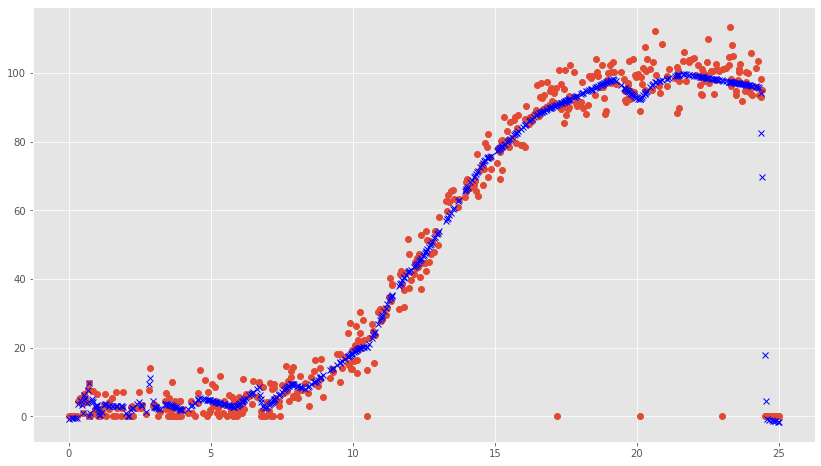

In [6]:
# Plot the values.
plt.plot(powerProductionData['speed'], powerProductionData['power'], 'o');
plt.plot(powerProductionData['speed'], model.predict(powerProductionData['speed']), 'bx');

In [7]:
model.save('SavedModelData.h5')

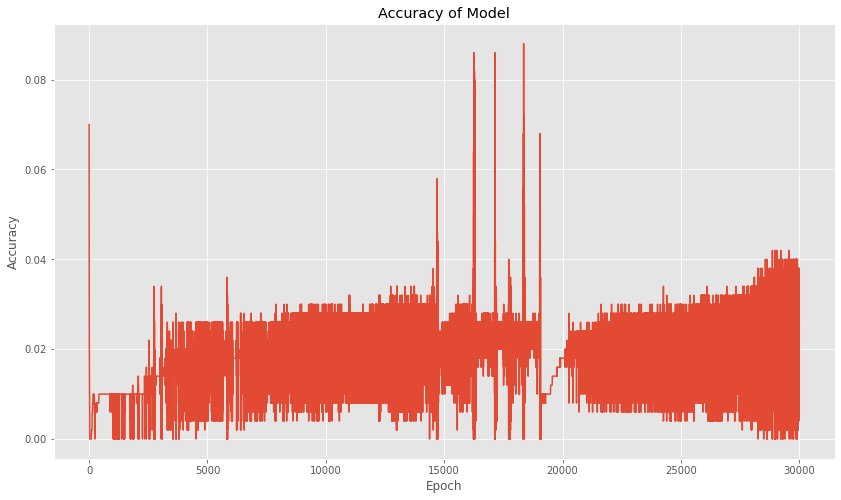

In [8]:
#label the x axis 
plt.xlabel('Epoch')
#label the y axis 
plt.ylabel('Accuracy')
# Set the title
plt.title('Accuracy of Model')

plt.plot(modelHistory.history['accuracy'])

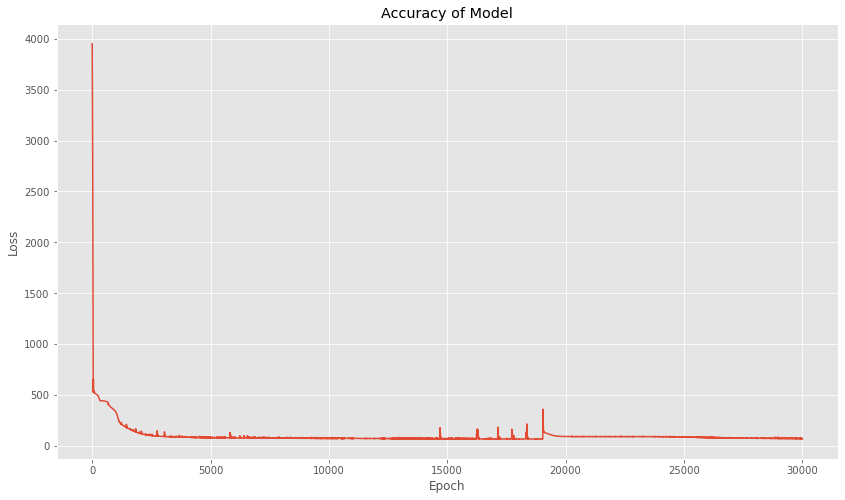

In [9]:
#label the x axis 
plt.xlabel('Epoch')
#label the y axis 
plt.ylabel('Loss')
# Set the title
plt.title('Accuracy of Model')

plt.plot(modelHistory.history['loss'])

# References

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/<br>
https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/<br>
https://www.geeksforgeeks.org/keras-fit-and-keras-fit_generator/<br>

***
## End